In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Knowing my data**

In [2]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class']

In [3]:
data = pd.read_csv("../data/Rice-Gonen andJasmine.csv",usecols=cols)

In [4]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [5]:
data.sample(random_state=42,n=5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
18056  9429       174.671378        69.661360      0.917032        9752   
3256   5842       145.807572        51.673280      0.935096        6020   
17106  8359       158.012446        67.848264      0.903121        8540   
9810   6493       167.571643        50.974529      0.952610        6737   
9563   5594       153.172203        47.071526      0.951609        5770   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation    Class  
18056     109.569045  0.644938    406.975   0.715385      2.507436    Gonen  
3256       86.245379  0.641978    330.790   0.670914      2.821721  jasmine  
17106     103.164962  0.666268    370.413   0.765582      2.328909    Gonen  
9810       90.923838  0.796687    366.921   0.606052      3.287360  jasmine  
9563       84.394917  0.496847    337.176   0.618328      3.254031  jasmine

In [6]:
data.isna().sum() # no null values present

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [7]:
print(f"Data shape:{data.shape}")
print(f"Data dimension:{data.ndim}")

Data shape:(18185, 11)
Data dimension:2


In [8]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class               object
dtype: object

In [9]:
data.describe(include=np.number)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count  18185.000000     18185.000000     18185.000000  18185.000000   
mean    7036.492989       151.680754        59.807851      0.915406   
std     1467.197150        12.376402        10.061653      0.030575   
min     2522.000000        74.133114        34.409894      0.676647   
25%     5962.000000       145.675910        51.393151      0.891617   
50%     6660.000000       153.883750        55.724288      0.923259   
75%     8423.000000       160.056214        70.156593      0.941372   
max    10210.000000       183.211434        82.550762      0.966774   

         ConvexArea  EquivDiameter        Extent     Perimeter     Roundness  \
count  18185.000000   18185.000000  18185.000000  18185.000000  18185.000000   
mean    7225.817872      94.132952      0.616653    351.606949      0.707998   
std     1502.006571       9.906250      0.104389     29.500620      0.067310   
min     2579.000000      56.666658      0.383239    197.015000      0.174590   
25%     6125.000000      87.126656      0.538530    333.990000      0.650962   
50%     6843.000000      92.085696      0.601194    353.088000      0.701941   
75%     8645.000000     103.559146      0.695664    373.003000      0.769280   
max    11008.000000     114.016559      0.886573    508.511000      0.904748   

       AspectRation  
count  18185.000000  
mean       2.599081  
std        0.434836  
min        1.358128  
25%        2.208527  
50%        2.602966  
75%        2.964101  
max        3.911845

In [10]:
data.describe(include=np.object)

Class
count     18185
unique        2
top     jasmine
freq       9985

In [11]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 2.5 MB



| Data-Type | Precision |
| ----------- | ----------- |
float16   | 3
float32   | 6
float64   | 15
float128  | 18

--------------------------------- 


|Data type |min|max|
| ----------- | ----------- |----------- |
|int8|-128|127|
|int16|-32768|32767|
|int32|-2147483648|2147483647|
|int64|-9223372036854775808|9223372036854775807|

**Observations**
- Rename columns
- Type conversion
- One hot encoding for the classes for modeling after EDA.

### **Data cleaning and preprocessing**

In [12]:
data_clean = data.copy()

In [13]:
data_clean.isna().sum() # No null values

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [14]:
data_clean.duplicated().sum() # No duplicates

0

In [15]:
data_clean.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [16]:
data_clean.columns = data_clean.columns.str.lower()
# Converting the columns to lowercase
data_clean.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'equivdiameter', 'extent', 'perimeter', 'roundness',
       'aspectration', 'class'],
      dtype='object')

In [17]:
data_clean.sample(5,random_state=42)

area  majoraxislength  minoraxislength  eccentricity  convexarea  \
18056  9429       174.671378        69.661360      0.917032        9752   
3256   5842       145.807572        51.673280      0.935096        6020   
17106  8359       158.012446        67.848264      0.903121        8540   
9810   6493       167.571643        50.974529      0.952610        6737   
9563   5594       153.172203        47.071526      0.951609        5770   

       equivdiameter    extent  perimeter  roundness  aspectration    class  
18056     109.569045  0.644938    406.975   0.715385      2.507436    Gonen  
3256       86.245379  0.641978    330.790   0.670914      2.821721  jasmine  
17106     103.164962  0.666268    370.413   0.765582      2.328909    Gonen  
9810       90.923838  0.796687    366.921   0.606052      3.287360  jasmine  
9563       84.394917  0.496847    337.176   0.618328      3.254031  jasmine

In [18]:
# Ensuring that the class meembers are cleaned
data_clean['class'] = data_clean['class'].str.strip().str.lower()
data_clean['class'].sample(2,random_state=42)

18056      gonen
3256     jasmine
Name: class, dtype: object

In [19]:
data_clean.dtypes

area                 int64
majoraxislength    float64
minoraxislength    float64
eccentricity       float64
convexarea           int64
equivdiameter      float64
extent             float64
perimeter          float64
roundness          float64
aspectration       float64
class               object
dtype: object

**Memory management**

In [20]:
# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype


        if col_type != np.object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
   
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].round(3)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].round(3)
                else:
                    df[col] = df[col].round(3) # float64


        elif col_type == np.object:
            # Convert inf objects to category to save up memory
            df[col] = df[col].astype('category')   
        else:
            df[col] = df[col].astype('category')   
    return df


data_memory = data_clean.copy()
data_memory = memory_magment(data_memory)

In [21]:
data_memory.describe()

area  majoraxislength  minoraxislength  eccentricity  \
count  18185.000000     18185.000000     18185.000000  18185.000000   
mean    7036.492989       151.680751        59.807846      0.915405   
std     1467.197150        12.376403        10.061650      0.030580   
min     2522.000000        74.133000        34.410000      0.677000   
25%     5962.000000       145.676000        51.393000      0.892000   
50%     6660.000000       153.884000        55.724000      0.923000   
75%     8423.000000       160.056000        70.157000      0.941000   
max    10210.000000       183.211000        82.551000      0.967000   

         convexarea  equivdiameter        extent     perimeter     roundness  \
count  18185.000000   18185.000000  18185.000000  18185.000000  18185.000000   
mean    7225.817872      94.132956      0.616652    351.606949      0.707998   
std     1502.006571       9.906249      0.104389     29.500620      0.067312   
min     2579.000000      56.667000      0.383000    197.015000      0.175000   
25%     6125.000000      87.127000      0.539000    333.990000      0.651000   
50%     6843.000000      92.086000      0.601000    353.088000      0.702000   
75%     8645.000000     103.559000      0.696000    373.003000      0.769000   
max    11008.000000     114.017000      0.887000    508.511000      0.905000   

       aspectration  
count  18185.000000  
mean       2.599077  
std        0.434835  
min        1.358000  
25%        2.209000  
50%        2.603000  
75%        2.964000  
max        3.912000

In [22]:
data_clean.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             18185 non-null  int64  
 1   majoraxislength  18185 non-null  float64
 2   minoraxislength  18185 non-null  float64
 3   eccentricity     18185 non-null  float64
 4   convexarea       18185 non-null  int64  
 5   equivdiameter    18185 non-null  float64
 6   extent           18185 non-null  float64
 7   perimeter        18185 non-null  float64
 8   roundness        18185 non-null  float64
 9   aspectration     18185 non-null  float64
 10  class            18185 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 2.5 MB


In [23]:
data_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   area             18185 non-null  int16   
 1   majoraxislength  18185 non-null  float64 
 2   minoraxislength  18185 non-null  float64 
 3   eccentricity     18185 non-null  float64 
 4   convexarea       18185 non-null  int16   
 5   equivdiameter    18185 non-null  float64 
 6   extent           18185 non-null  float64 
 7   perimeter        18185 non-null  float64 
 8   roundness        18185 non-null  float64 
 9   aspectration     18185 non-null  float64 
 10  class            18185 non-null  category
dtypes: category(1), float64(8), int16(2)
memory usage: 1.2 MB


Memory usage has drastically decreased from 2.5 MB to 1.2 MB

### **EDA: Exploratory data analysis**

In [24]:
eda = data_memory.copy()

In [25]:
# Excluding all categorical data types
print(eda.select_dtypes(exclude=pd.CategoricalDtype).columns.value_counts().sum())
num = eda.select_dtypes(exclude=pd.CategoricalDtype).columns.tolist()
print(num)

# There are 10 numerical columns

10
['area', 'majoraxislength', 'minoraxislength', 'eccentricity', 'convexarea', 'equivdiameter', 'extent', 'perimeter', 'roundness', 'aspectration']


In [26]:
def summary_stats(data,group:str,column):
    try:
        col_type = data[column].dtype
        cond = (str(col_type)[:3] == 'int') | (str(col_type)[:3] == 'flo')
        if cond:
            # numerical data
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"total_{column}",'sum'),
                        (f'average_{column}','mean'),
                        (f'deviation_{column}','std'),
                        (f"skewness_level_{column}","skew")
                    ]
                ).round(3)
                .reset_index()
            )
            return group_data
        else:
            # categorical data
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"count_total_{column}",'count')
                    ]
                ).reset_index()
            )
            return group_data
    except (KeyError):
        print(f"This is the list of keys: {data.columns}")

summary stats for each class of rice based of the numerical values

**Steps**
- Create the tables
- Come back and make the observations
- Come back and make the conditions for further analysis

In [28]:
def condition_printer(data, condition):
    return data.loc[condition,:]

In [29]:
rice_data = summary_stats(eda,column=num[0],group='class')
rice_data

class  total_area  average_area  deviation_area  skewness_level_area
0    gonen  68540039.0      8358.541         969.220               -0.626
1  jasmine  59418586.0      5950.785         731.343               -0.875

**Observations**
- Gonen rice type has a greater mean area than Jasmine rice.
- Gonen rice is also less skewed than Jasmine rice but has a high deviation value from mean. More spread in the data points for Gonen rice?

**Suggested charts:** *Bar chart and Histogram*

In [30]:
cond1 = (eda.area >= 8000)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

5690 

class  
gonen      5690
jasmine       0
dtype: int64


Area above 8000 mostly belong to the Gonen rice type

In [31]:
cond1 = (eda.area >= 5900) & (eda.area <= 8000)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

8285 

class  
jasmine    5854
gonen      2431
dtype: int64


Jasmine rice has more values within the condition range

In [32]:
rice_data = summary_stats(eda,column=num[1],group='class')
rice_data

class  total_majoraxislength  average_majoraxislength  \
0    gonen            1260327.107                  153.698   
1  jasmine            1497987.359                  150.024   

   deviation_majoraxislength  skewness_level_majoraxislength  
0                     10.648                          -1.083  
1                     13.409                          -1.475

**Observations**
- Gonen rice type has a greater mean major axis length than Jasmine rice.
- Both Gonen rice and Jasmine rice are highly skewed but deviation from mean is low. Could that mean that the major axis length tends to a particular length?

**Suggested charts:** *Bar chart and Histogram*

In [33]:
cond1 = (eda.majoraxislength >= 153)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

9708 

class  
gonen      5040
jasmine    4668
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [34]:
cond1 = (eda.majoraxislength >= 150) & (eda.majoraxislength <= 153)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

1780 

class  
jasmine    1025
gonen       755
dtype: int64


Jasmine are more prominent in the given condition

In [35]:
rice_data = summary_stats(eda,column=num[2],group='class')
rice_data

class  total_minoraxislength  average_minoraxislength  \
0    gonen             573978.905                   69.997   
1  jasmine             513626.783                   51.440   

   deviation_minoraxislength  skewness_level_minoraxislength  
0                      4.443                          -0.748  
1                      3.587                          -0.538

**Observations**
- Gonen rice type has a greater mean minor axis length than Jasmine rice.
- Gonen and Jasmine rice both have considerably low deviation from mean but Gonen rice has a sligtly high skewness value. Why's that?

**Suggested charts:** *Bar chart, Histogram and box plot*

In [36]:
cond1 = (eda.minoraxislength >= 69)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

5381 

class  
gonen      5381
jasmine       0
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [37]:
cond1 = (eda.minoraxislength >= 51) & (eda.minoraxislength < 70)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

9427 

class  
jasmine    5894
gonen      3533
dtype: int64


Jasmine is still more prominent

In [38]:
rice_data = summary_stats(eda,column=num[3],group='class')
rice_data

class  total_eccentricity  average_eccentricity  deviation_eccentricity  \
0    gonen            7288.120                 0.889                   0.019   
1  jasmine            9358.519                 0.937                   0.018   

   skewness_level_eccentricity  
0                       -4.180  
1                       -4.081

**Geometry:**

In geometry, eccentricity is often associated with conic sections, such as ellipses. The eccentricity of an ellipse describes how elongated or flattened the ellipse is. It is a measure of the deviation from a perfect circle.

**Observations**
- Jasmine rice type has a greater mean eccentricity than Gonen rice.
- Gonen and Jasmine rice both have considerably low deviation and have extremely high skewness value. Why's that?

**Suggested charts:** *Bar chart, Histogram*

In [39]:
cond1 = (eda.eccentricity >= 0.93)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

8221 

class  
jasmine    8199
gonen        22
dtype: int64


Jasmine has a larger portion than Gonen based off the above condition

In [40]:
cond1 = (eda.eccentricity >= 0.889) & (eda.eccentricity < 0.94)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

9352 

class  
gonen      4828
jasmine    4524
dtype: int64


Gonen is more prominent

In [41]:
rice_data = summary_stats(eda,column=num[4],group='class')
rice_data

class  total_convexarea  average_convexarea  deviation_convexarea  \
0    gonen        70317423.0            8575.295              1000.700   
1  jasmine        61084075.0            6117.584               750.048   

   skewness_level_convexarea  
0                     -0.617  
1                     -0.853

**Observations**
- Gonen rice type has a greater mean convex area than Jasmine rice.
- Gonen and Jasmine rice both have considerably high deviation and have slightly low skewness value, but Jasmine has a higher skewness level.

**Suggested charts:** *Bar chart, Histogram*

In [42]:
cond1 = (eda.convexarea >= 8500)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

4970 

class  
gonen      4970
jasmine       0
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [43]:
cond1 = (eda.convexarea >= 6117) & (eda.convexarea < 9000)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

10450 

class  
jasmine    5590
gonen      4860
dtype: int64


Jasmine is more prominent

In [44]:
rice_data = summary_stats(eda,column=num[5],group='class')
rice_data

class  total_equivdiameter  average_equivdiameter  \
0    gonen           844437.424                102.980   
1  jasmine           867370.381                 86.867   

   deviation_equivdiameter  skewness_level_equivdiameter  
0                    6.125                        -0.753  
1                    5.554                        -1.139

**Observations**
- Gonen rice type has a greater mean equivdiameter than Jasmine rice.
- Gonen and Jasmine rice both have considerably low deviation but Jasmine is extremely skewed.

**Suggested charts:** *Bar chart, Histogram*

In [45]:
cond1 = (eda.equivdiameter >= 102)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

5294 

class  
gonen      5294
jasmine       0
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [46]:
cond1 = (eda.equivdiameter >= 86) & (eda.equivdiameter < 103)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

9667 

class  
jasmine    6357
gonen      3310
dtype: int64


Jasmine is more prominent

In [47]:
rice_data = summary_stats(eda,column=num[6],group='class')
rice_data

class  total_extent  average_extent  deviation_extent  \
0    gonen      5343.172           0.652             0.079   
1  jasmine      5870.653           0.588             0.114   

   skewness_level_extent  
0                  0.552  
1                  0.624

**Observations**
- Gonen rice type has a greater mean extent than Jasmine rice.
- Gonen and Jasmine rice both have considerably low deviation but Jasmine deviation and skewness level is higher.

**Suggested charts:** *Bar chart, Histogram*

In [48]:
cond1 = (eda.extent >= 0.65)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

6301 

class  
gonen      3426
jasmine    2875
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [49]:
cond1 = (eda.extent >= 0.5) & (eda.extent < 0.7)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

10970 

class  
gonen      5821
jasmine    5149
dtype: int64


Gonen is more prominent

In [50]:
rice_data = summary_stats(eda,column=num[7],group='class')
rice_data

class  total_perimeter  average_perimeter  deviation_perimeter  \
0    gonen      3025524.658            368.966               23.463   
1  jasmine      3368447.714            337.351               26.119   

   skewness_level_perimeter  
0                    -0.633  
1                    -1.107

**Observations**
- Gonen rice type has a greater mean perimeter than Jasmine rice.
- Gonen and Jasmine rice both have considerably low deviation but Jasmine deviation and skewness level is higher.

**Suggested charts:** *Bar chart, Histogram*

In [51]:
cond1 = (eda.perimeter >= 368)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

5612 

class  
gonen      4891
jasmine     721
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [52]:
cond1 = (eda.perimeter >= 337) & (eda.perimeter < 370)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

7864 

class  
jasmine    5227
gonen      2637
dtype: int64


Jasmine is more prominent

In [53]:
rice_data = summary_stats(eda,column=num[8],group='class')
rice_data

class  total_roundness  average_roundness  deviation_roundness  \
0    gonen         6312.173              0.770                0.028   
1  jasmine         6562.776              0.657                0.043   

   skewness_level_roundness  
0                    -1.293  
1                     0.323

**Observations**
- Gonen rice type has a greater mean roundness than Jasmine rice.
- Gonen and Jasmine rice both have considerably low deviation but Gonen skewness level is extremely high.

**Suggested charts:** *Bar chart, Histogram, Box plot*

In [54]:
cond1 = (eda.roundness >= 0.77)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

4513 

class  
gonen      4295
jasmine     218
dtype: int64


Gonen has a larger portion than Jasmine based off the above condition

In [55]:
cond1 = (eda.roundness >= 0.65) & (eda.roundness < 0.8)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

12825 

class  
gonen      7288
jasmine    5537
dtype: int64


Gonen is still more prominent

In [56]:
rice_data = summary_stats(eda,column=num[9],group='class')
rice_data

class  total_aspectration  average_aspectration  deviation_aspectration  \
0    gonen           18036.669                 2.200                   0.142   
1  jasmine           29227.547                 2.927                   0.299   

   skewness_level_aspectration  
0                       -0.805  
1                       -0.662

**Observations**
- Jasmine rice type has a greater mean aspect ration than Gonen rice.
- Gonen and Jasmine rice both have considerably low deviation but Gonen skewness level is higher.

**Suggested charts:** *Bar chart, Histogram*

In [57]:
cond1 = (eda.aspectration >= 2.9)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

5548 

class  
jasmine    5543
gonen         5
dtype: int64


Jasmine has a larger portion than Gonen based off the above condition

In [58]:
cond1 = (eda.aspectration >= 2.2) & (eda.aspectration < 3)
my_cond = condition_printer(eda,cond1)
print(my_cond.value_counts().sum(),"\n")
print(my_cond.loc[:,['class']].value_counts())

9947 

class  
jasmine    5751
gonen      4196
dtype: int64


Jasmine is more prominent

#### **Plots**

In [59]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

**Bar plots**

In [60]:
def plotting_bar(x:str,group:str):
    try:
        fig,ax = plt.subplots(1,2,figsize=(20,10),constrained_layout=True)
        ax = ax.ravel()
        
        # for xlabel axis
        jasmine = eda['class'].unique()[0]
        gonen =  eda['class'].unique()[1]
        labels = [gonen, jasmine]
        name = group

        grouped_agg = eda.groupby(group)[x].agg(
            [(f"{x}_mean", 'mean'),(f"{x}_deviation", 'std')]).reset_index()

        # my_palette = sns.color_palette("husl",2)
        # sns.set_theme(style='whitegrid',rc=rc,palette='husl')
        sns.set_theme(style='whitegrid',rc=rc,palette='pastel')

        sns.barplot(data=grouped_agg, x=group, y=f'{x}_mean', ax=ax[0])
        sns.barplot(data=grouped_agg, x=group, y=f'{x}_deviation', ax=ax[1])

        ax[0].set_title(f'Calculated Mean {x}',fontdict=font_title)
        ax[0].set_xlabel(f"{name}", fontdict=font_label)
        ax[0].set_ylabel(f"Calculated Mean {x}", fontdict=font_label)
        ax[0].set_xticklabels(labels,rotation=45,fontsize=20)

        # Displaying values on top of bars for mean
        for p in ax[0].patches:
            ax[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), 
                           textcoords='offset points',fontweight='bold',fontsize=20)

        ax[1].set_title(f'Calculated Deviation {x}',fontdict=font_title)
        ax[1].set_xlabel(f"{name}", fontdict=font_label)
        ax[1].set_ylabel(f"Calculated Deviation {x}", fontdict=font_label)
        ax[1].set_xticklabels(labels,rotation=45,fontsize=20)

        # Displaying values on top of bars for standard deviation
        for p in ax[1].patches:
            ax[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), 
                           textcoords='offset points',fontweight='bold',fontsize=20)

        fig.suptitle(f"Mean & Deviation Bar Plots"
                    ,fontdict=font_fig,fontweight='bold'
                    ,fontsize=40)
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')

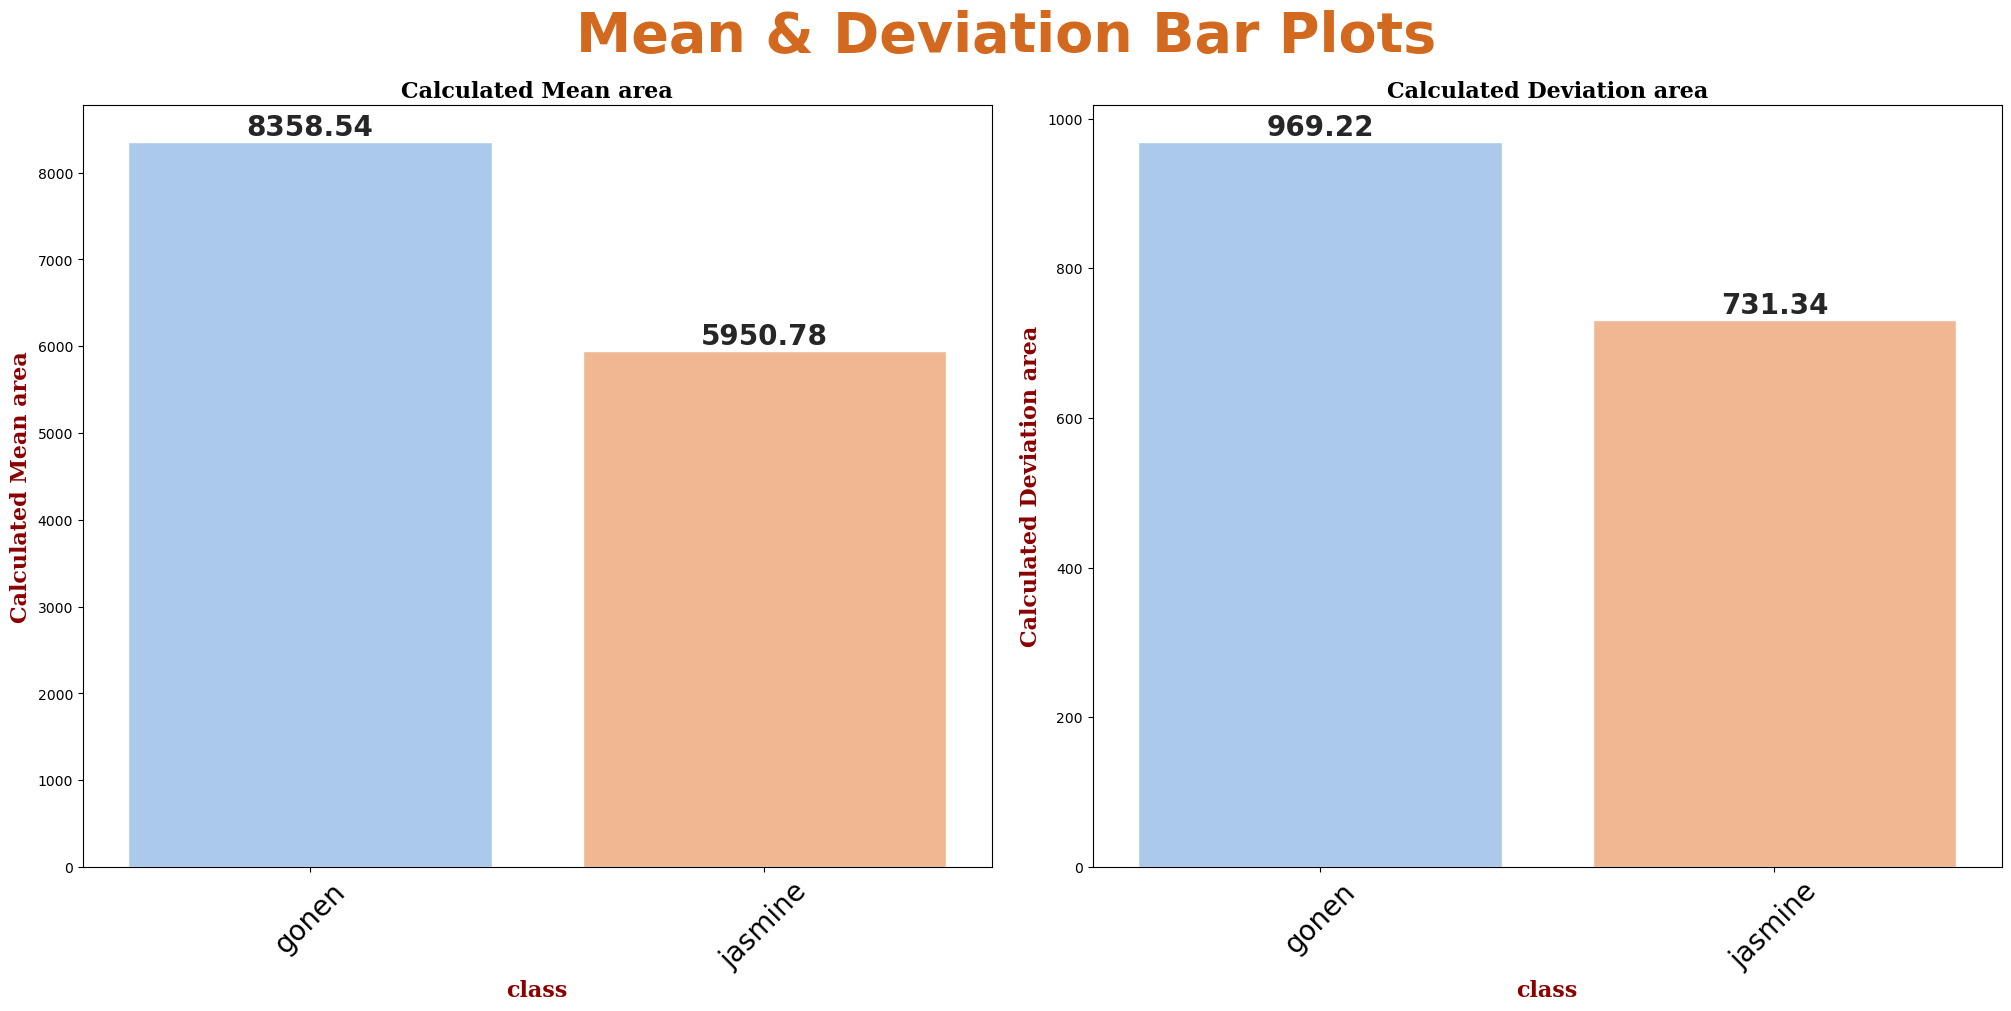

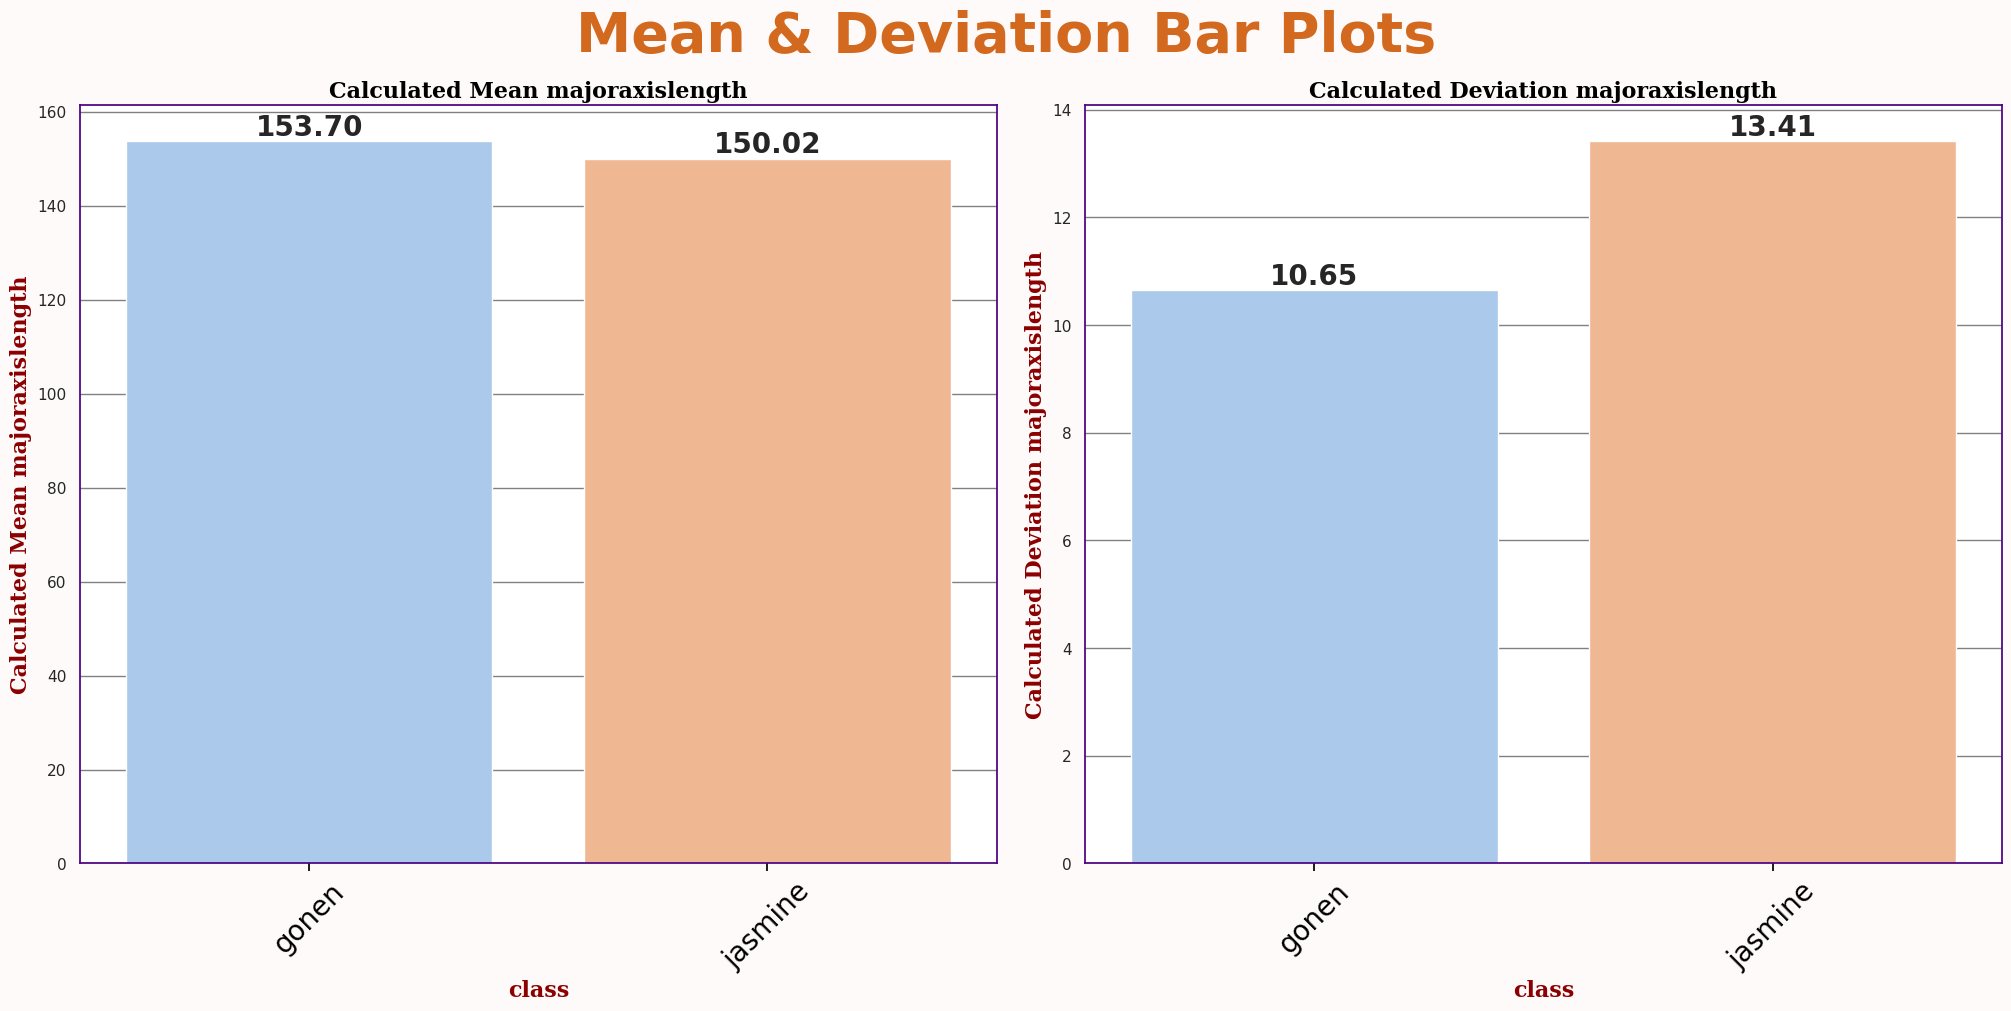

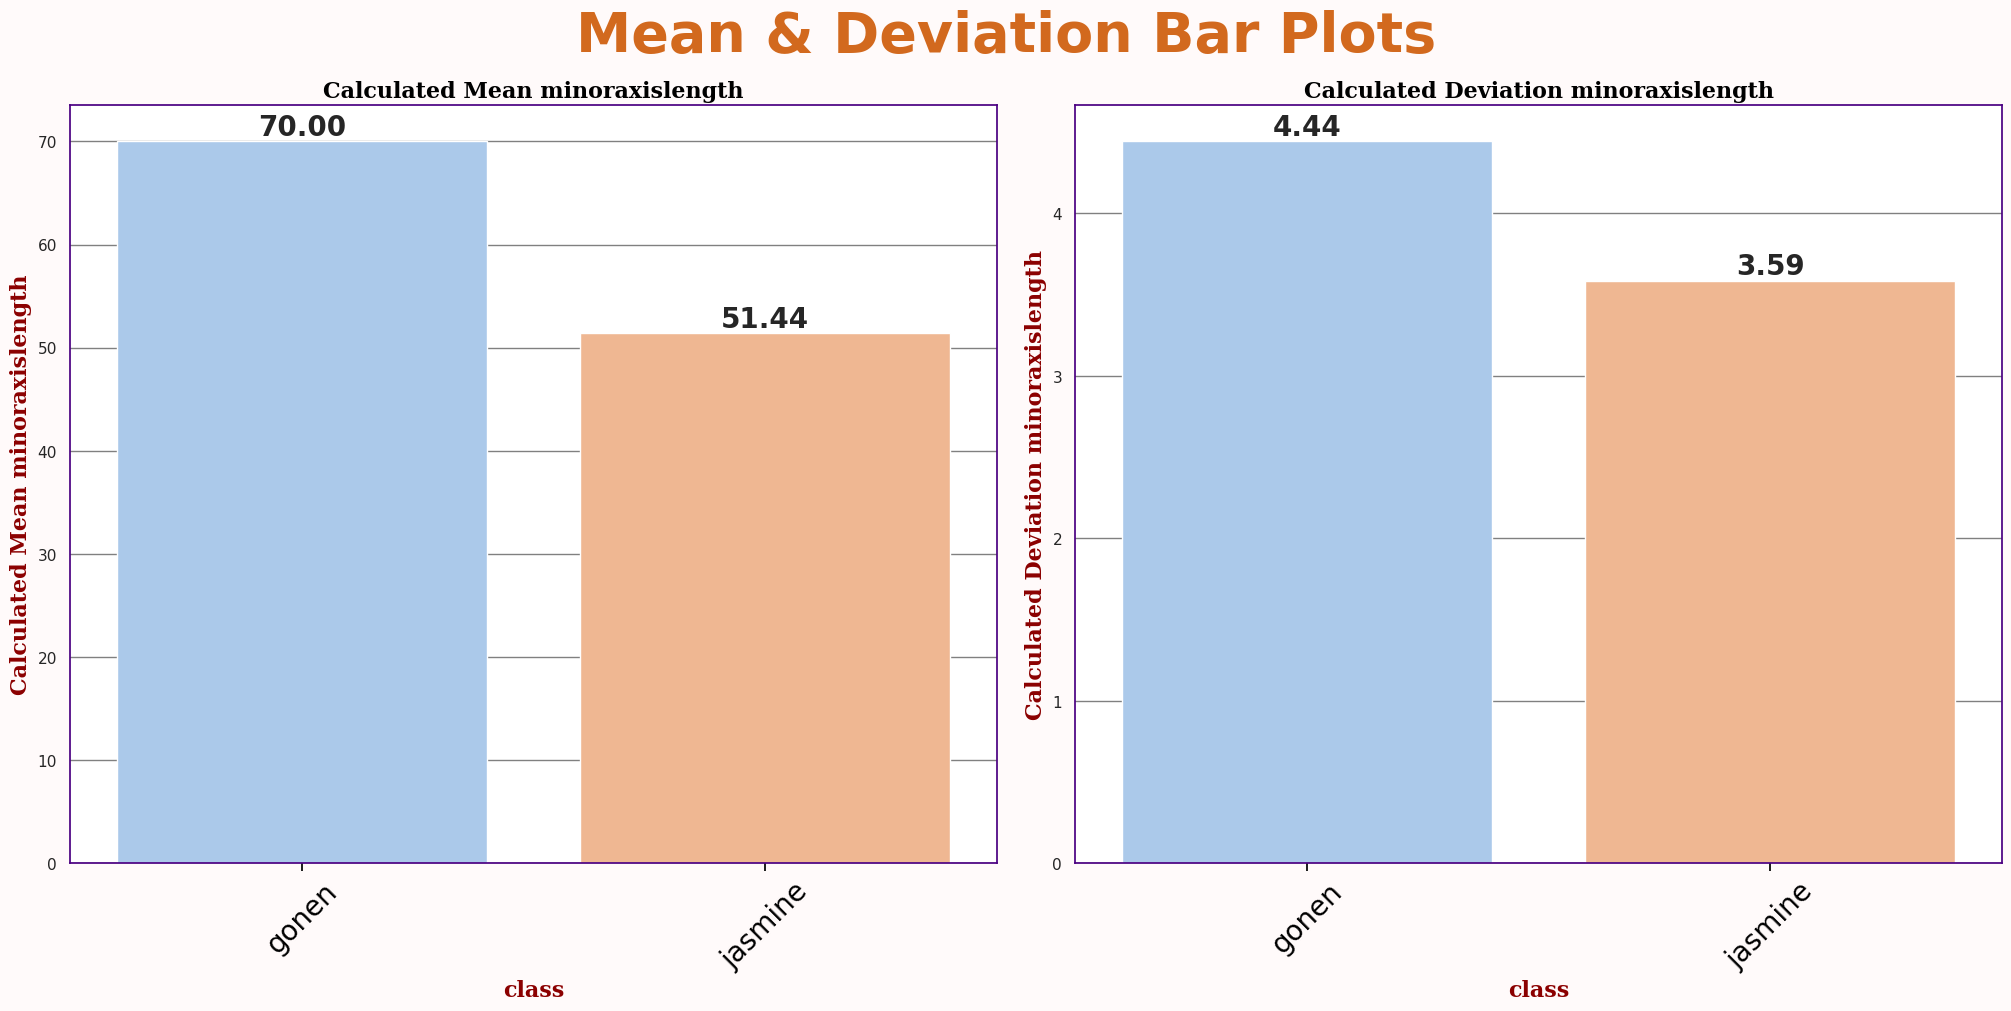

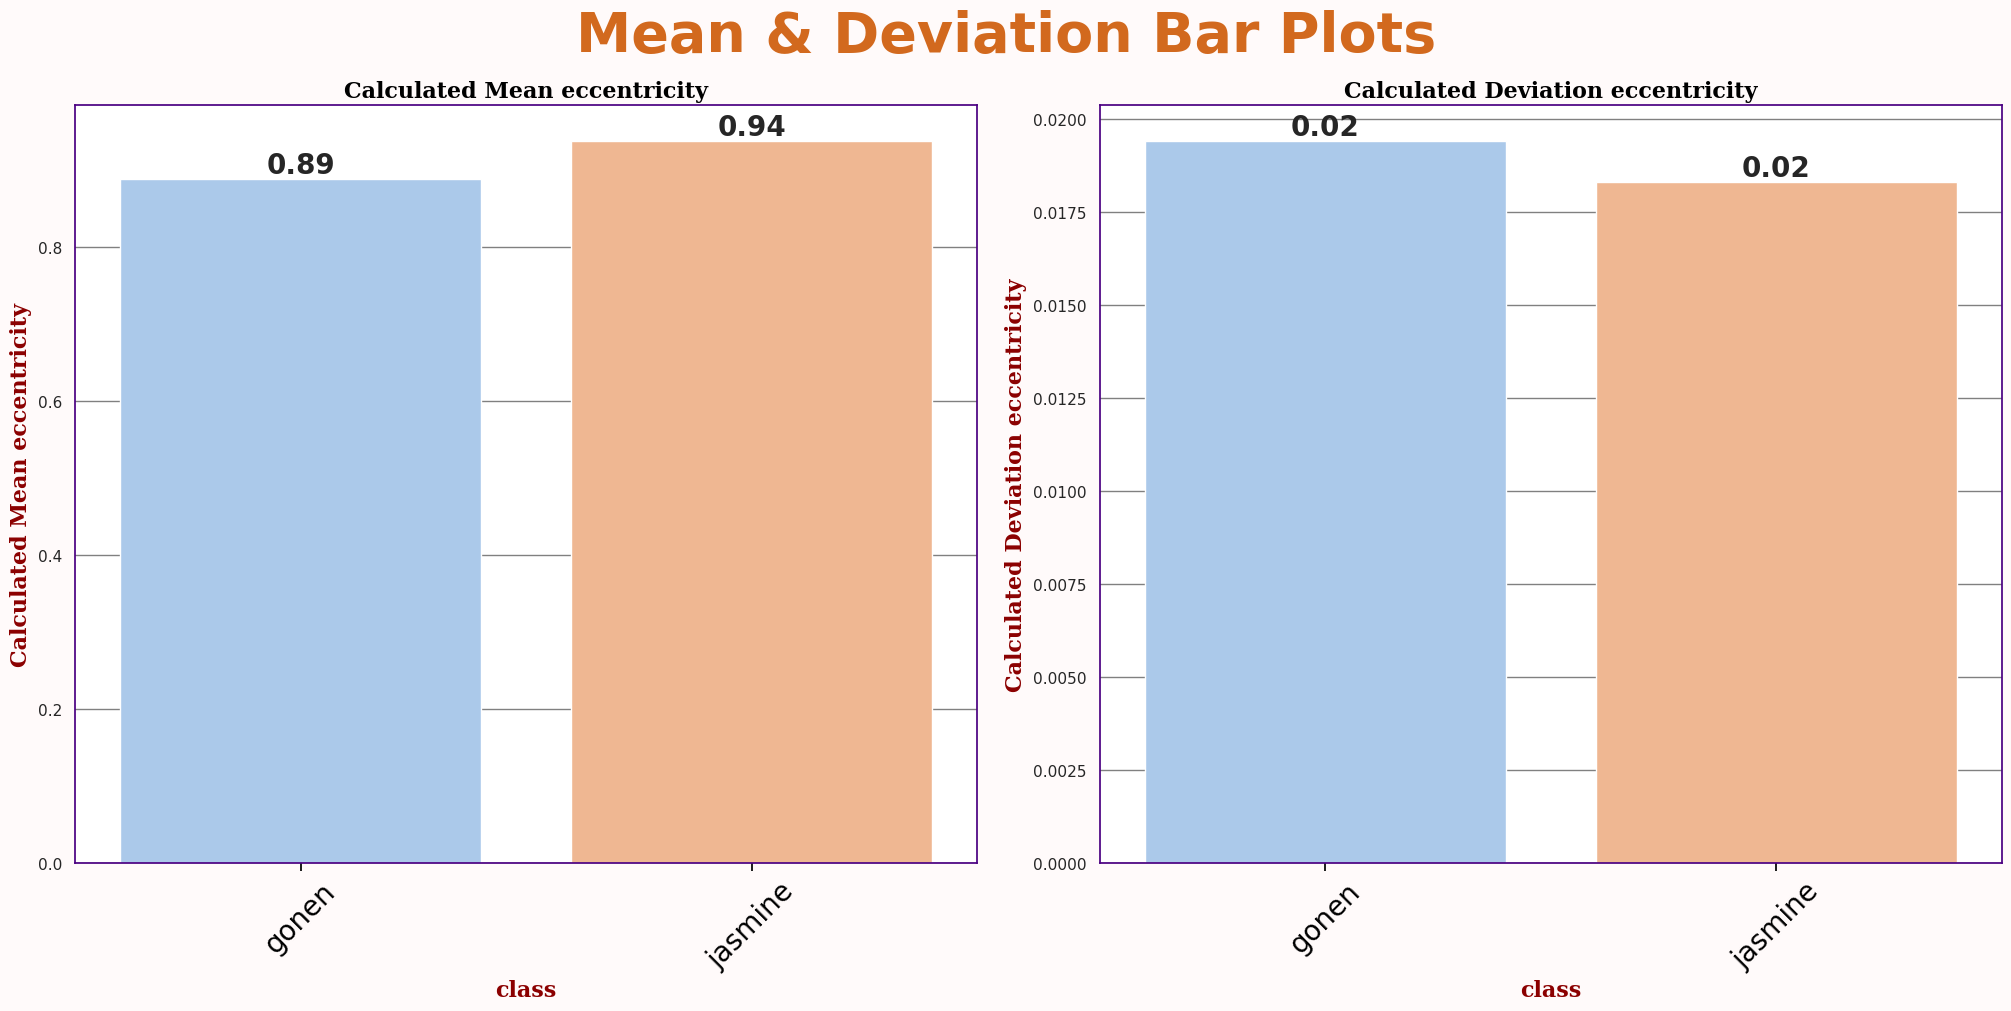

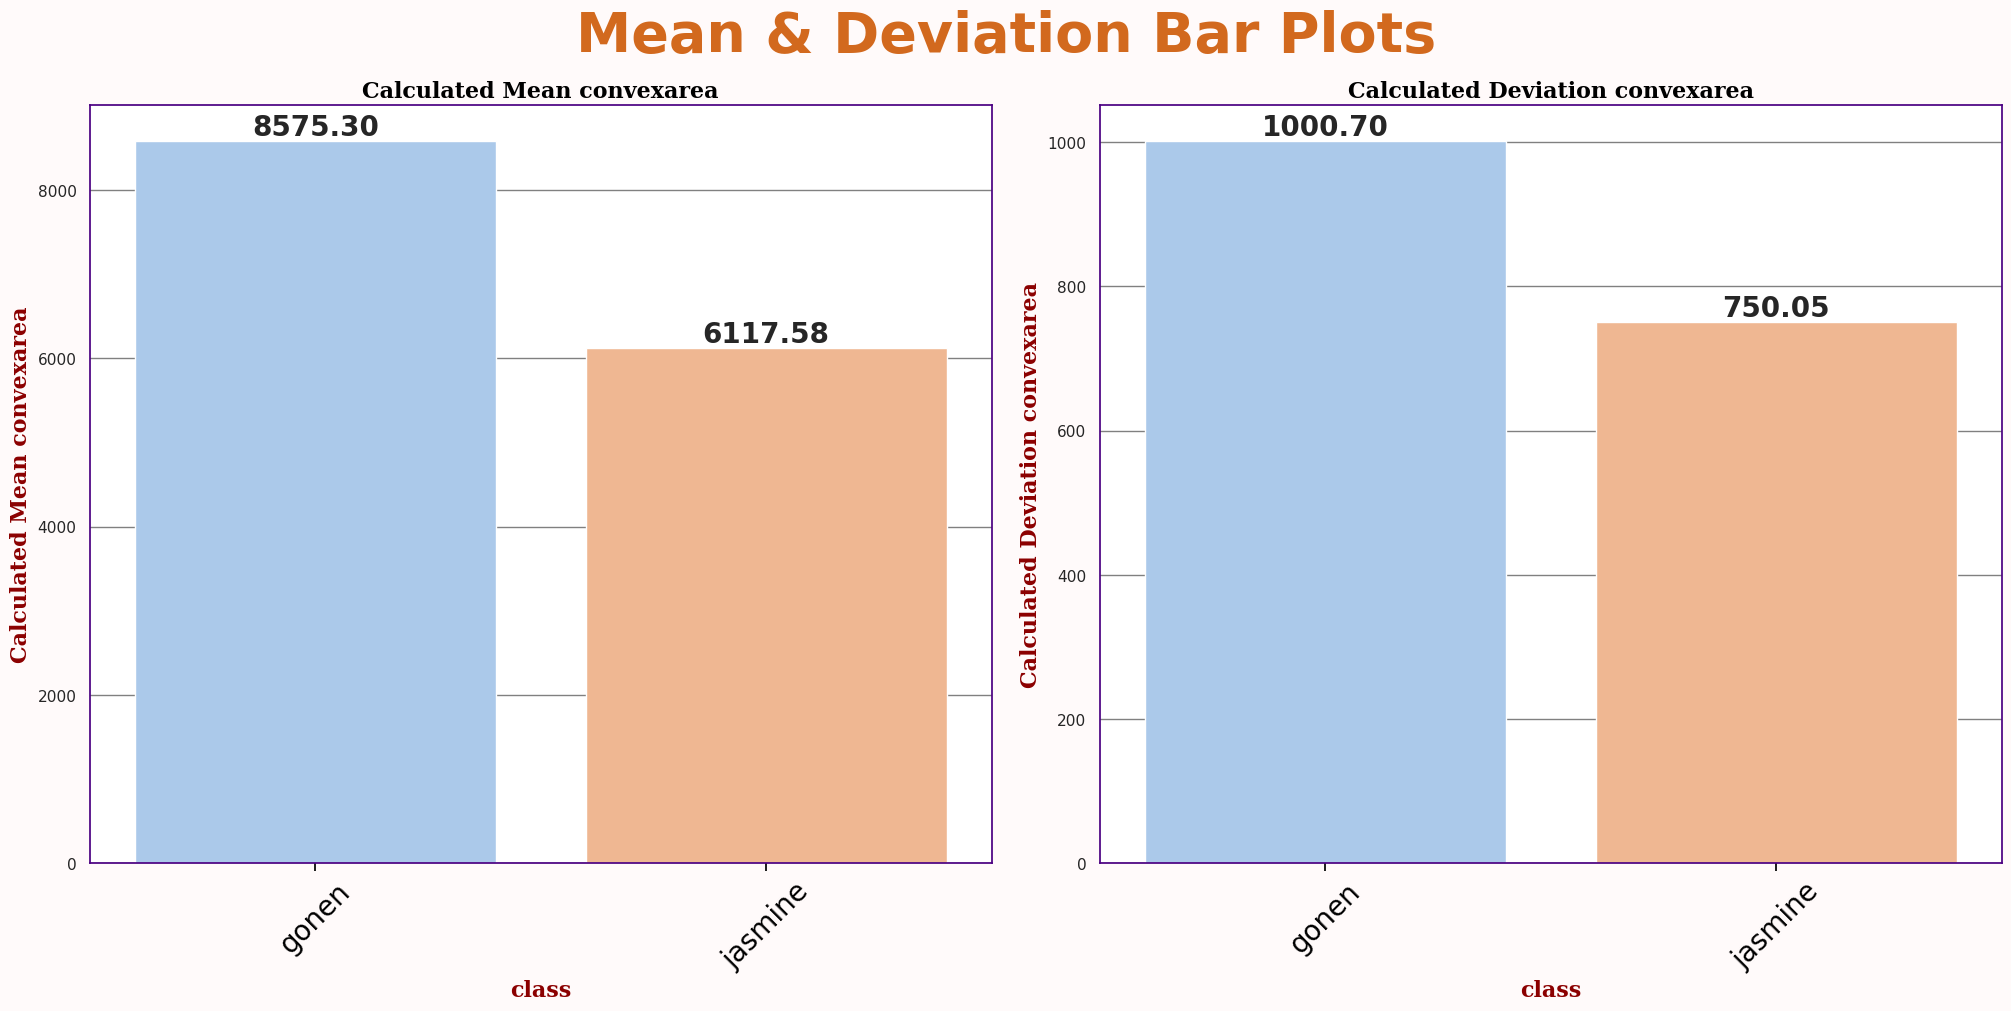

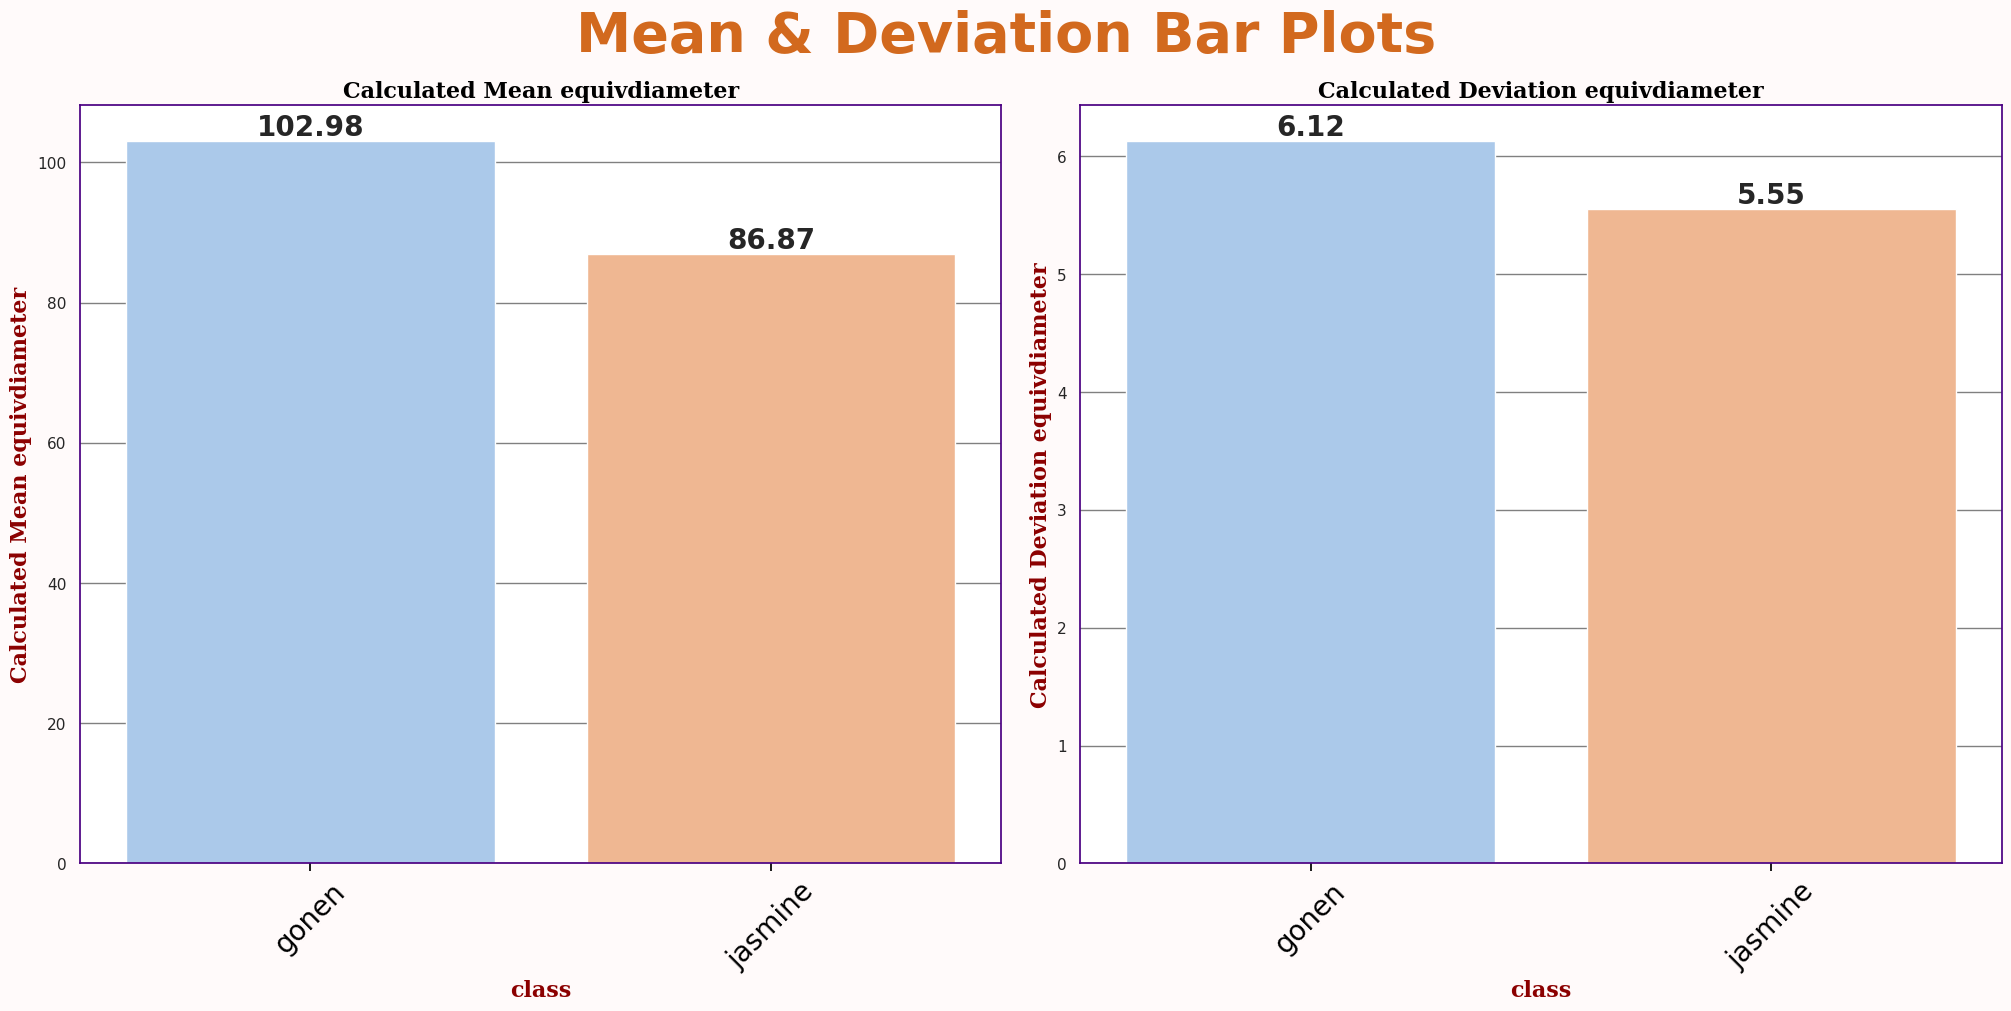

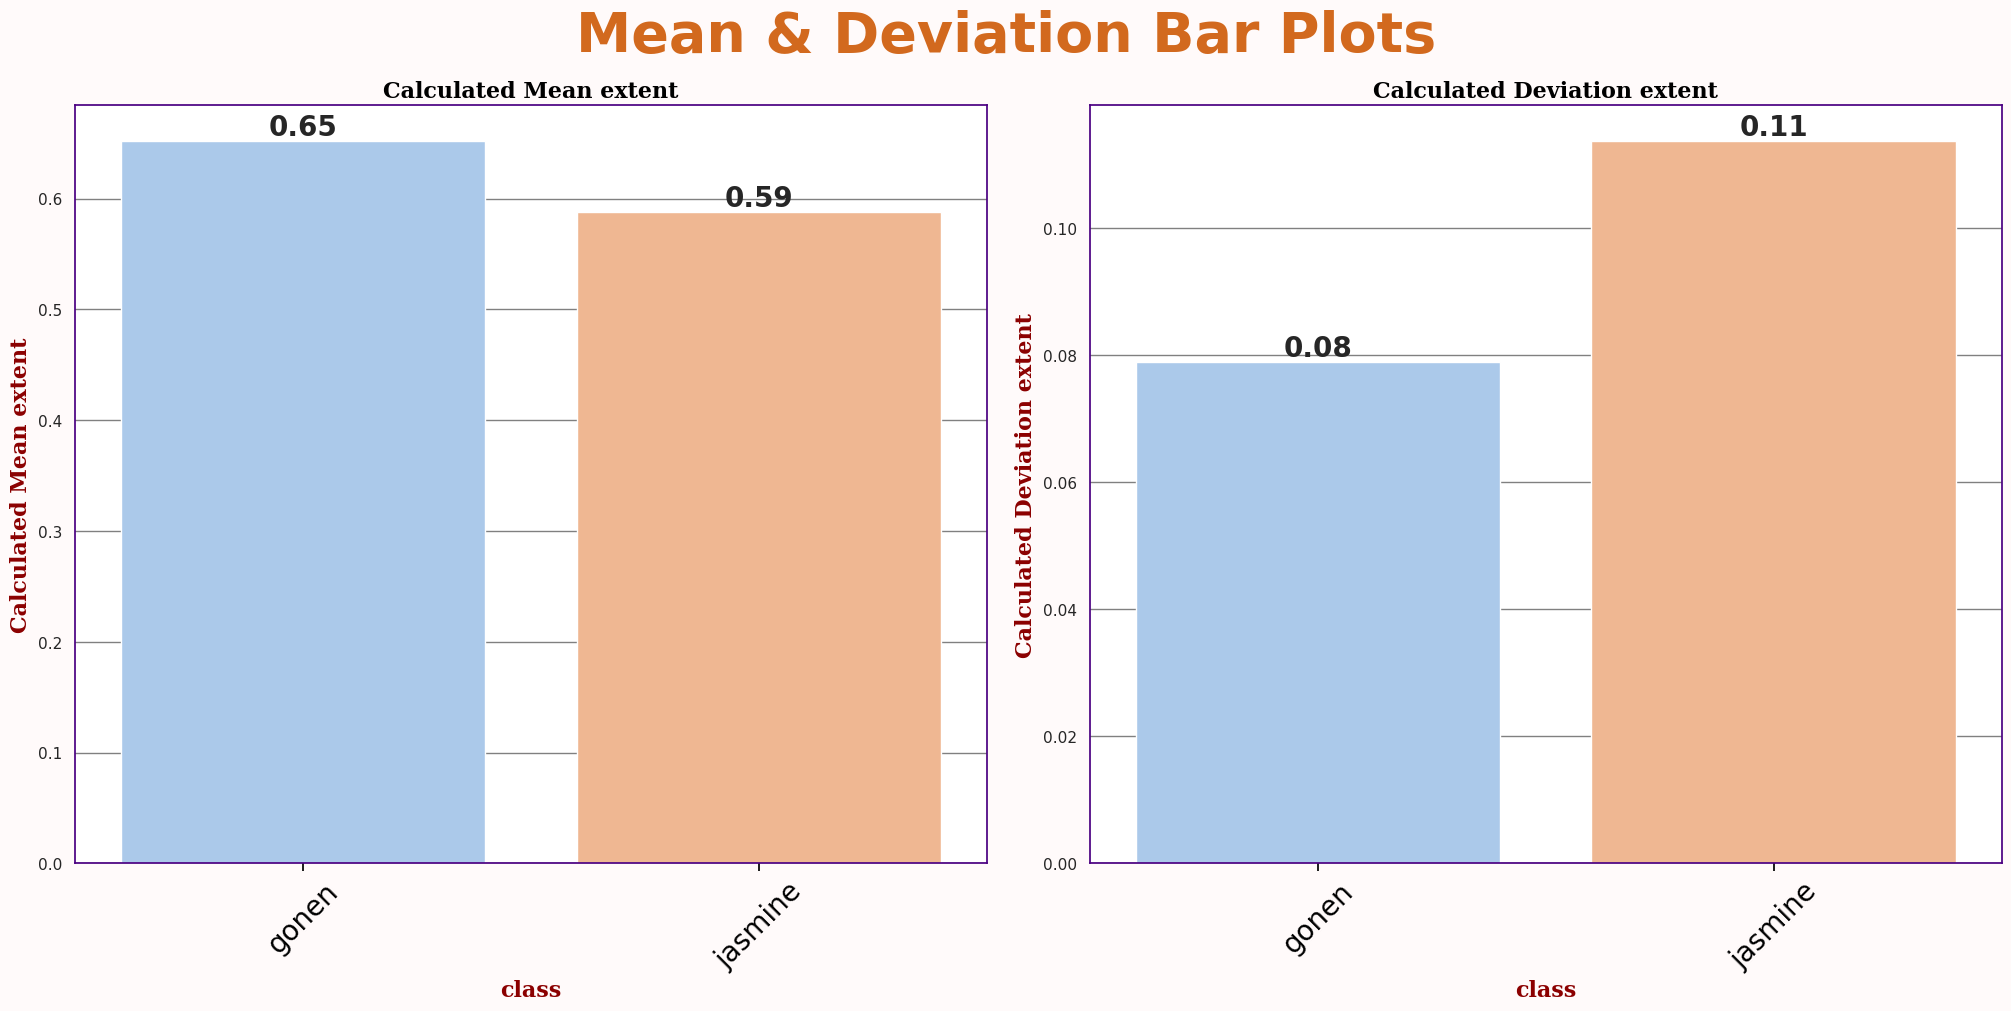

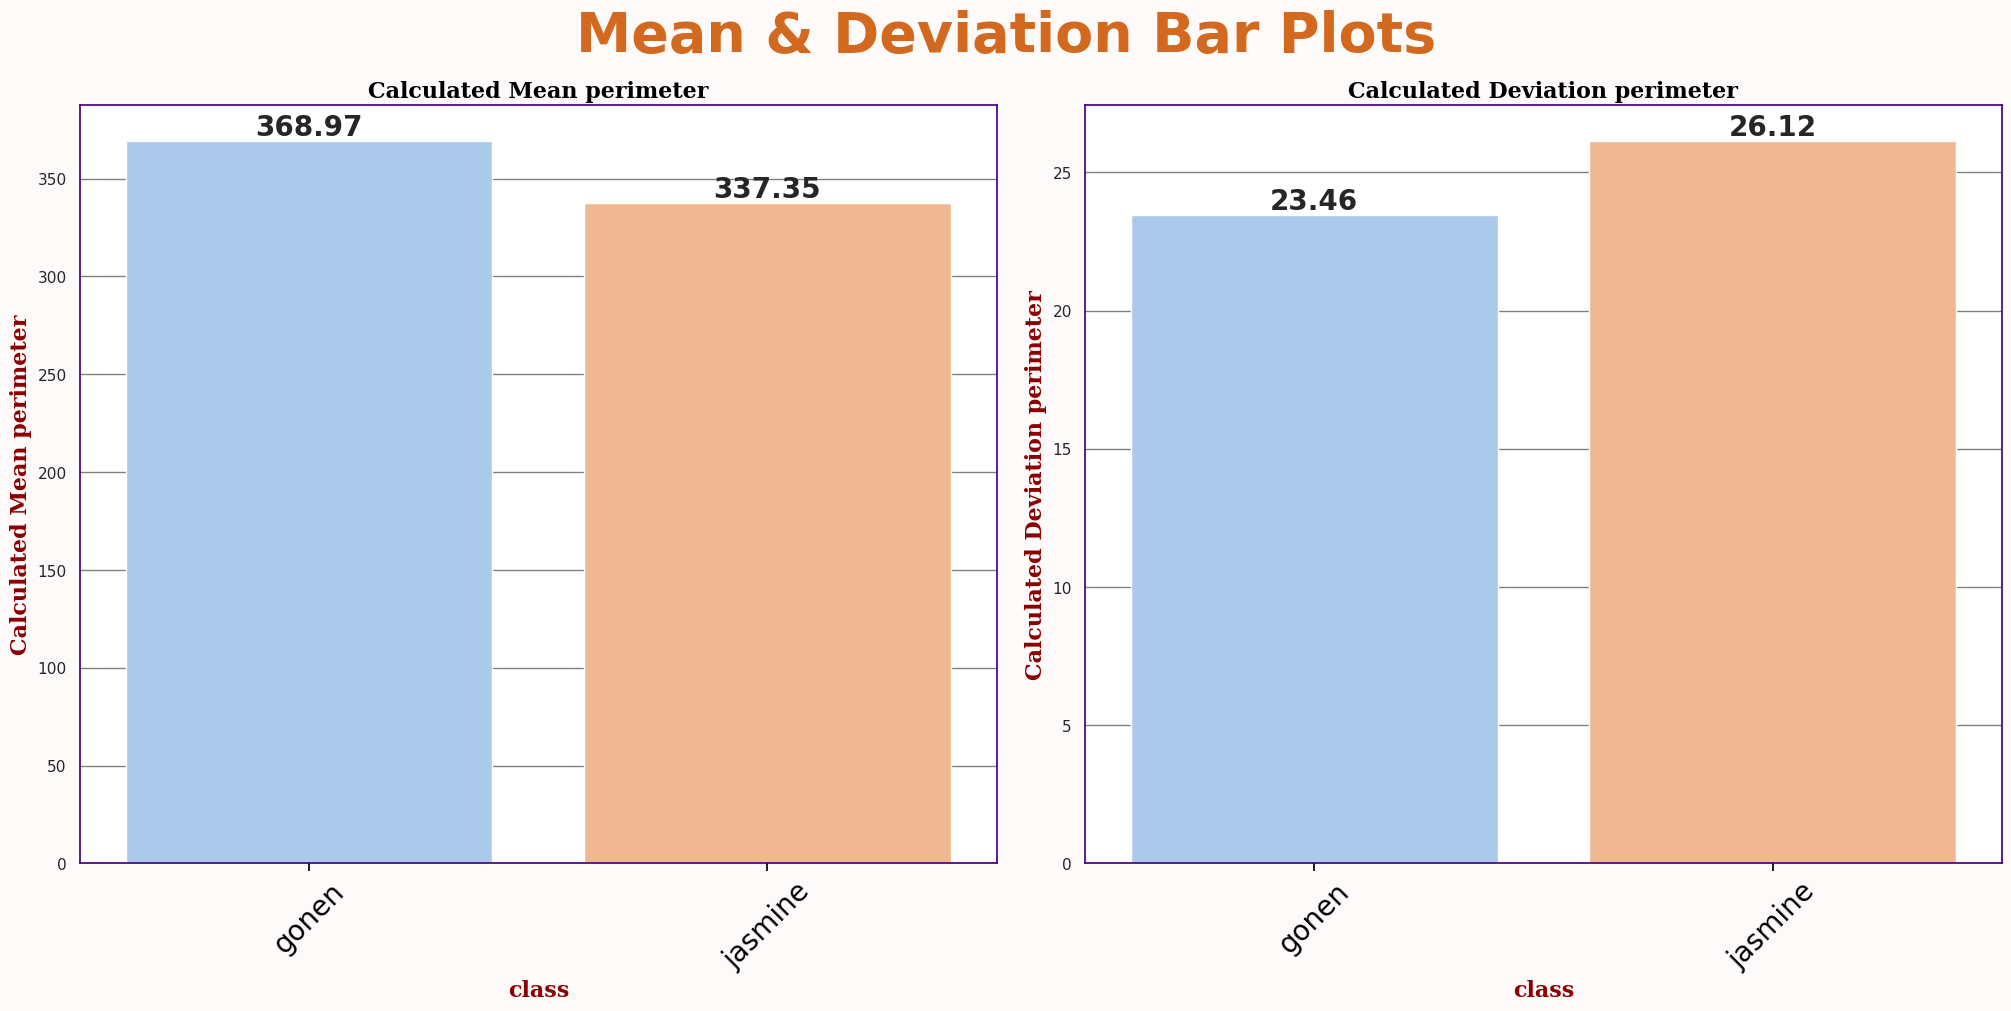

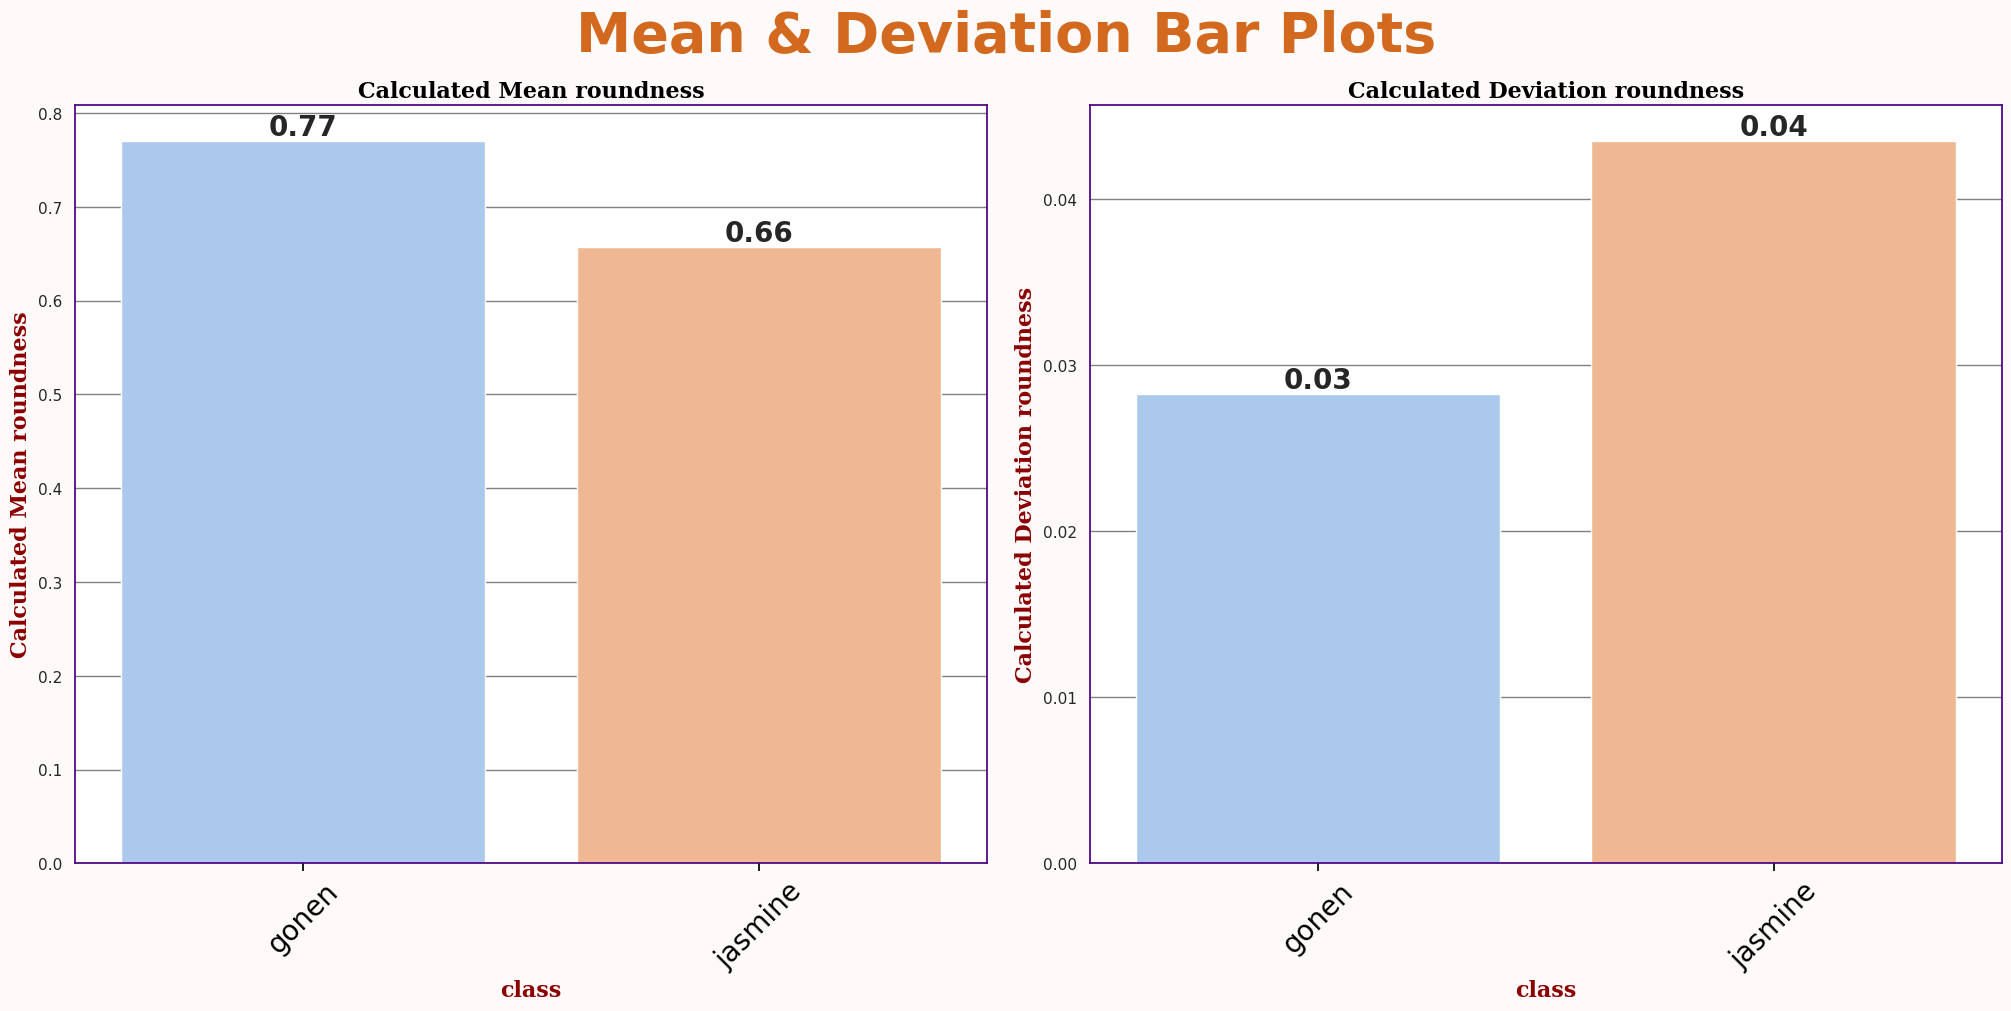

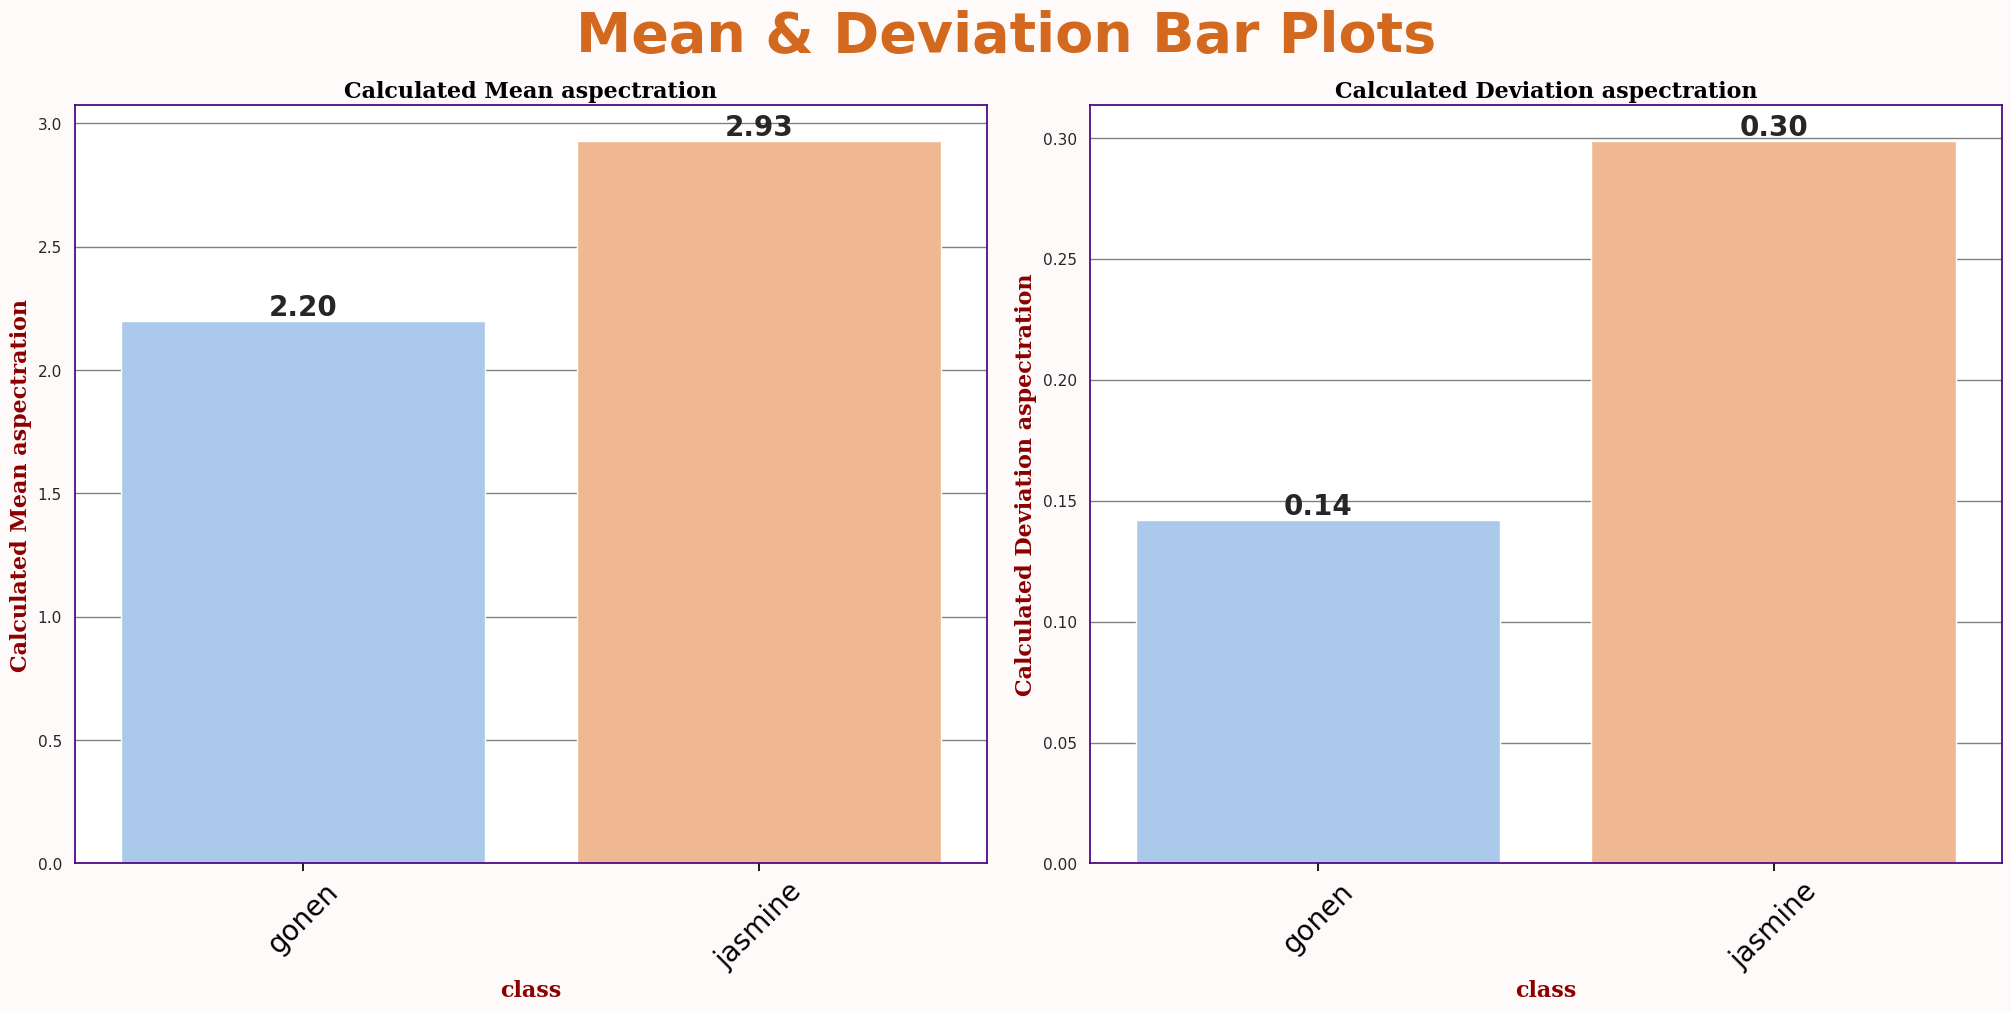

In [61]:
for value in num:
    plotting_bar(x=value,group='class')

**Count plots**

In [62]:
# Trying out the "->"  
def plotting_count(x:str,hue:str =None)->'Count plot':    
    try:
        fig, ax = plt.subplots(figsize=(20,10))
        my_palette = sns.color_palette('bright')
        sns.set_theme(style='whitegrid',rc=rc,palette=my_palette)
        # sns.set_theme(style='whitegrid',rc=rc,palette='bright')

        sns.countplot(data=eda, x=x, hue=hue)
        jasmine = eda['class'].unique()[0]
        gonen =  eda['class'].unique()[1]
        labels = [gonen, jasmine]

        # Customising the plot
        ax.set_xticklabels(labels,rotation=0,fontsize=20)
        ax.set_title(f'Count plot of number of {x} with {hue}',fontdict=font_title)
        ax.set_xlabel(f"{x}", fontdict=font_label)
        ax.set_ylabel("Count", fontdict=font_label)

        # Displaying values on top of bars for standard deviation
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontweight='bold',fontsize=15)

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')

In [63]:
plotting_count.__annotations__

{'x': str, 'hue': str, 'return': 'Count plot'}

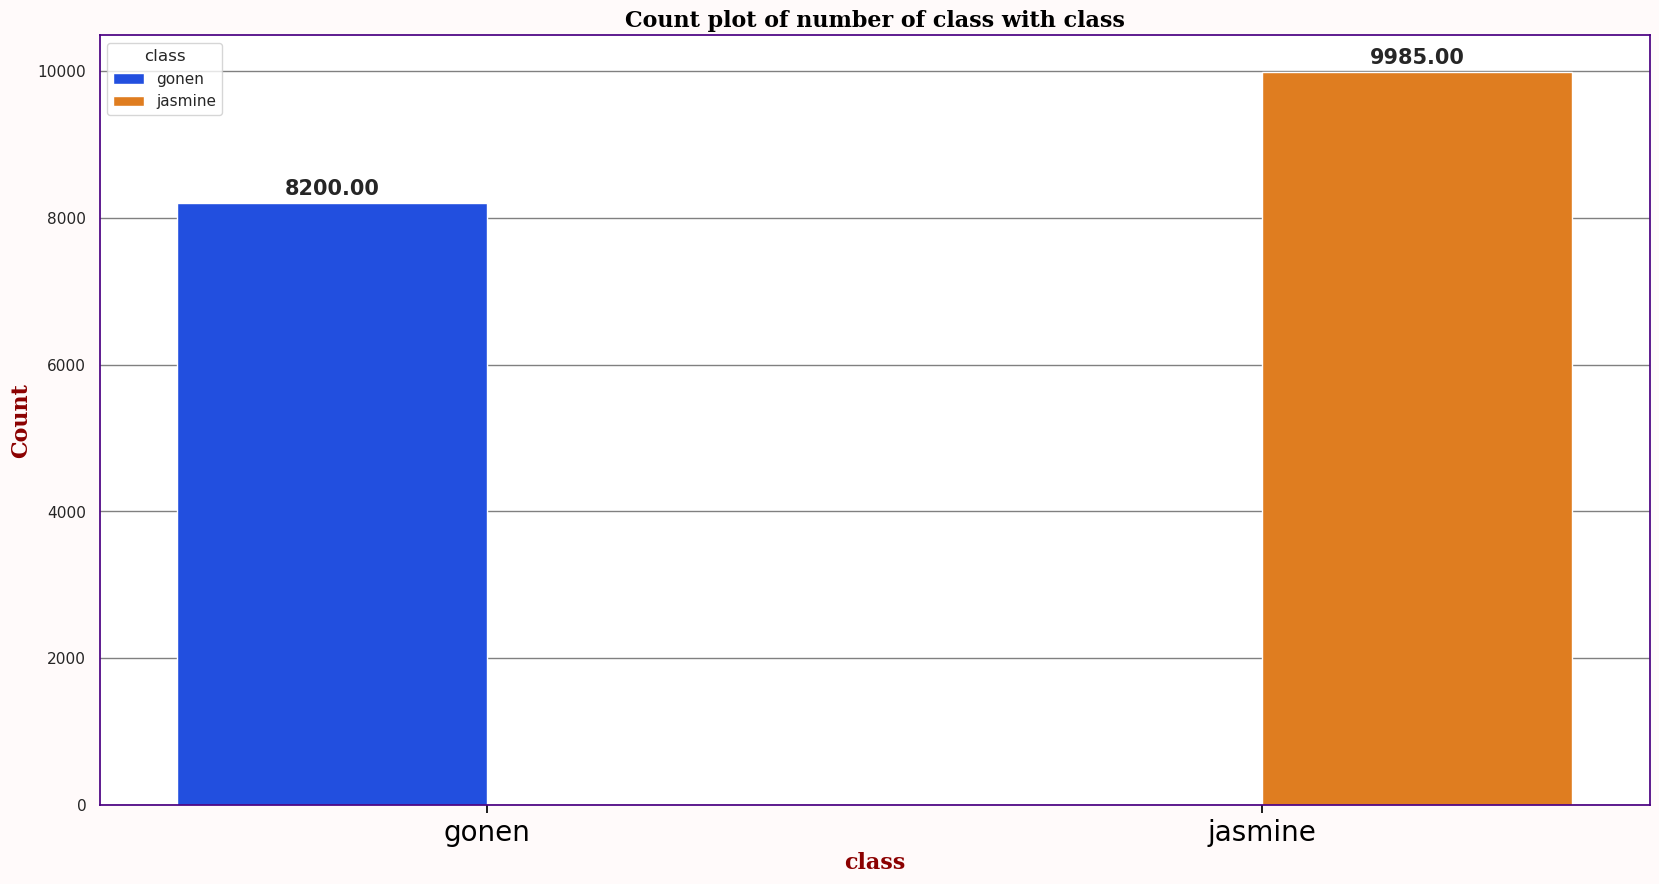

In [64]:
plotting_count('class','class')

**Histograms**

In [ ]:
# # some insights
# fig,ax = plt.subplots(2,5,constrained_layout=True,figsize=(30,20))
# ax = ax.ravel() # Flattened to a 1D array or  
# ax = ax.flatten() 
# # [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
# #  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
# #  <AxesSubplot:> <AxesSubplot:>]

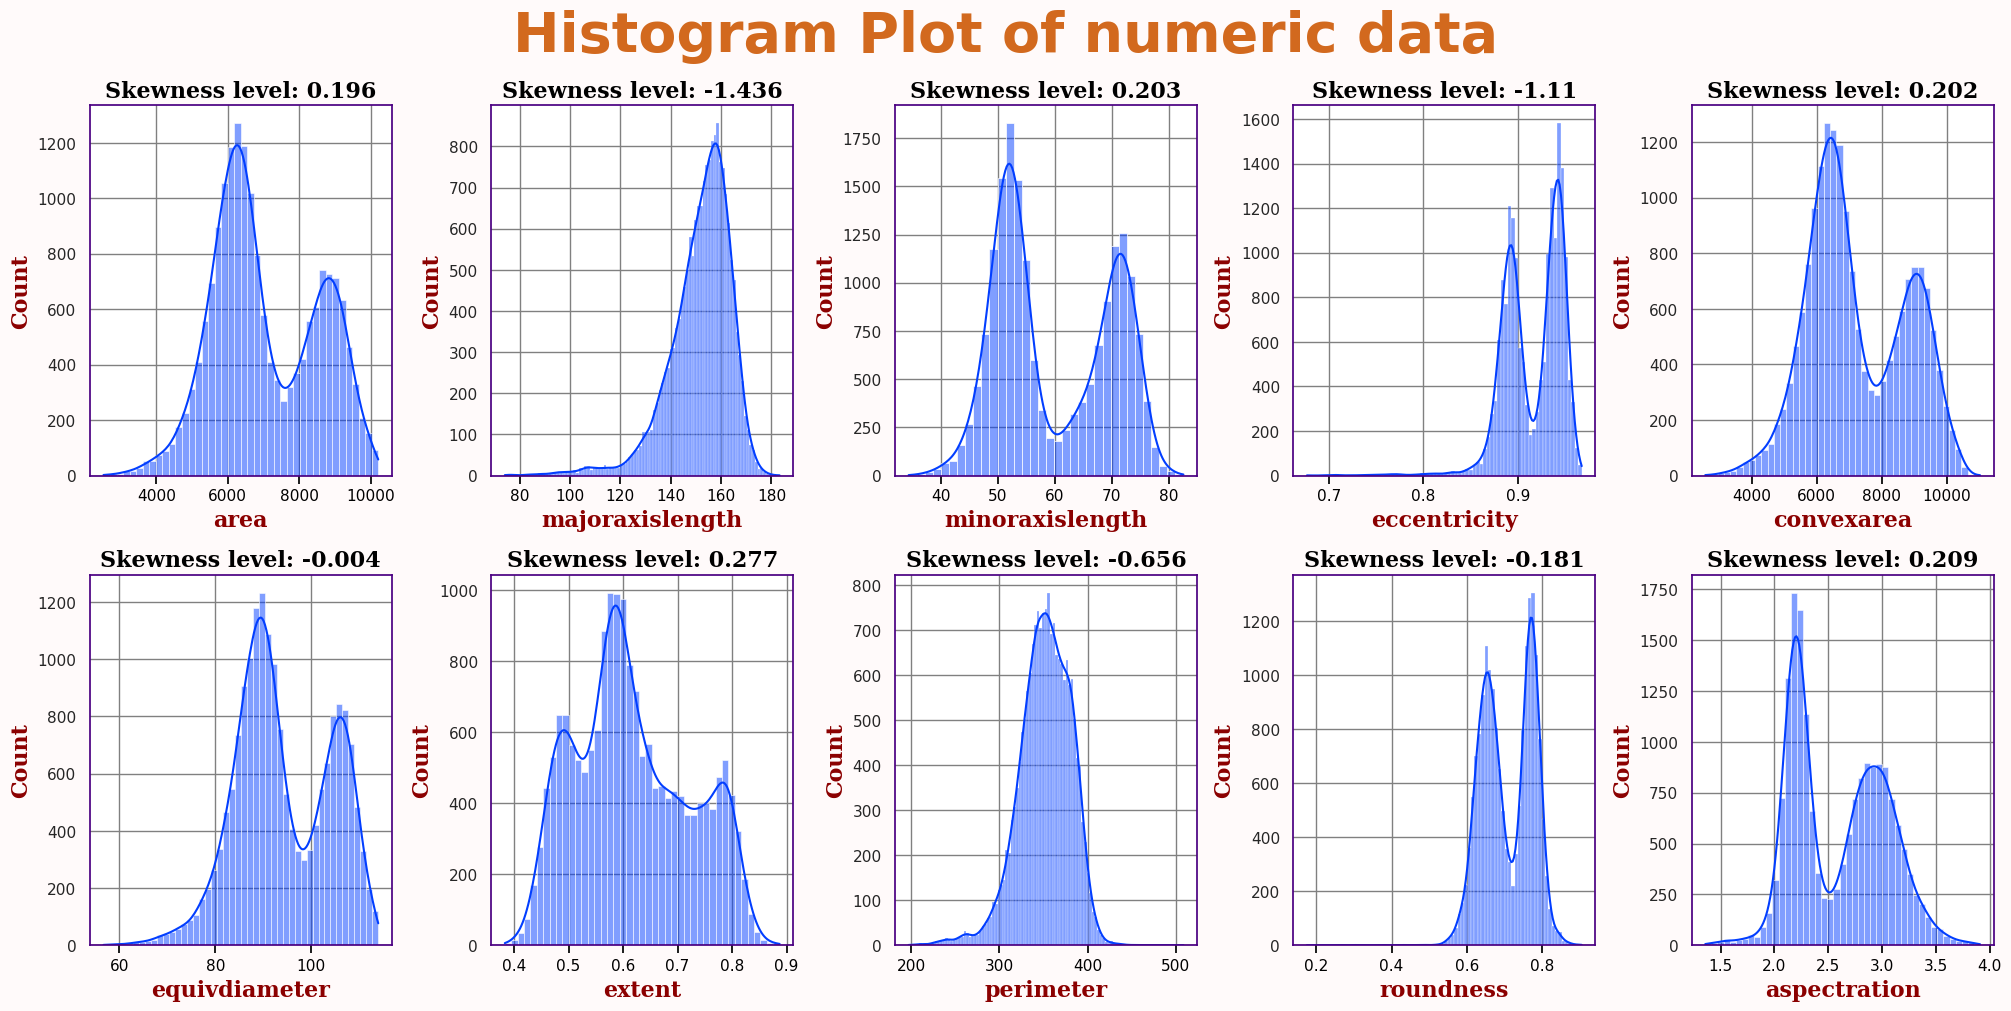

In [72]:
fig,ax = plt.subplots(2,5,constrained_layout=True,figsize=(20,10))
ax = ax.ravel() 
sns.set_theme(style='whitegrid',rc=rc,palette='bright')

for index, value in enumerate(num):
    sns.histplot(data=eda,x=value,ax=ax[index],kde=True)
    
    ax[index].set_title(f'Skewness level: {np.around(eda[value].skew(axis=0),3)}',
                            fontdict=font_title)

    ax[index].set_xlabel(f'{value}', fontdict=font_label)
    ax[index].set_ylabel("Count",fontdict=font_label)

    fig.suptitle(f"Histogram Plot of numeric data",
                fontdict=font_fig,fontsize=40,fontweight='bold')

In [91]:
def plotting_hist(data,col):
    try:
        fig,ax = plt.subplots(1,2,constrained_layout=True,figsize=(10,5))
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')
        
        jasmine = data['class'].unique()[0]
        gonen =  data['class'].unique()[1]

        # Conditions
        cond1 = data['class'] == gonen
        gonen = data.loc[cond1,:]

        cond2 = data['class'] == jasmine
        jasmine = data.loc[cond2,:]
        
        # Gonen plot
        sns.histplot(data=gonen,x=col,ax=ax[0],kde=True)
        
        ax[0].set_title(f'Gonen Skewness level: {np.around(gonen[col].skew(axis=0),3)}',
                                fontdict=font_title)

        ax[0].set_xlabel(f'{col}', fontdict=font_label)
        ax[0].set_ylabel("Count",fontdict=font_label)
        
        # Jasmine plot
        sns.histplot(data=jasmine,x=col,ax=ax[1],kde=True)
        
        ax[1].set_title(f'Jasmine Skewness level: {np.around(jasmine[col].skew(axis=0),3)}',
                                fontdict=font_title)

        ax[1].set_xlabel(f'{col}', fontdict=font_label)
        ax[1].set_ylabel("Count",fontdict=font_label)

        fig.suptitle(f"Histogram Plot of numeric data",
                    fontdict=font_fig,fontsize=40,fontweight='bold')

    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

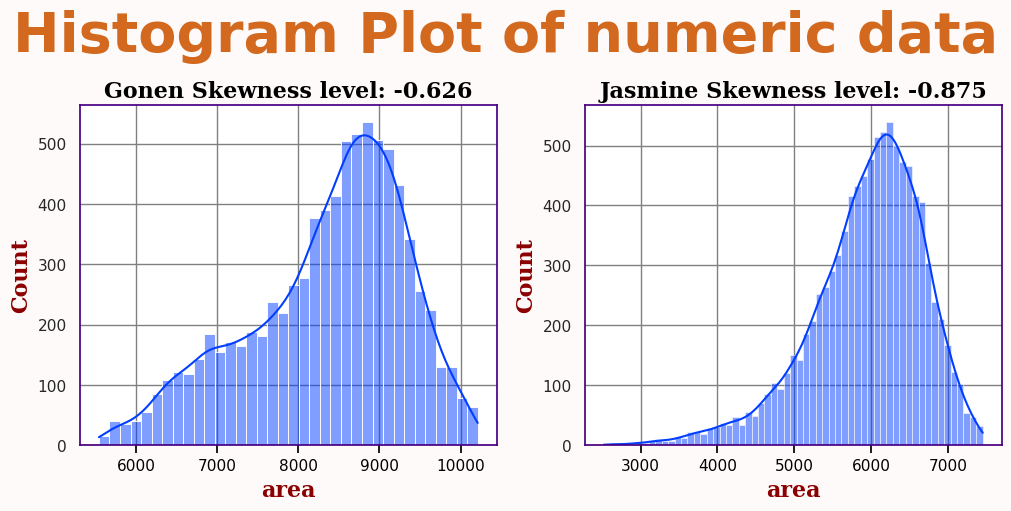

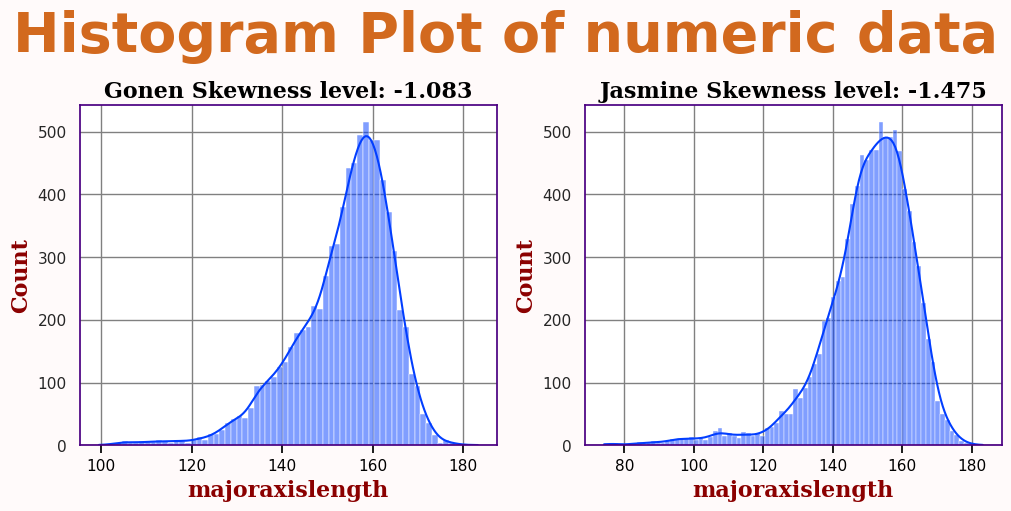

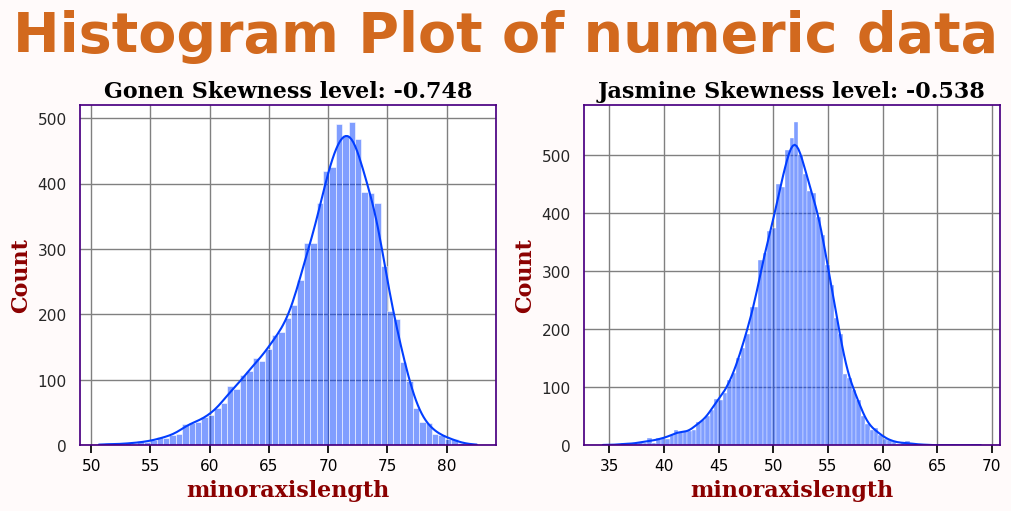

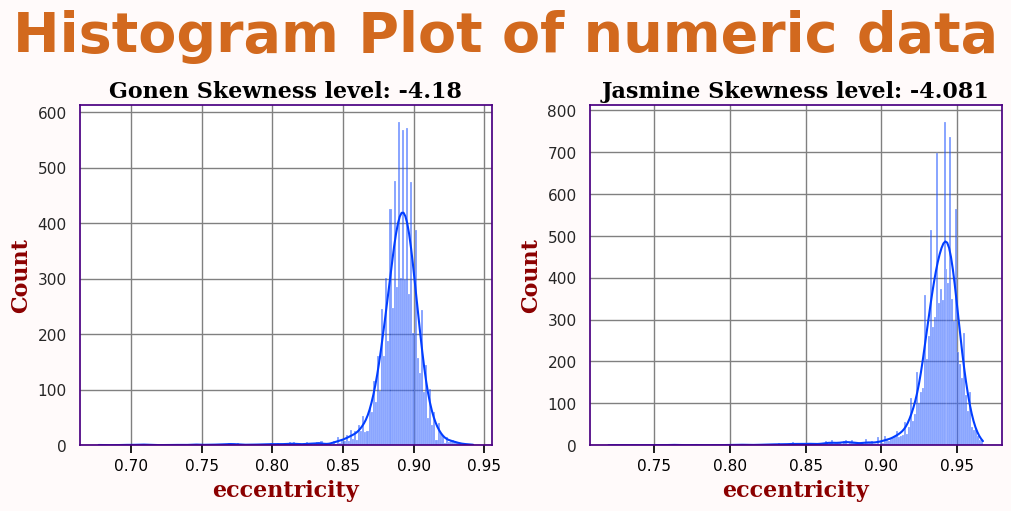

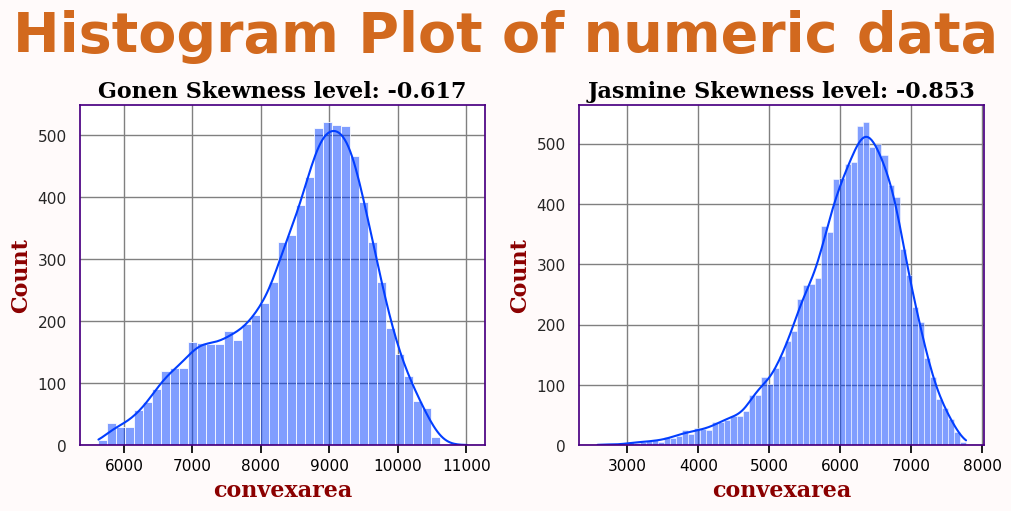

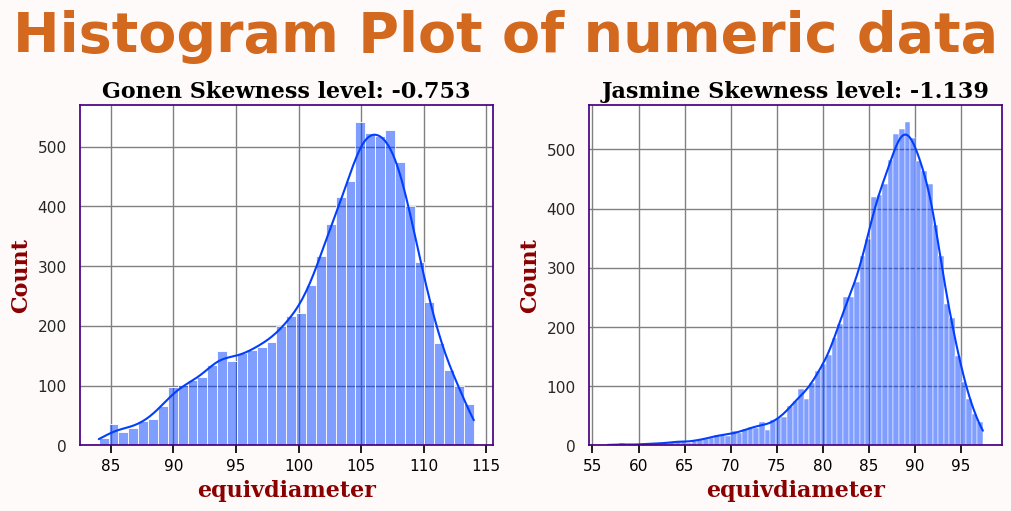

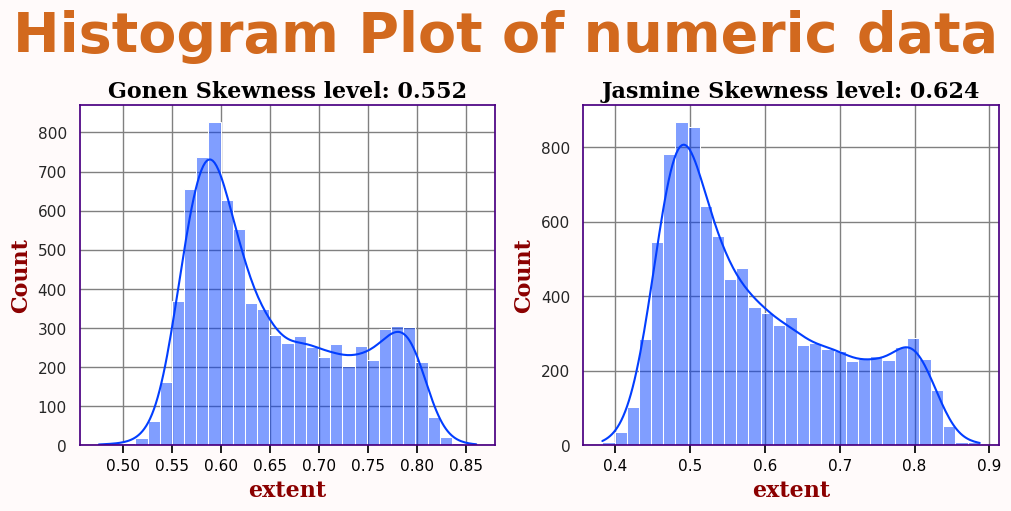

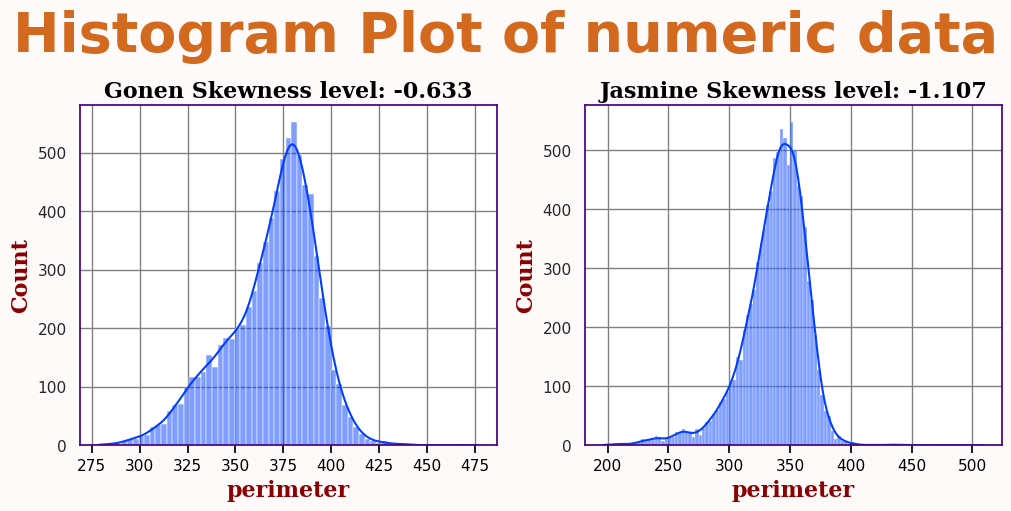

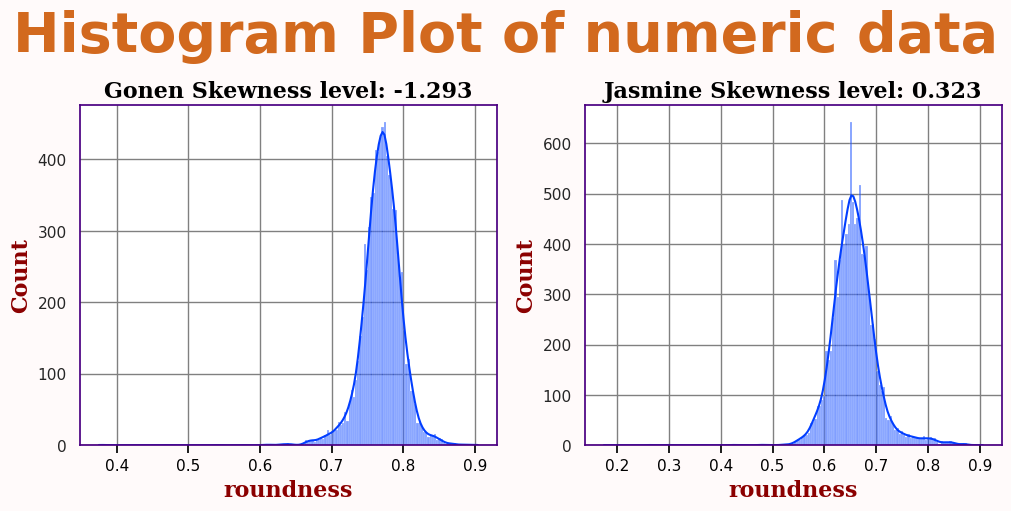

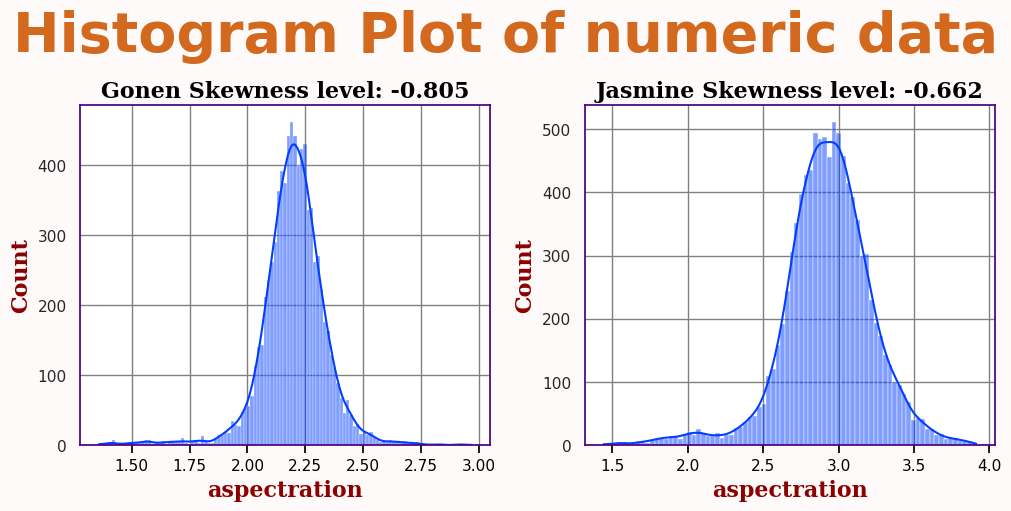

In [93]:
for value in num:
    plotting_hist(eda,value)

**Box plots**

In [106]:
def plotting_box(data,x:str):
    try:
        fig,ax = plt.subplots(1, figsize=(15,5),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')
        # ax = ax.ravel()

        sns.boxplot(data=data,y='class',x=x,hue='class',ax=ax)
        ax.set_title(f'Box plot of {x}',fontdict=font_title)
        ax.set_xlabel(f"{x}", fontdict=font_label)
        ax.set_ylabel(f"Class", fontdict=font_label)
        fig.suptitle("Box plots",fontdict=font_fig,fontsize=30,fontweight='bold')

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

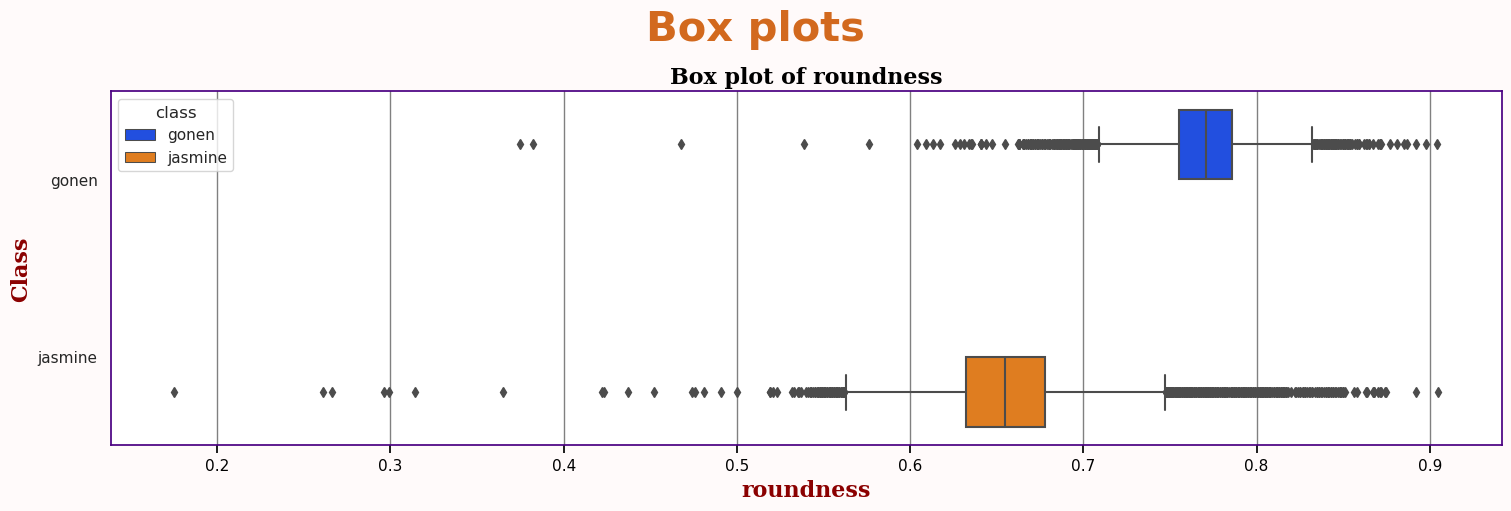

In [107]:
plotting_box(eda,num[8])

In [155]:
def outliers(data,col):
    Q_1 = np.quantile(data[col],0.25)
    Q_2 = np.quantile(data[col],0.50)
    Q_3 = np.quantile(data[col],0.75)
    IQR = Q_3 - Q_1 
    lower_bound = Q_1 - (1.5* IQR)
    upper_bound = Q_3 + (1.5* IQR)
    IQR_values = ((data[col] >= Q_1) & (data[col] <= Q_3)).sum()
    outliers_beyond_upper_bound = (data[col] > upper_bound).sum()
    outliers_below_lower_bound = (data[col]  < lower_bound).sum()
    print(f"IQR value for column {col} is: {np.round(IQR,3)}")
    print(f"Q_1 value for column {col} is: {np.round(Q_1,3)}, 25% of the data is below {np.round(Q_1,3)}")
    print(f"Q_2 value for column {col} is: {np.round(Q_2,3)}, 50% of the data is below {np.round(Q_2,3)}")
    print(f"Q_3 value for column {col} is: {np.round(Q_3,3)}, 75% of the data is below {np.round(Q_3,3)}")
    print(f"Lower bound value for column {col} is: {lower_bound}")
    print(f"Upper bound value for column {col} is: {upper_bound}")
    print(f"The number of values within the IQR for {col} is {IQR_values}")
    print(f"The number of outliers beyond the upper bound for {col} is {outliers_beyond_upper_bound}")
    print(f"The number of outliers below the lower bound for {col} is {outliers_below_lower_bound}\n")

In [161]:
cond1 = eda['class'] == 'gonen'
cond2 = eda['class'] == 'jasmine'
gonen = eda[cond1]
jasmine = eda[cond2]
print("Gonen box plot details:")
outliers(gonen,'roundness')
print("Jasmine box plot details:")
outliers(jasmine,'roundness')

Gonen box plot details:
IQR value for column roundness is: 0.031
Q_1 value for column roundness is: 0.755, 25% of the data is below 0.755
Q_2 value for column roundness is: 0.771, 50% of the data is below 0.771
Q_3 value for column roundness is: 0.786, 75% of the data is below 0.786
Lower bound value for column roundness is: 0.7084999999999999
Upper bound value for column roundness is: 0.8325
The number of values within the IQR for roundness is 4243
The number of outliers beyond the upper bound for roundness is 111
The number of outliers below the lower bound for roundness is 198

Jasmine box plot details:
IQR value for column roundness is: 0.046
Q_1 value for column roundness is: 0.632, 25% of the data is below 0.632
Q_2 value for column roundness is: 0.655, 50% of the data is below 0.655
Q_3 value for column roundness is: 0.678, 75% of the data is below 0.678
Lower bound value for column roundness is: 0.563
Upper bound value for column roundness is: 0.7470000000000001
The number of v

**Heat Map**

In [153]:
corr = eda[num].corr()
# corr.style.background_gradient()

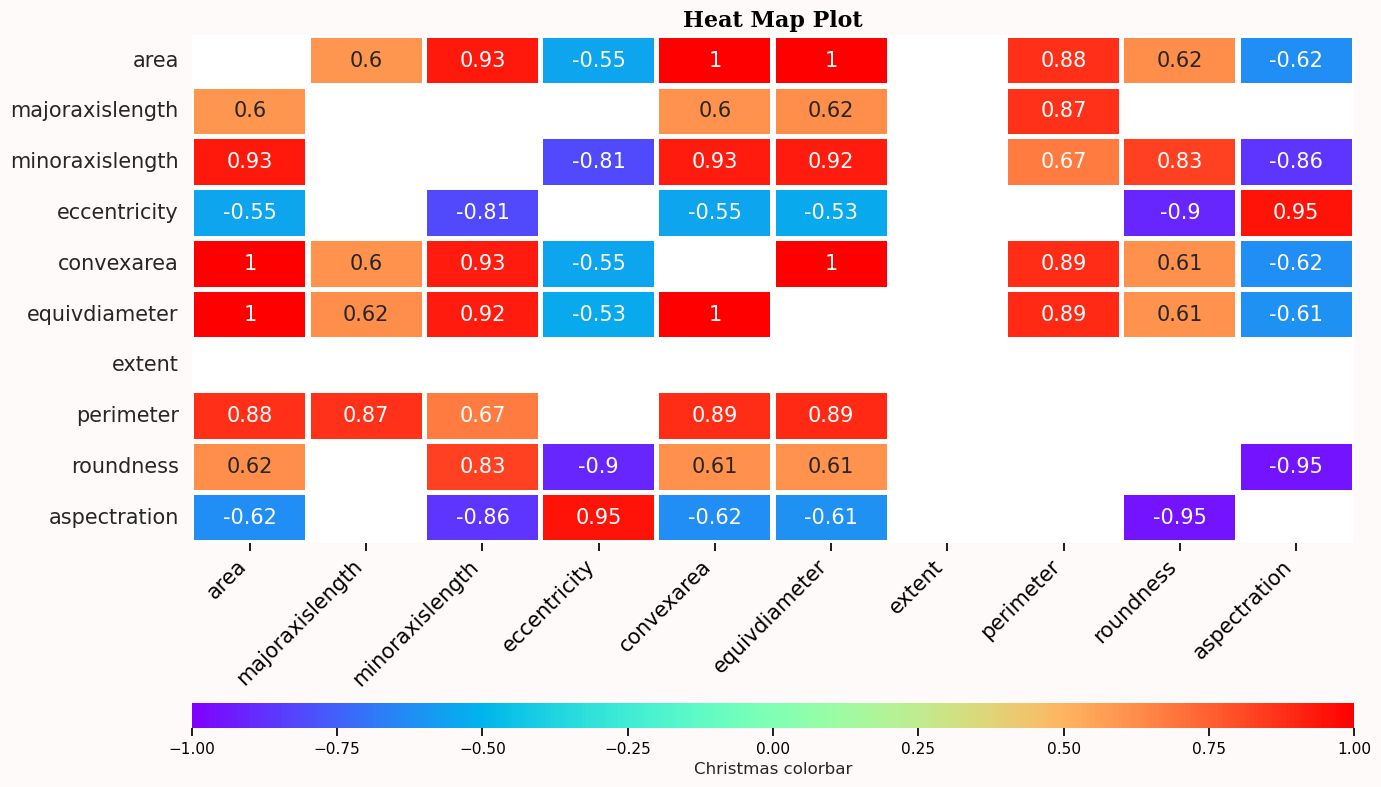

In [127]:
cond = (corr <= -.5) | (corr >= .5)
filter_corr  = corr[(cond) & (corr!=1)]
sns.set_theme(style='whitegrid',rc=rc)
grid_kws = {"height_ratios": (1,.05),"hspace":.6}
fig, (ax,cbar_ax) = plt.subplots(2,figsize=(15,9),gridspec_kw=grid_kws)

heatmap = sns.heatmap(
    filter_corr,
    ax=ax,
    cbar_ax=cbar_ax,
    cmap='rainbow',
    annot=True,
    annot_kws={'size': 15},
    vmin=-1,
    vmax=1,
    cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
    linewidths=3
)
# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right',fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=15)
heatmap.set_title("Heat Map Plot",fontdict=font_title)
plt.show()

**Observations**

*For +ve correlation*
- area has high positive correlation with minor axis length, convex area, equivdiameter and perimeter.
-  major axis length has high positive correlation with perimeter.
-  minor axis length has high positive correlation with convex area, equivdiameter and roundness.
- eccentricity has high positive correlatoin with aspect ration.
- convex area has high positive correlation with equivdiameter and perimeter.
- equivdiameter has high positive correlation with perimeter.


*For -ve correlation*
- minor axis length has high negative correlation with eccentricity and aspect ration.
- eccentricity has high negative correlation with roundness.
- roundness has high negative correlation with aspect ration.

*No correlation*
- extent has no correlation with anything, this feature can be dropped.

**Line Plot**

In [163]:
def plotting_lines(data,x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='husl',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.lineplot(data=data,x=x,y=y) #,hue='gender')
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

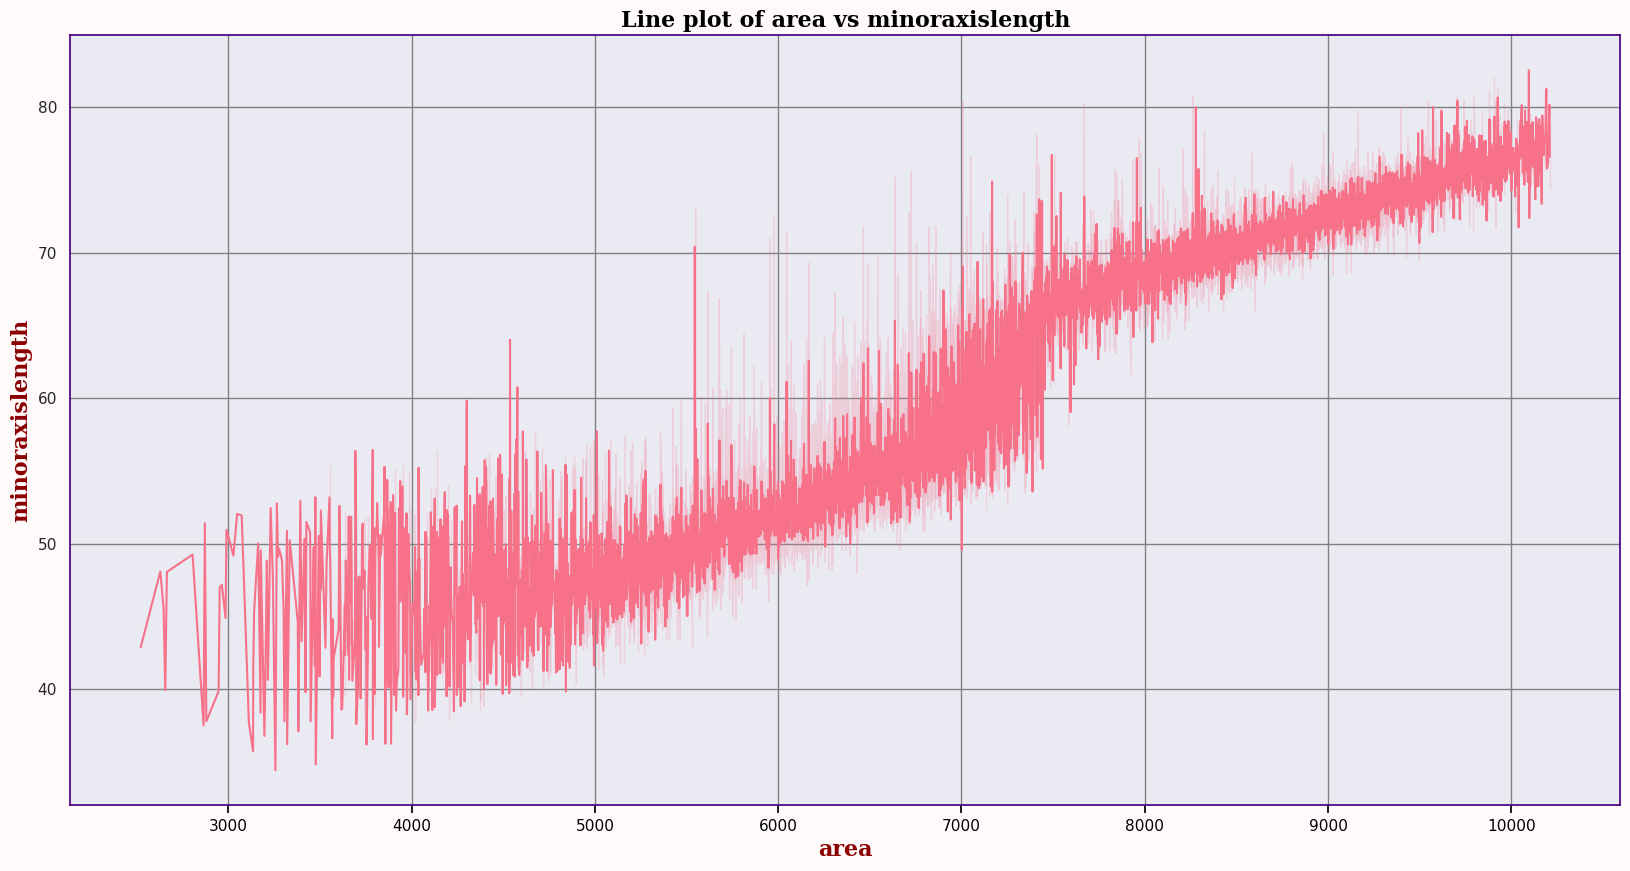

In [164]:
# Just trying out something
# try:
#     plotting_lines('area','minoraxislength')
# except TypeError:
#     print("An argument is missing")

plotting_lines(eda,'area','minoraxislength')

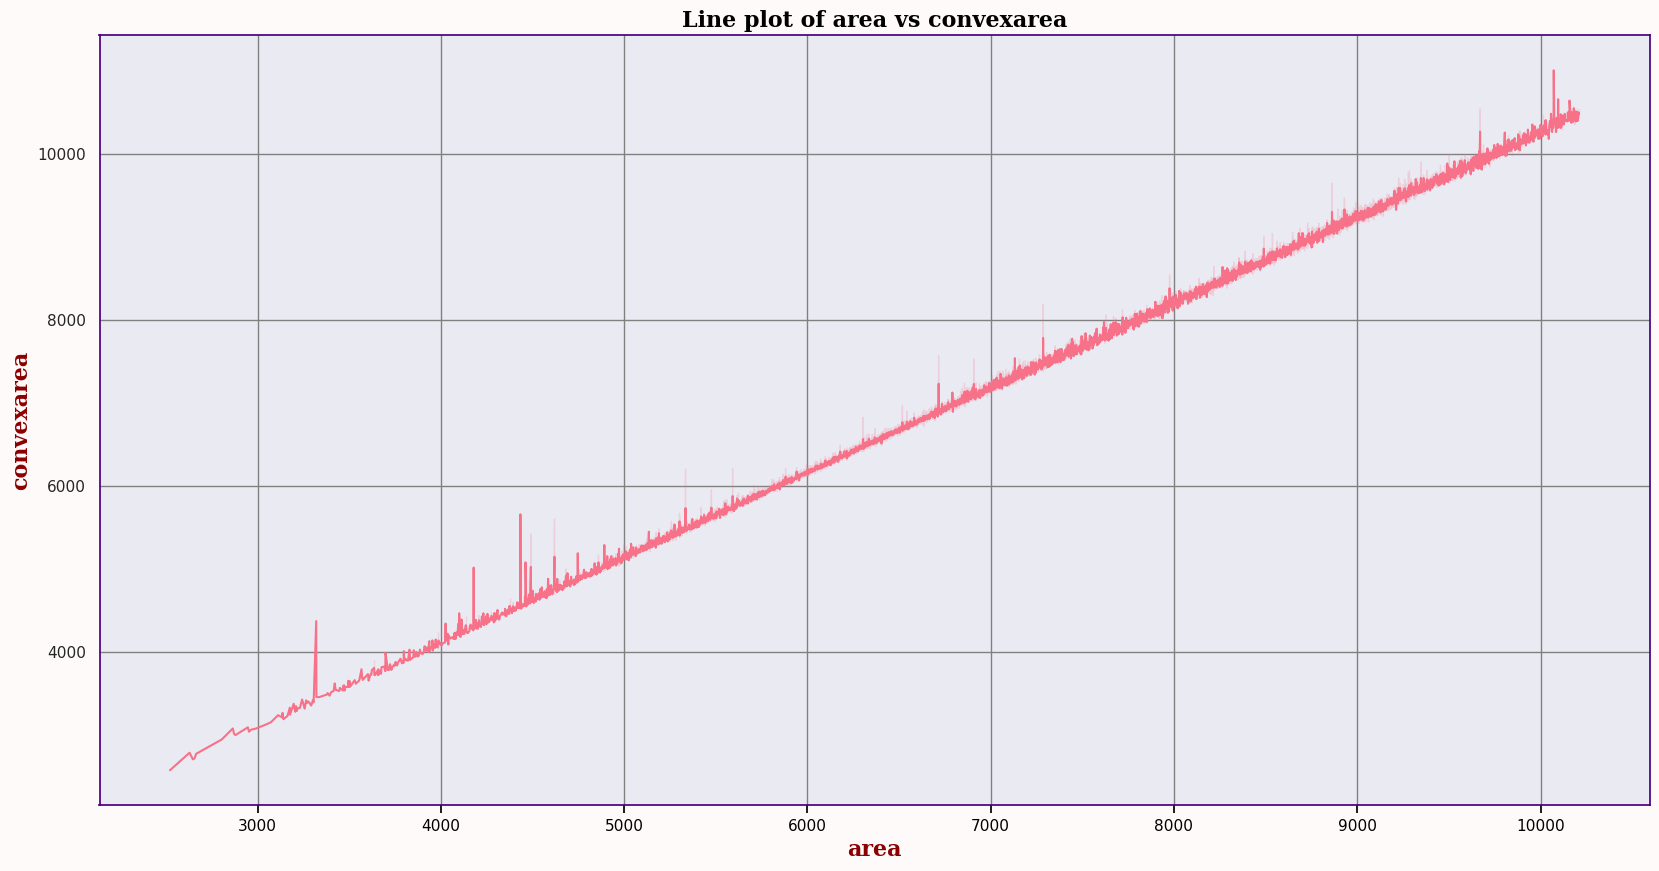

In [165]:
plotting_lines(eda,'area','convexarea')


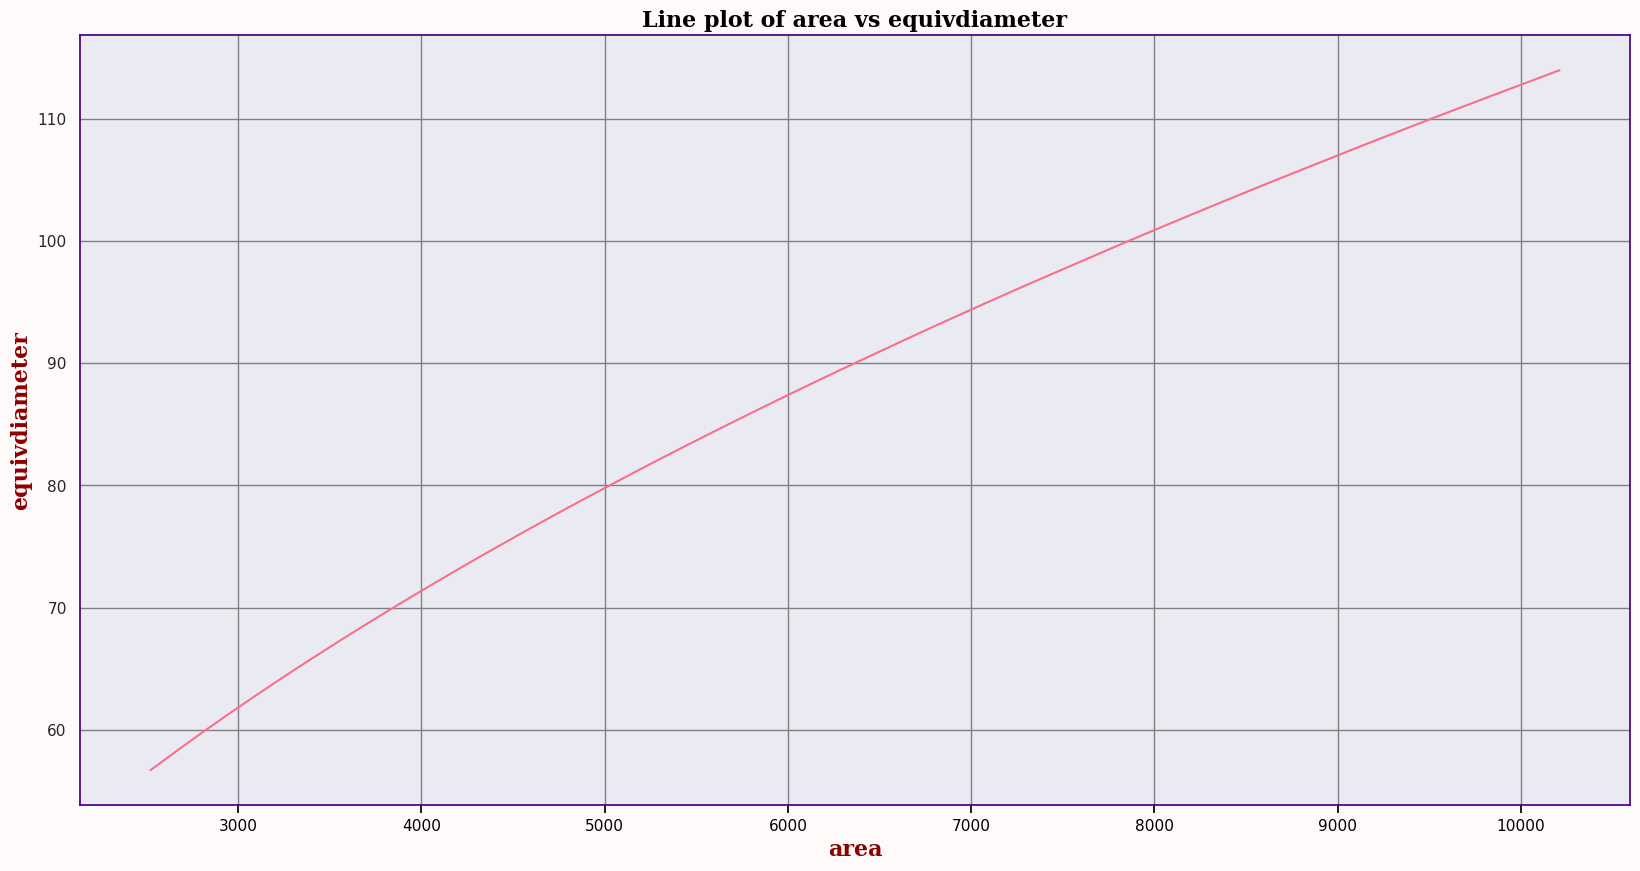

In [166]:
plotting_lines(eda,'area','equivdiameter')

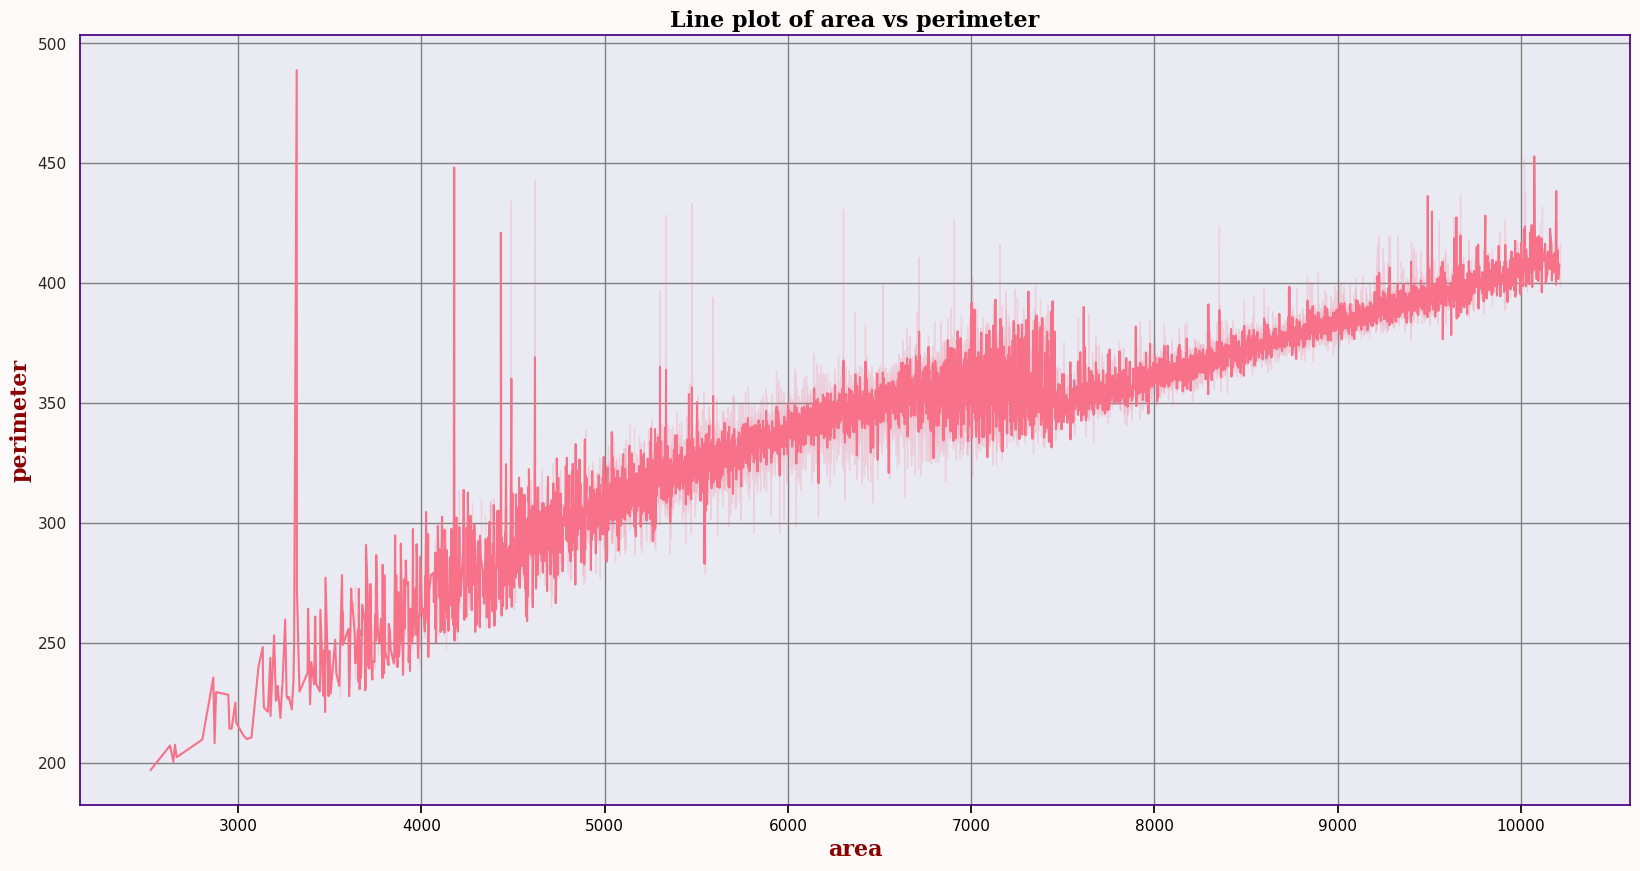

In [167]:
plotting_lines(eda,'area','perimeter')

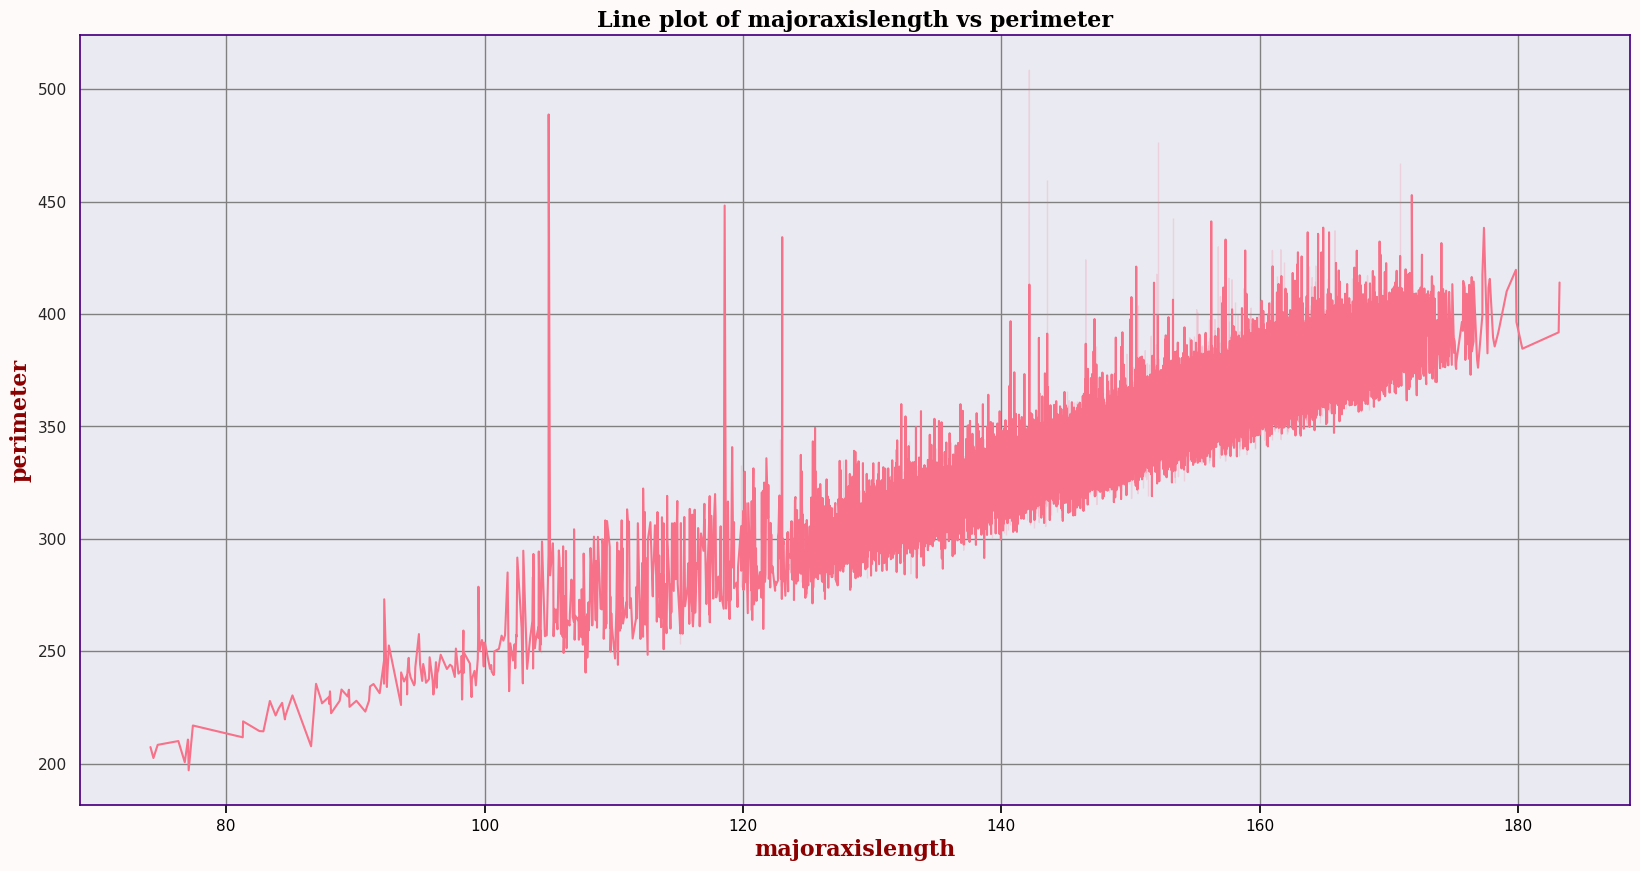

In [168]:
plotting_lines(eda,'majoraxislength','perimeter')

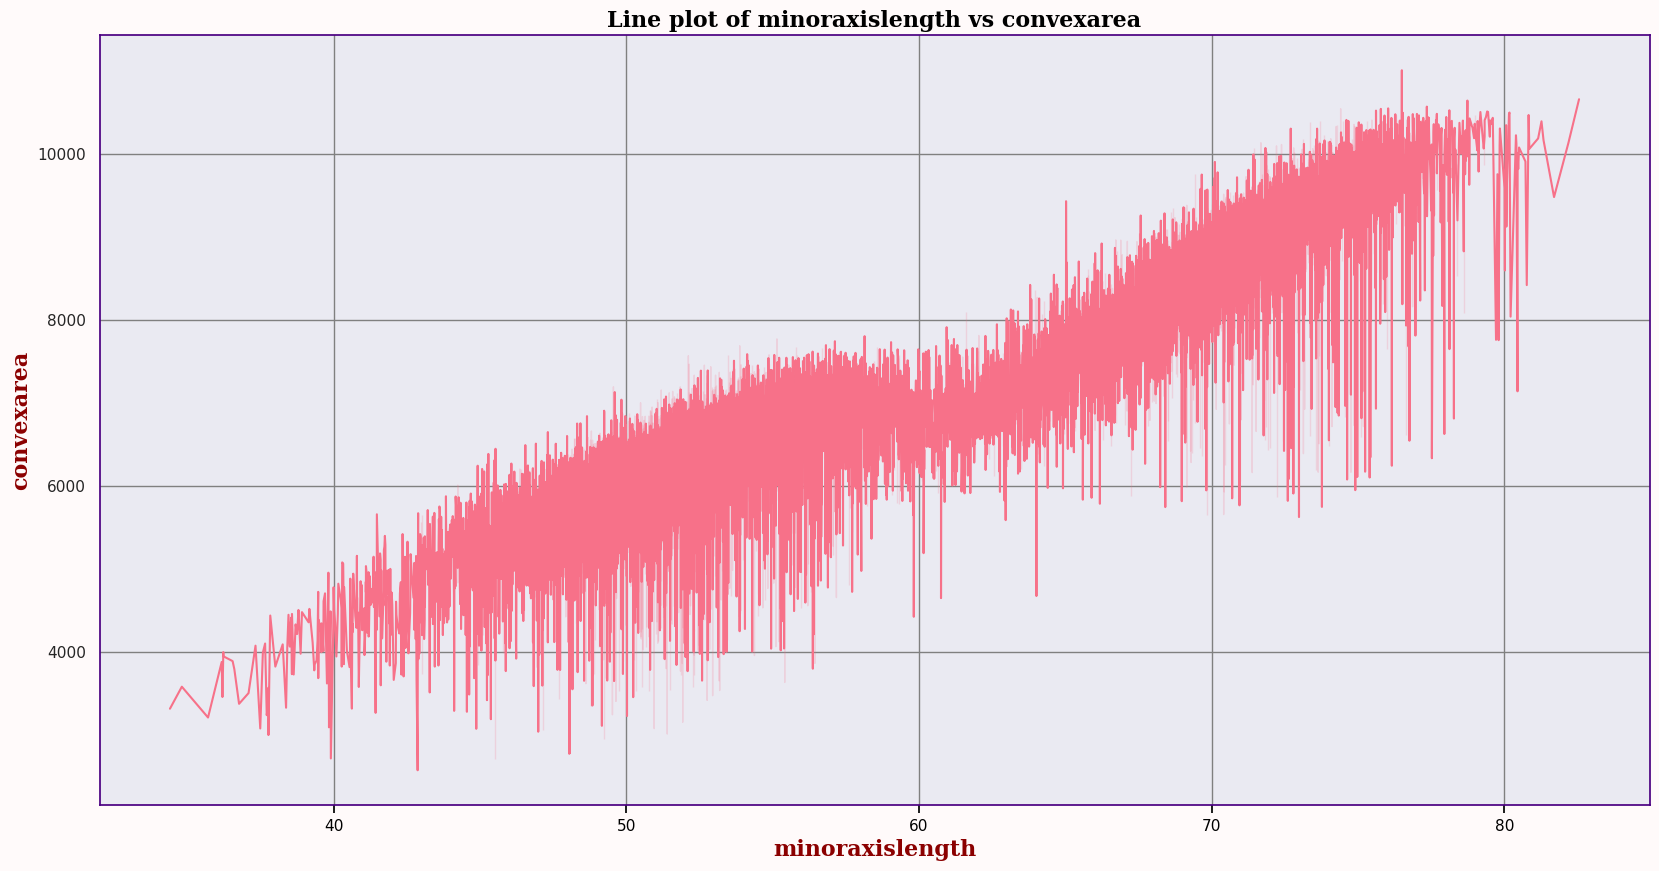

In [169]:
plotting_lines(eda,'minoraxislength','convexarea')

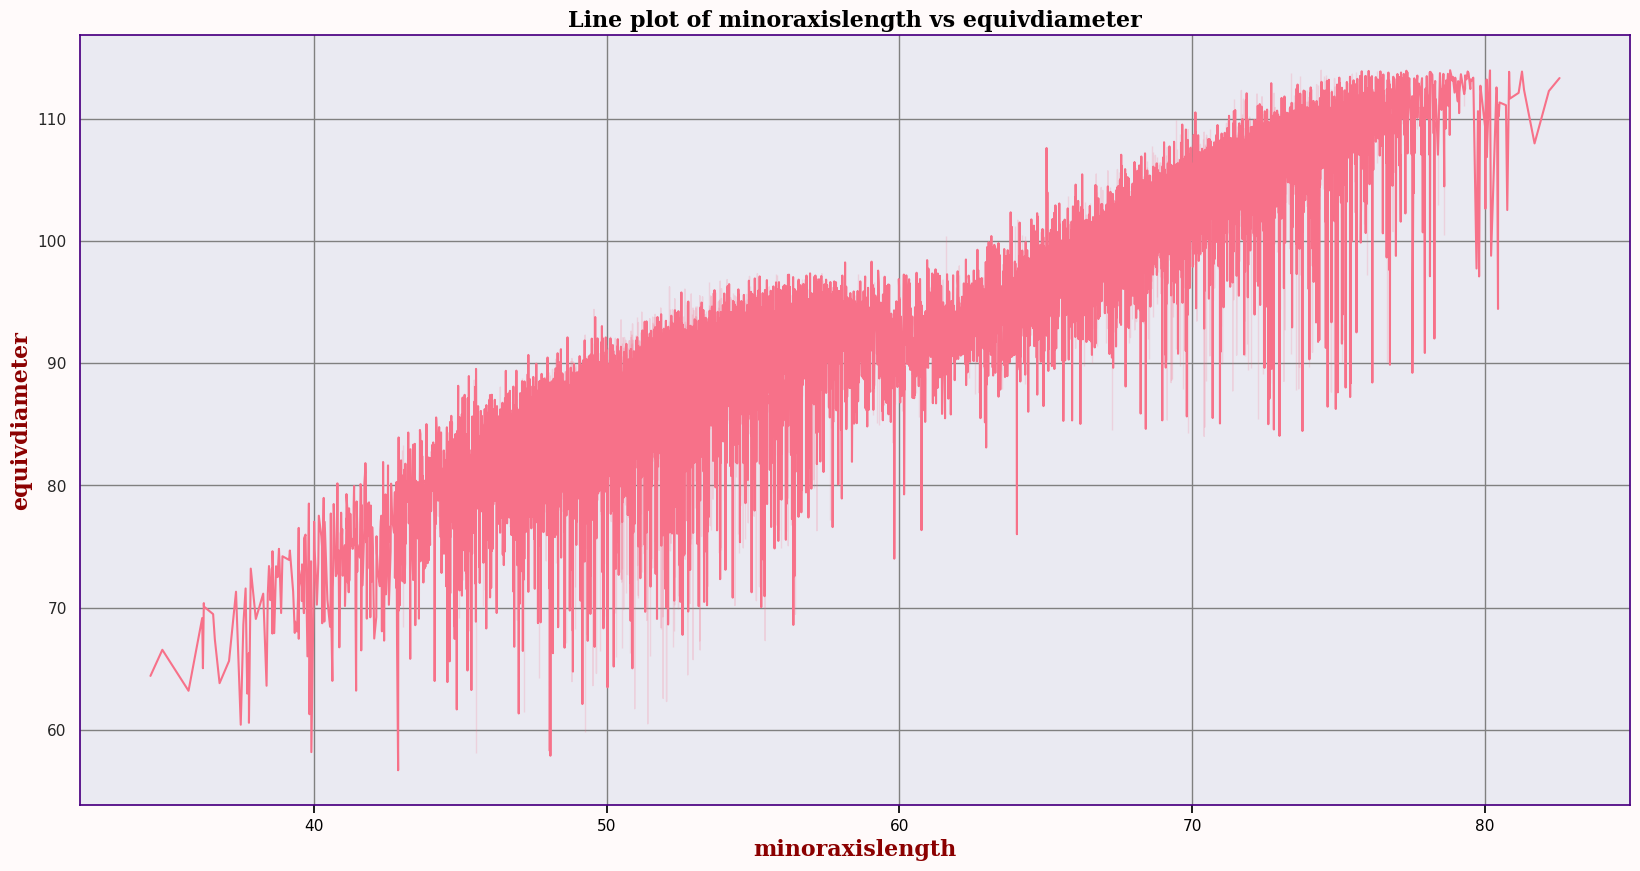

In [170]:
plotting_lines(eda,'minoraxislength','equivdiameter')


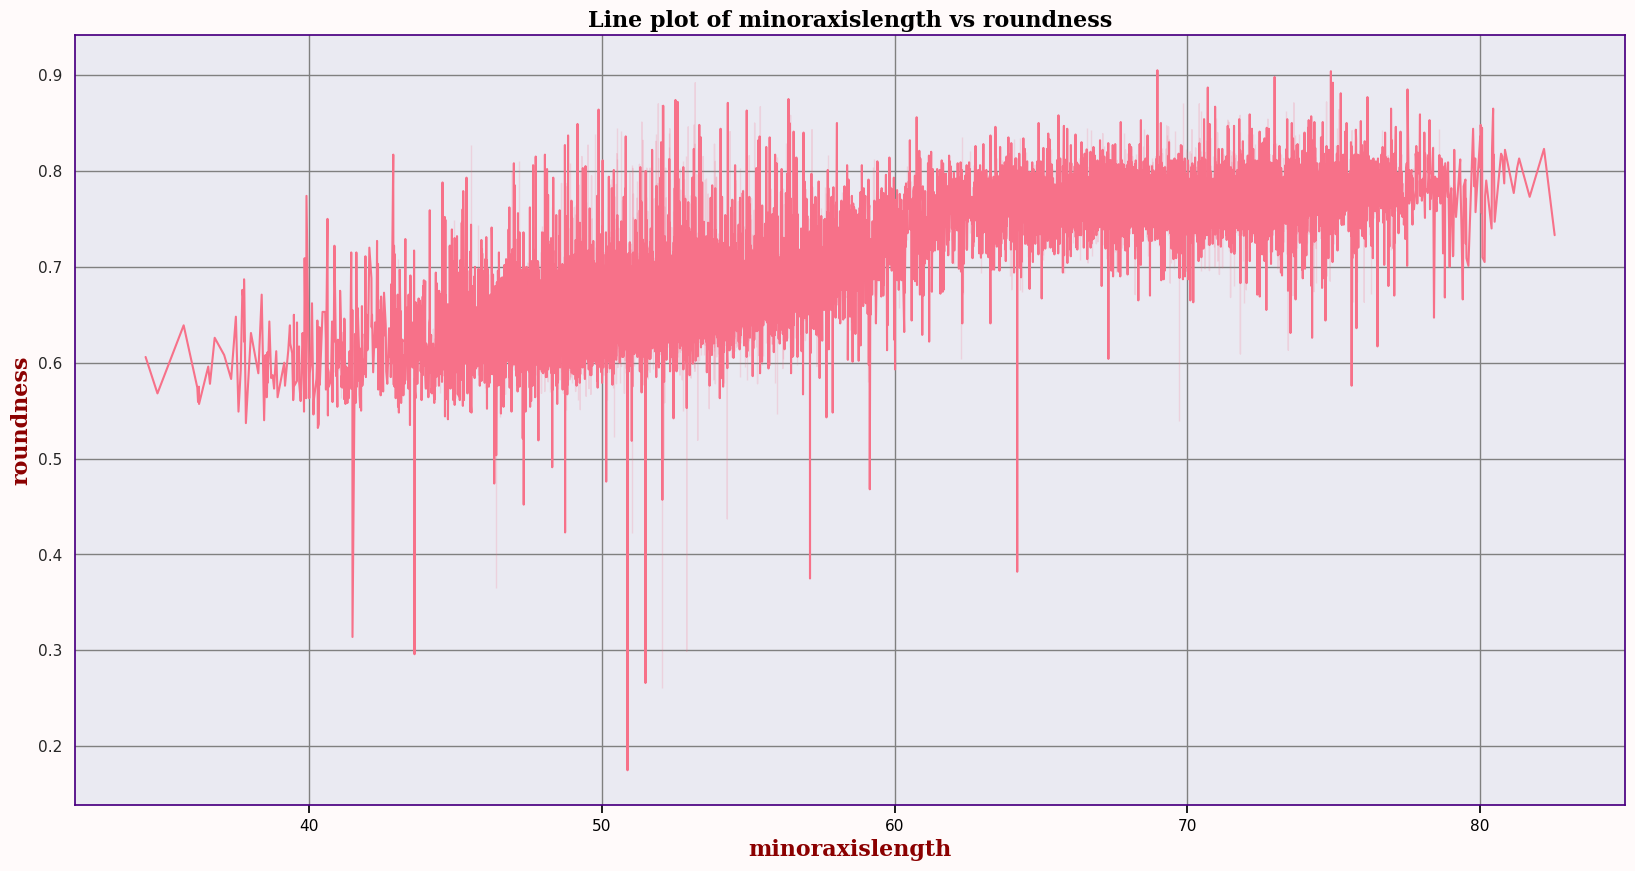

In [171]:
plotting_lines(eda,'minoraxislength','roundness')

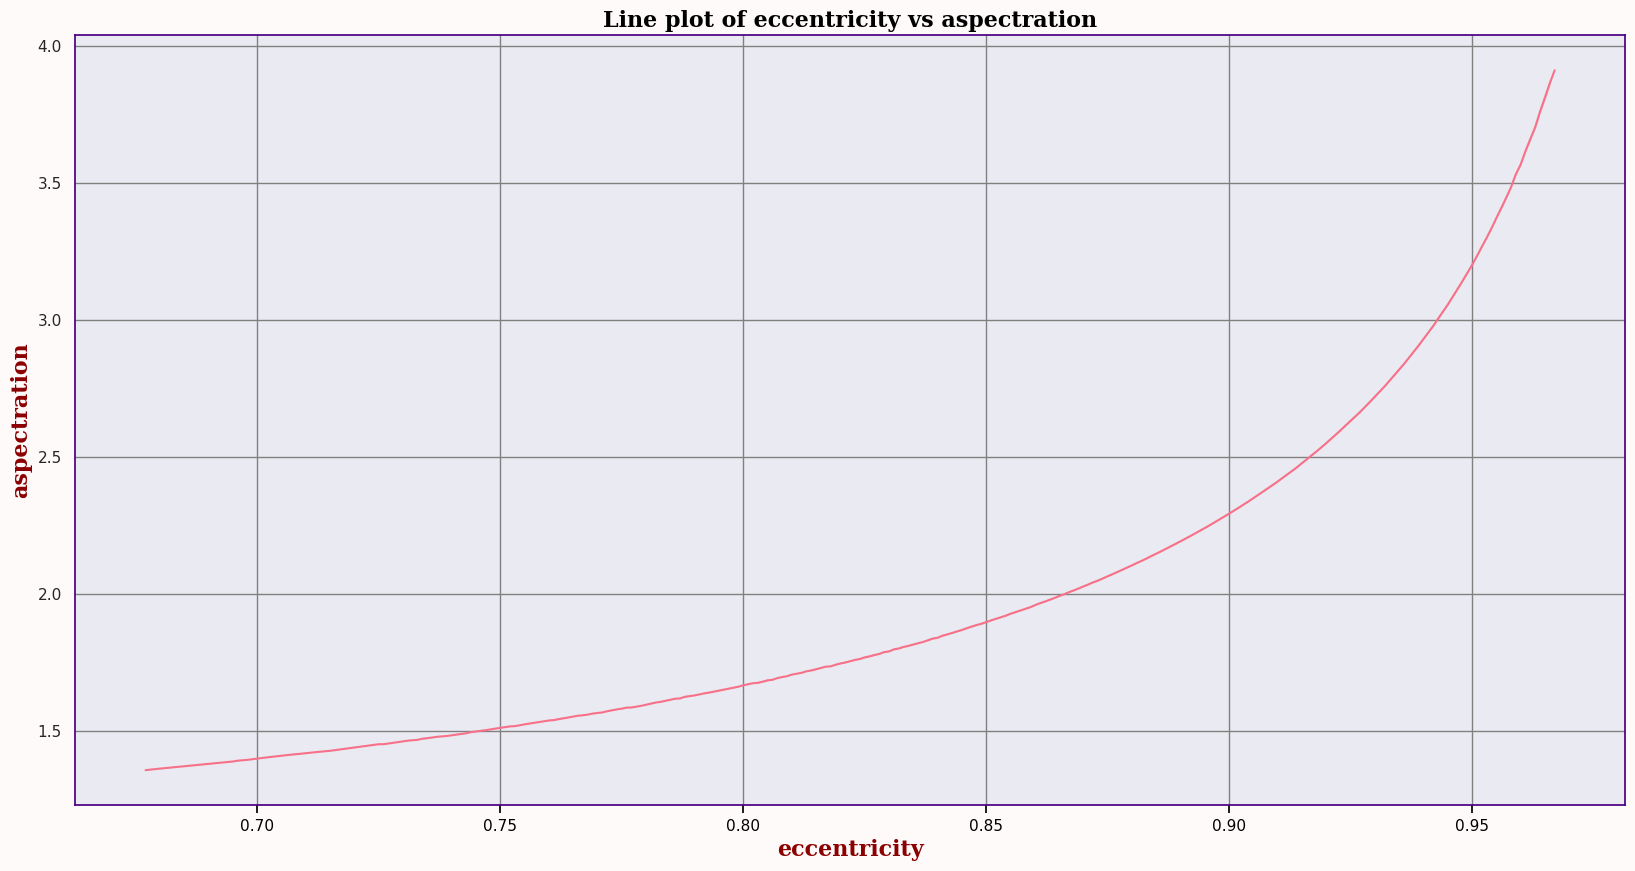

In [172]:
plotting_lines(eda,'eccentricity','aspectration')

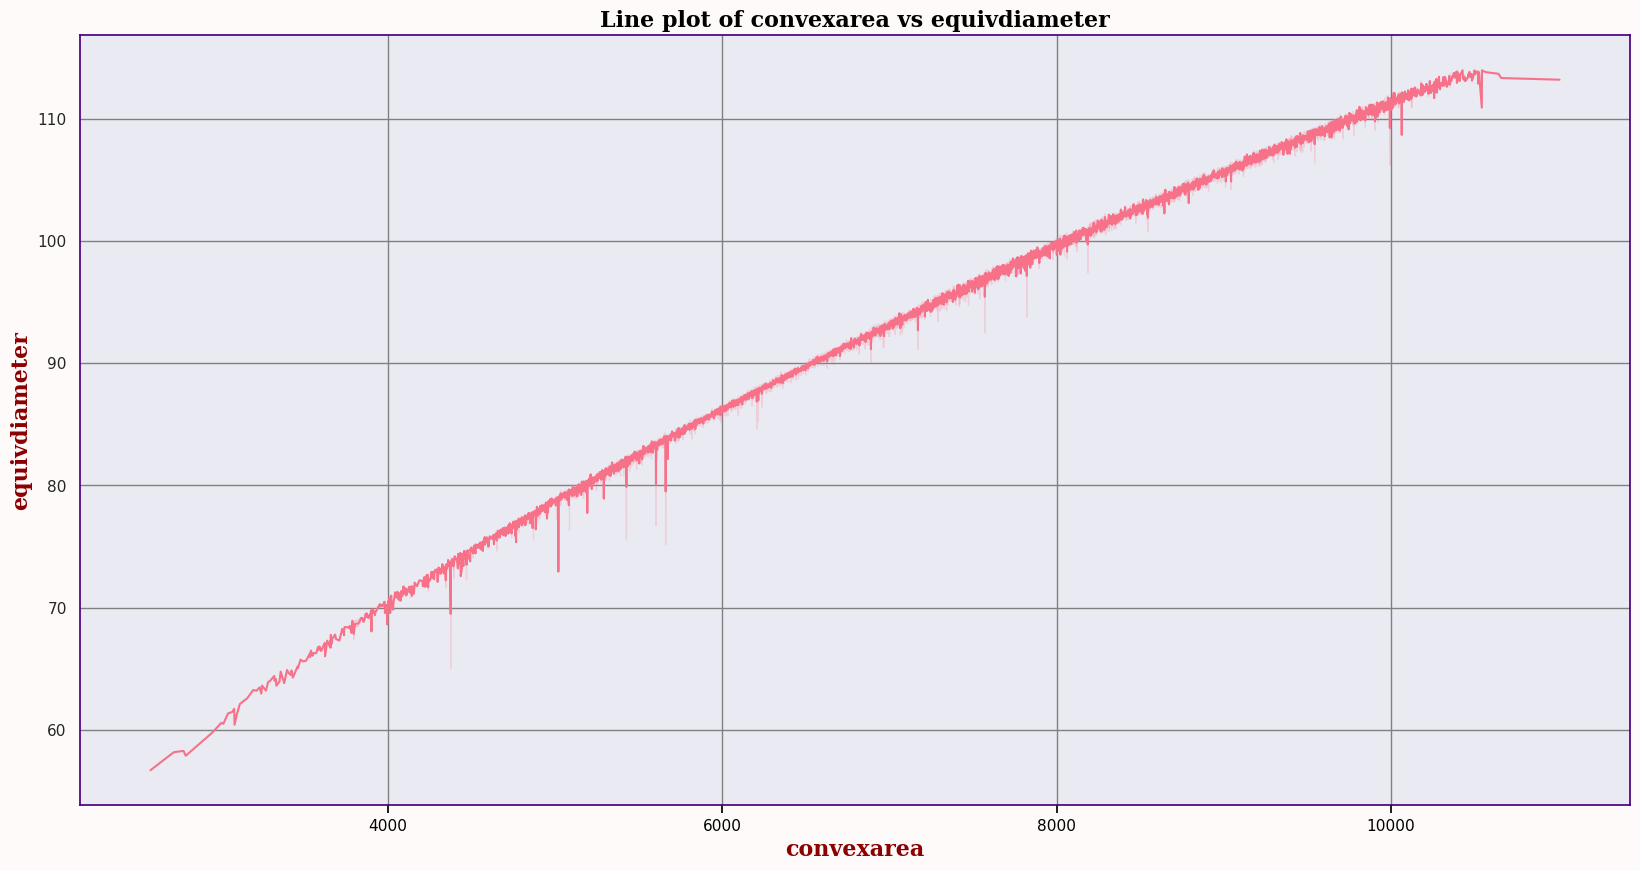

In [173]:
plotting_lines(eda,'convexarea','equivdiameter')

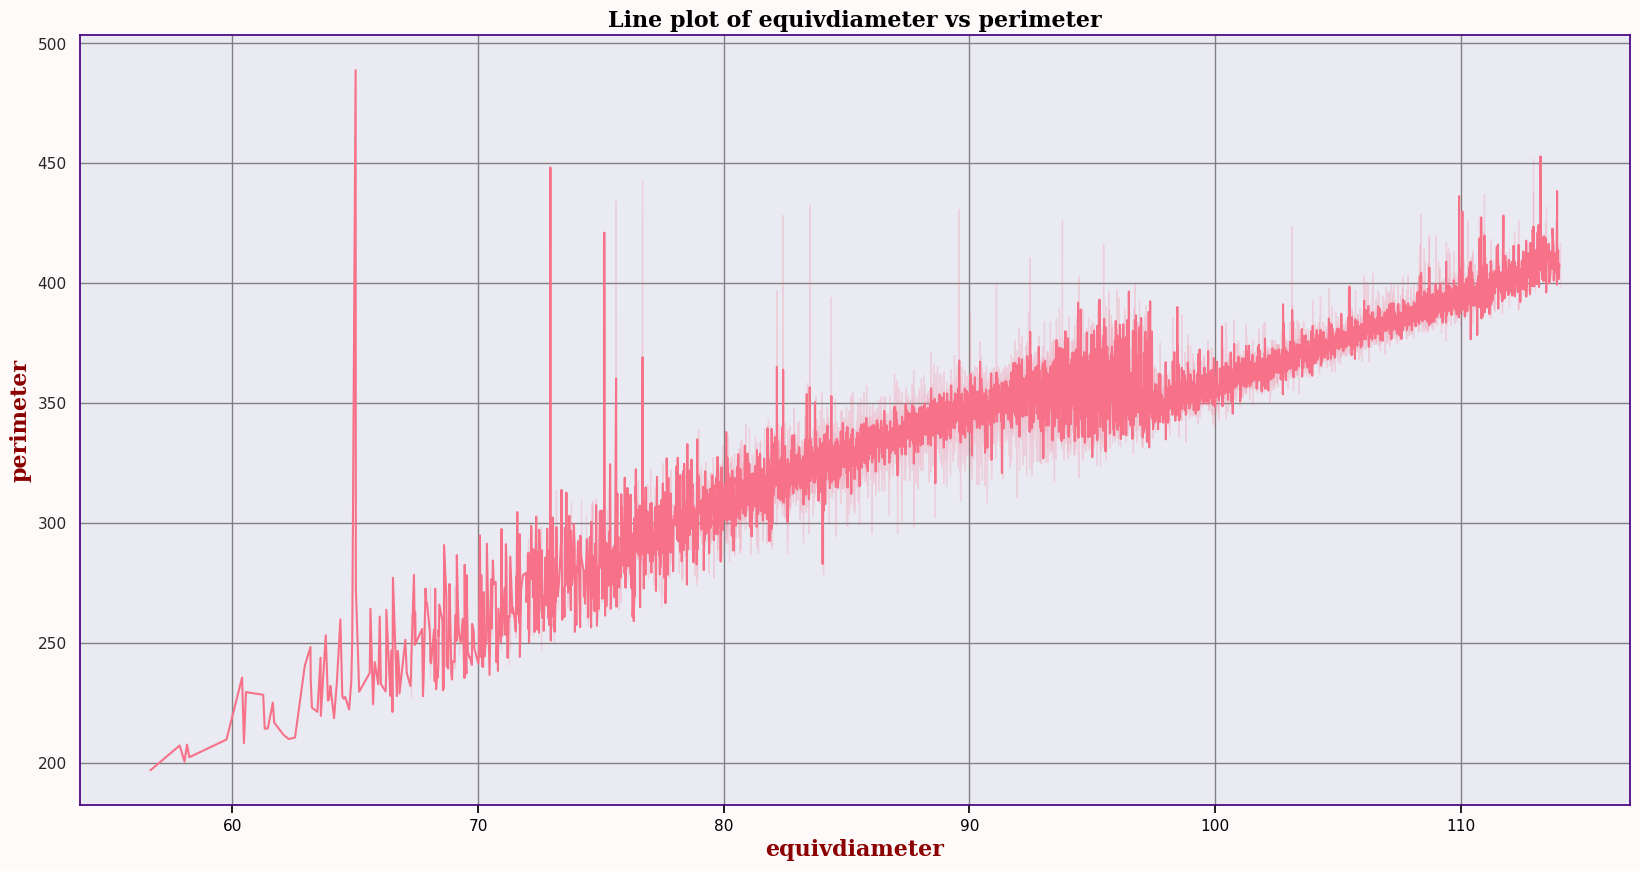

In [174]:
plotting_lines(eda,'equivdiameter','perimeter')

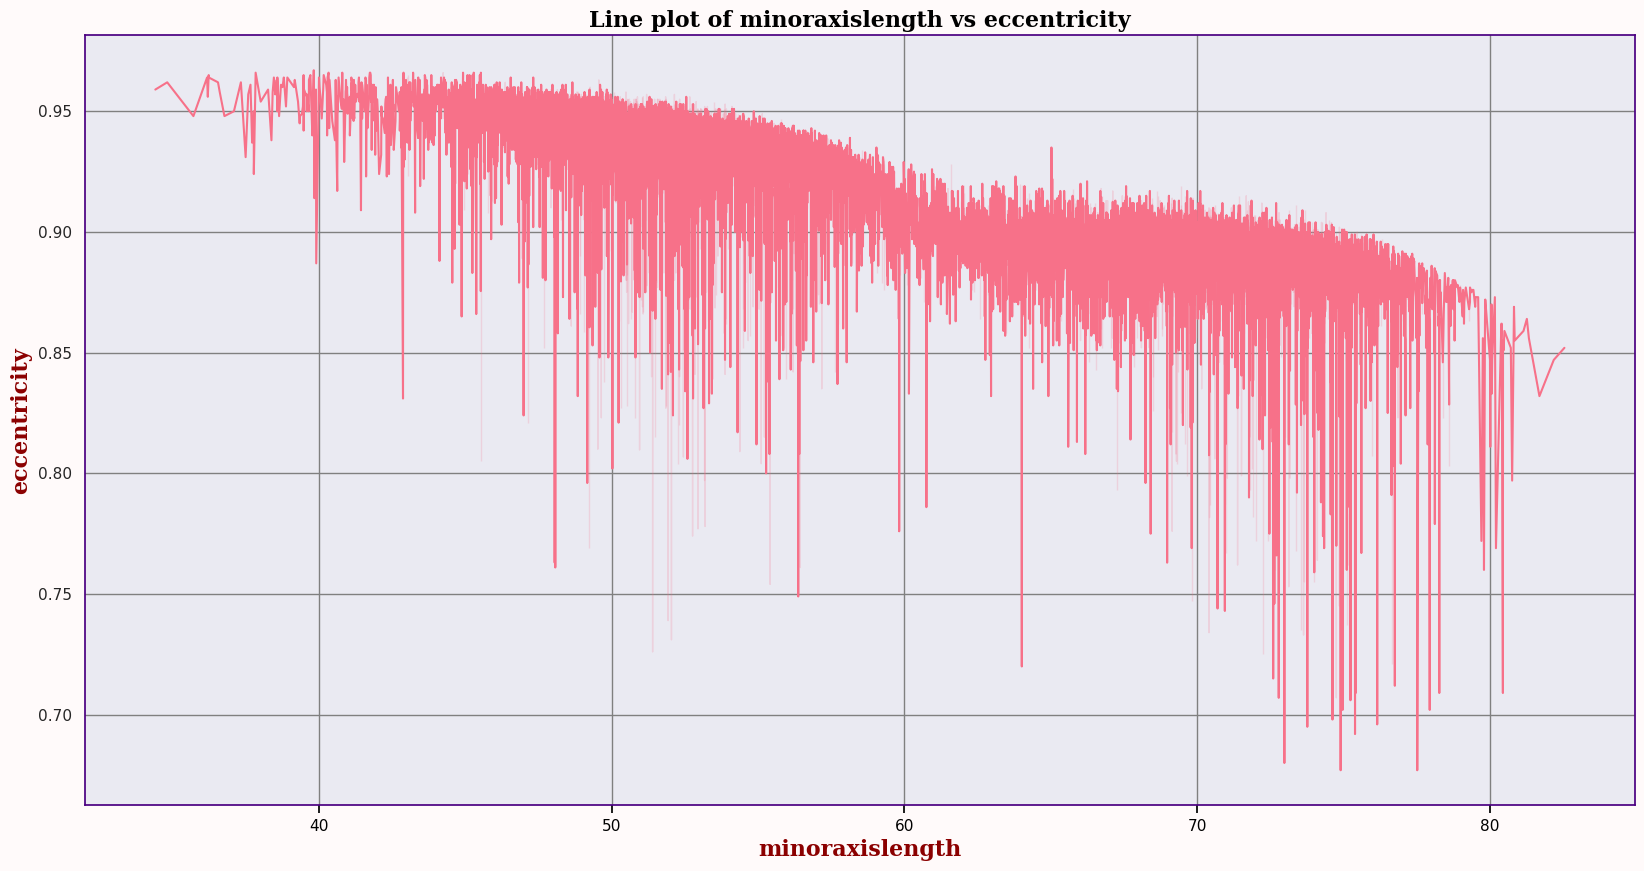

In [175]:
plotting_lines(eda,'minoraxislength','eccentricity')

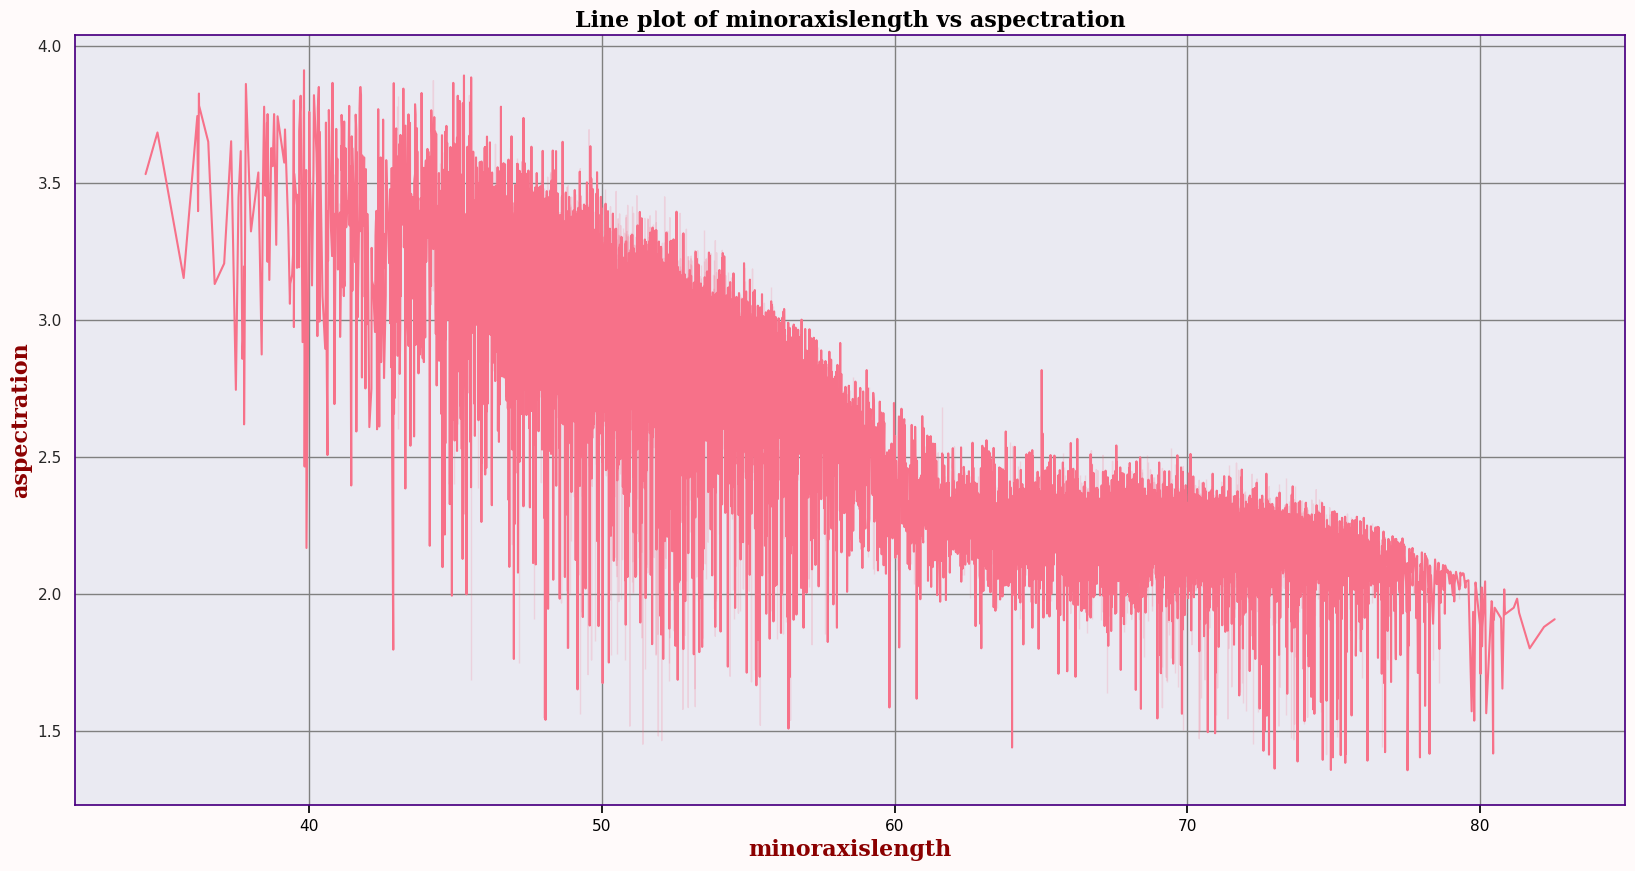

In [176]:
plotting_lines(eda,'minoraxislength','aspectration')

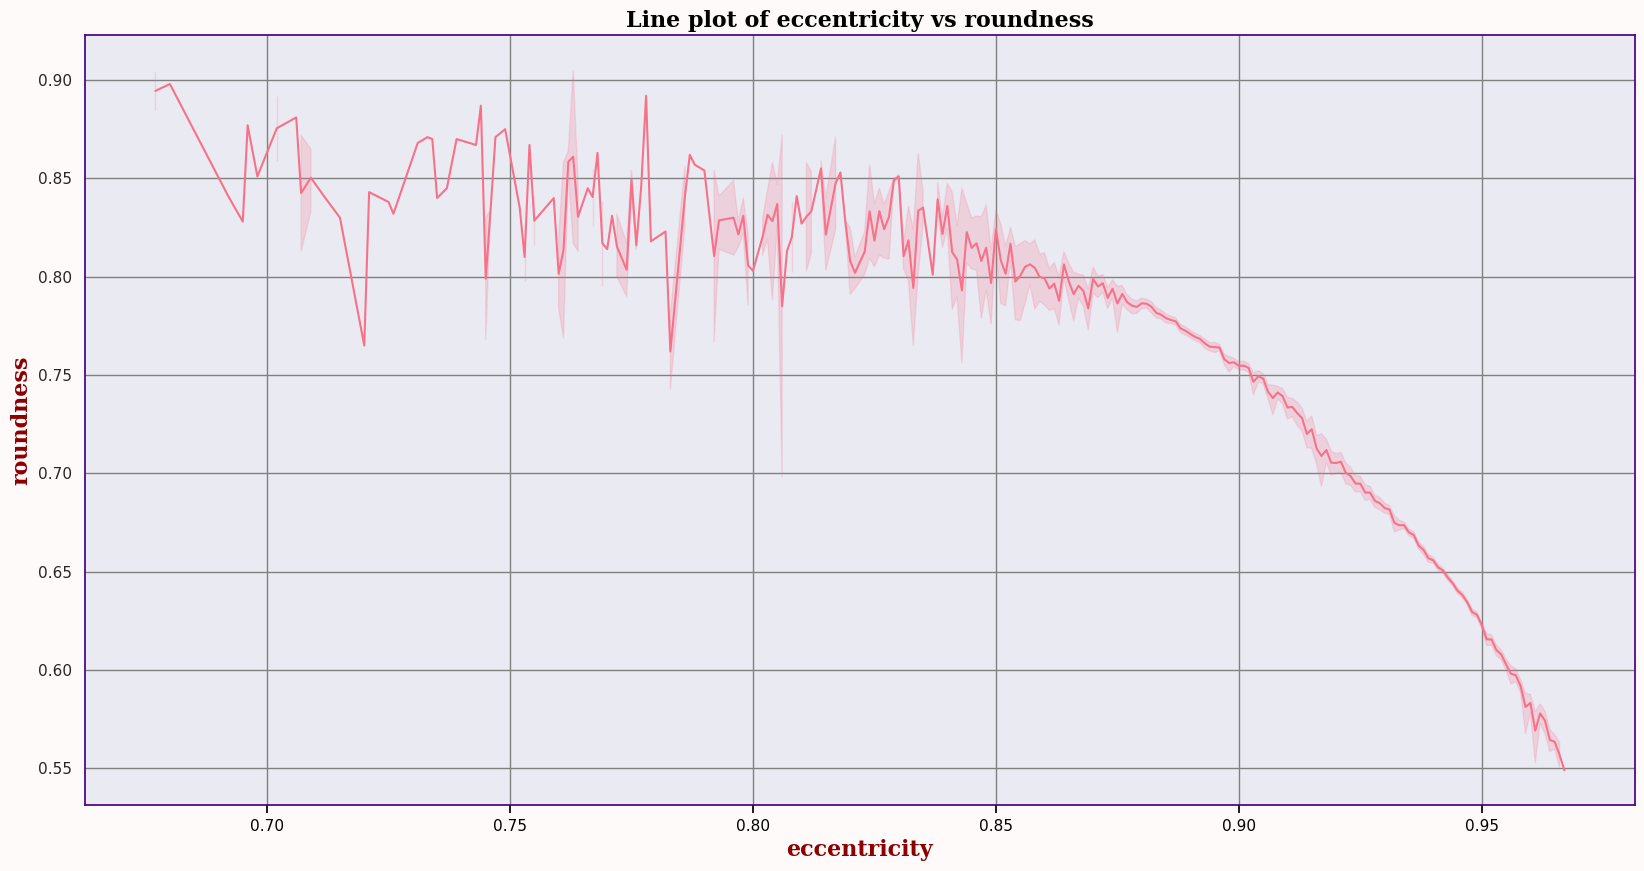

In [177]:
plotting_lines(eda,'eccentricity','roundness')

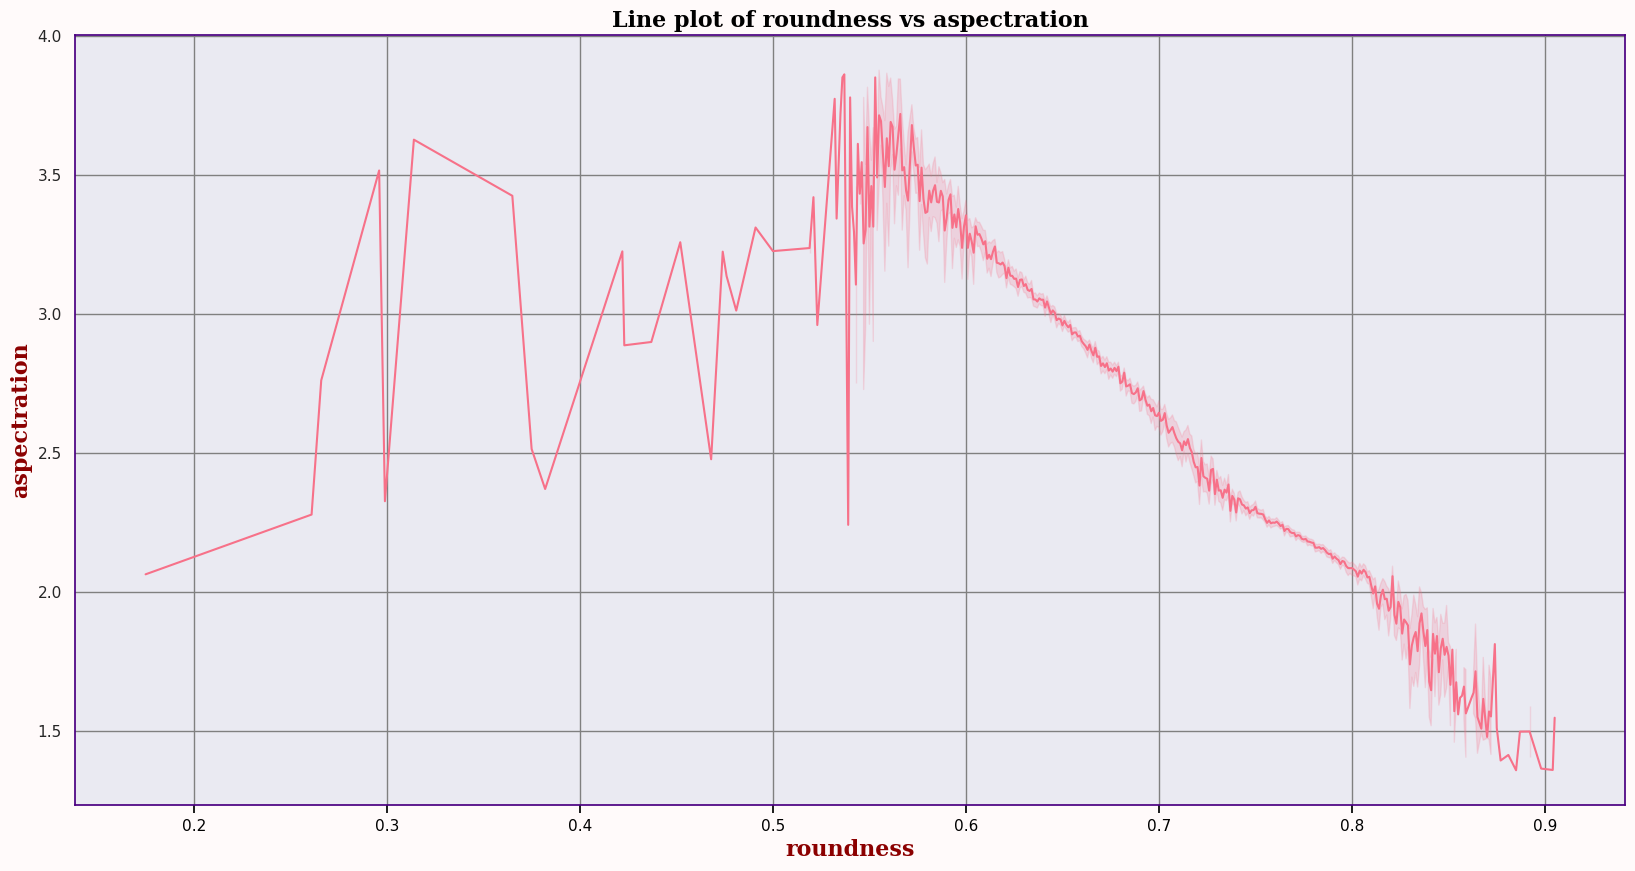

In [178]:
plotting_lines(eda,'roundness','aspectration')

**Scatter Plot**

In [179]:
def plotting_scatter(data,x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='bright',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.scatterplot(data=eda,x=x,y=y) #,hue='gender')
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

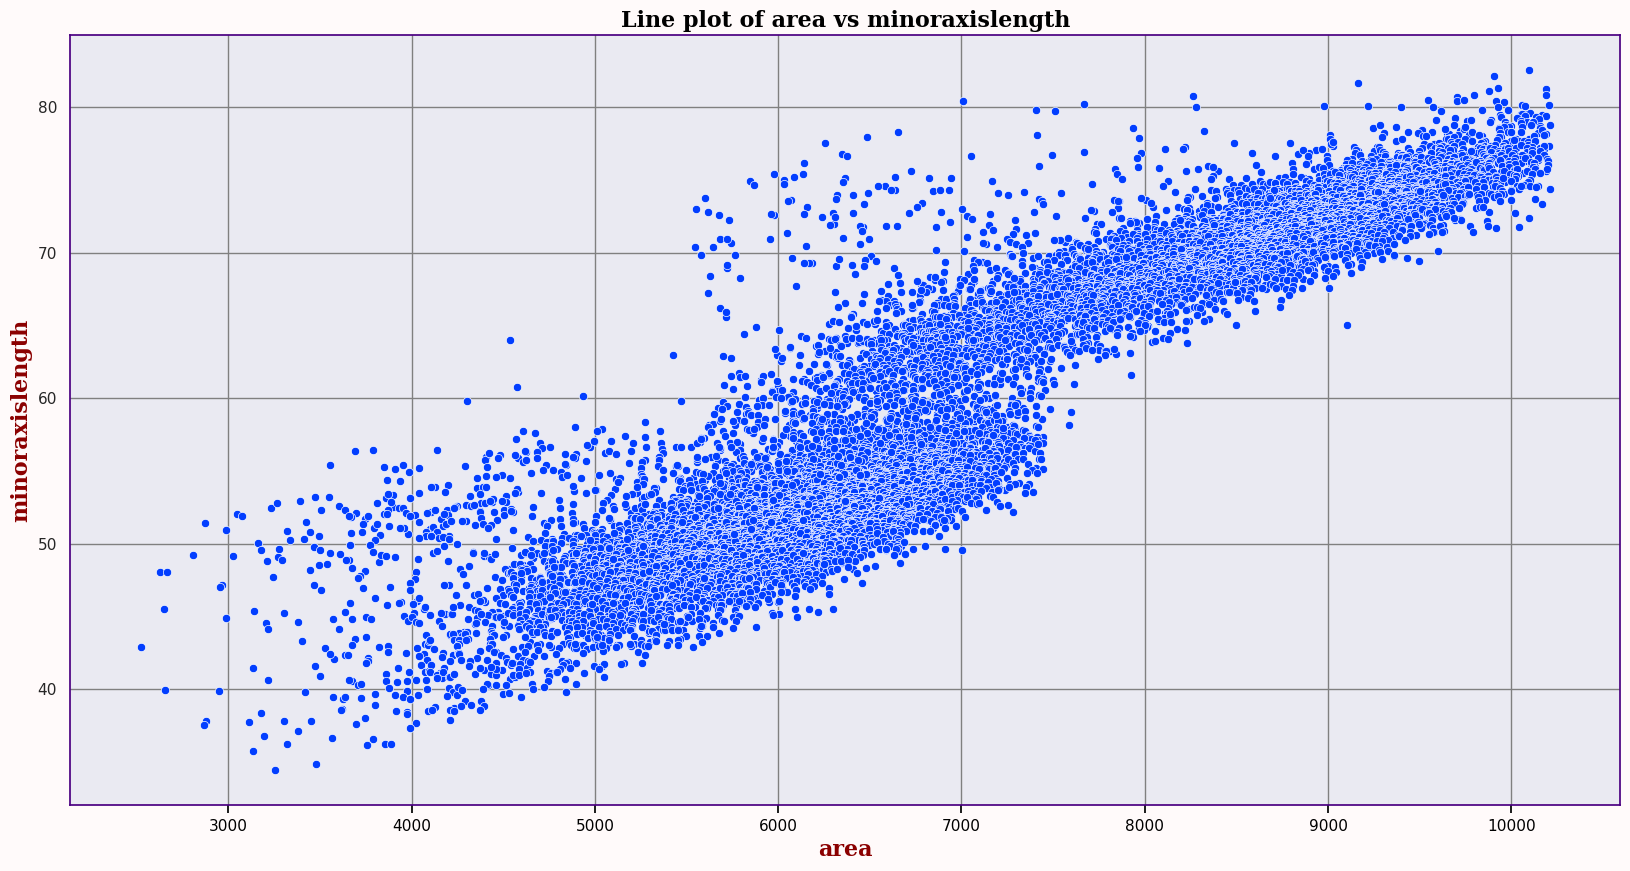

In [180]:
plotting_scatter(eda,'area','minoraxislength')


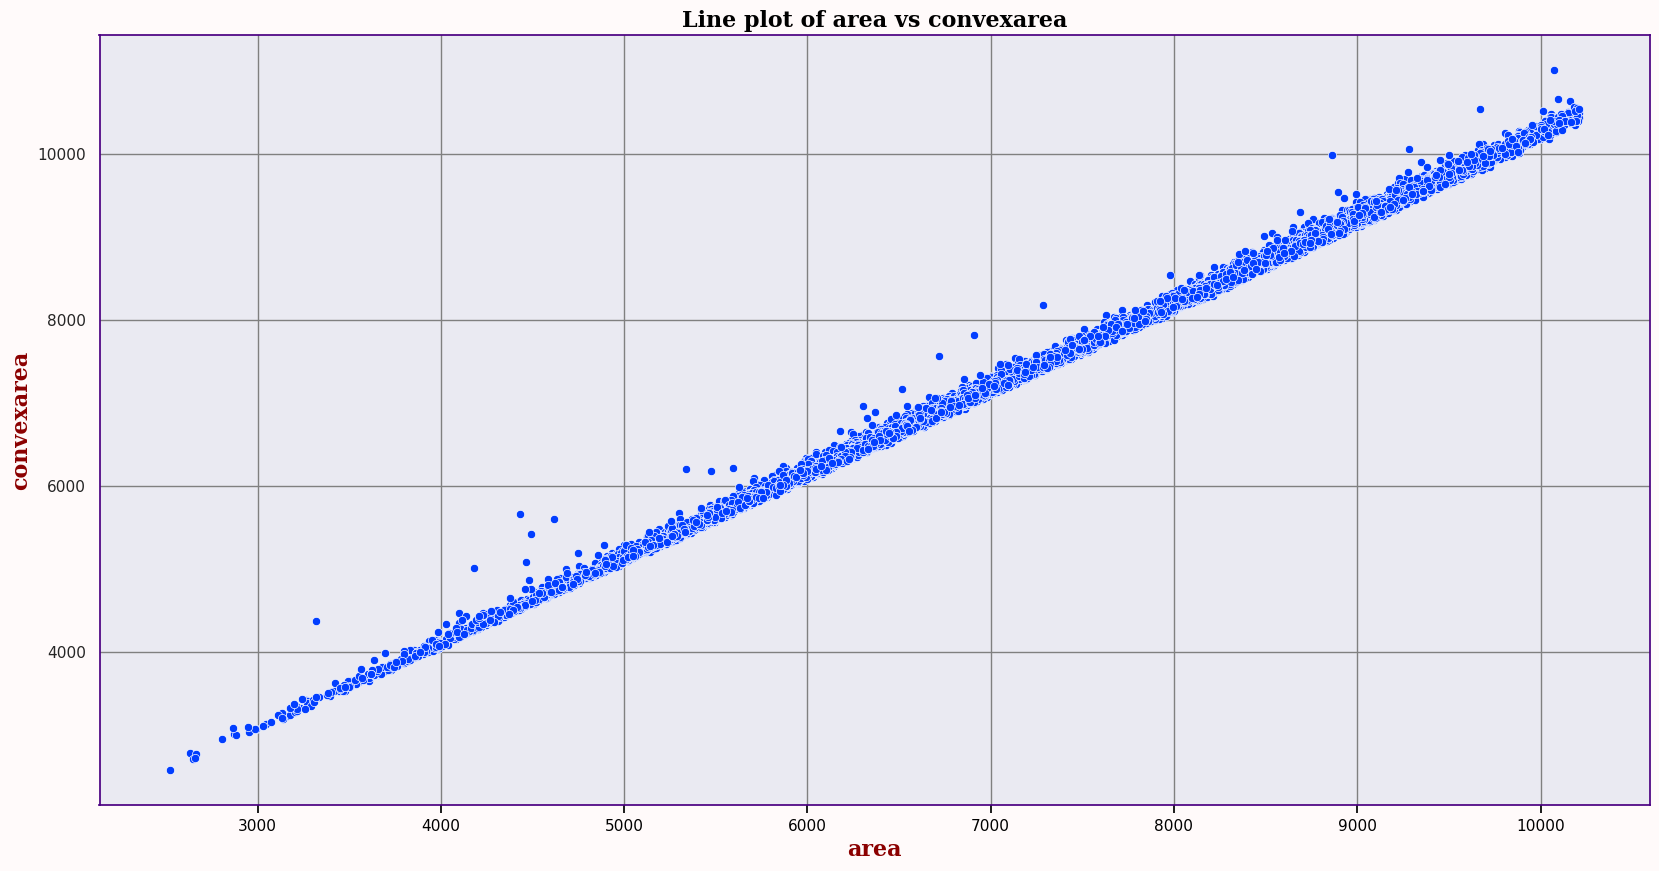

In [181]:
plotting_scatter(eda,'area','convexarea')

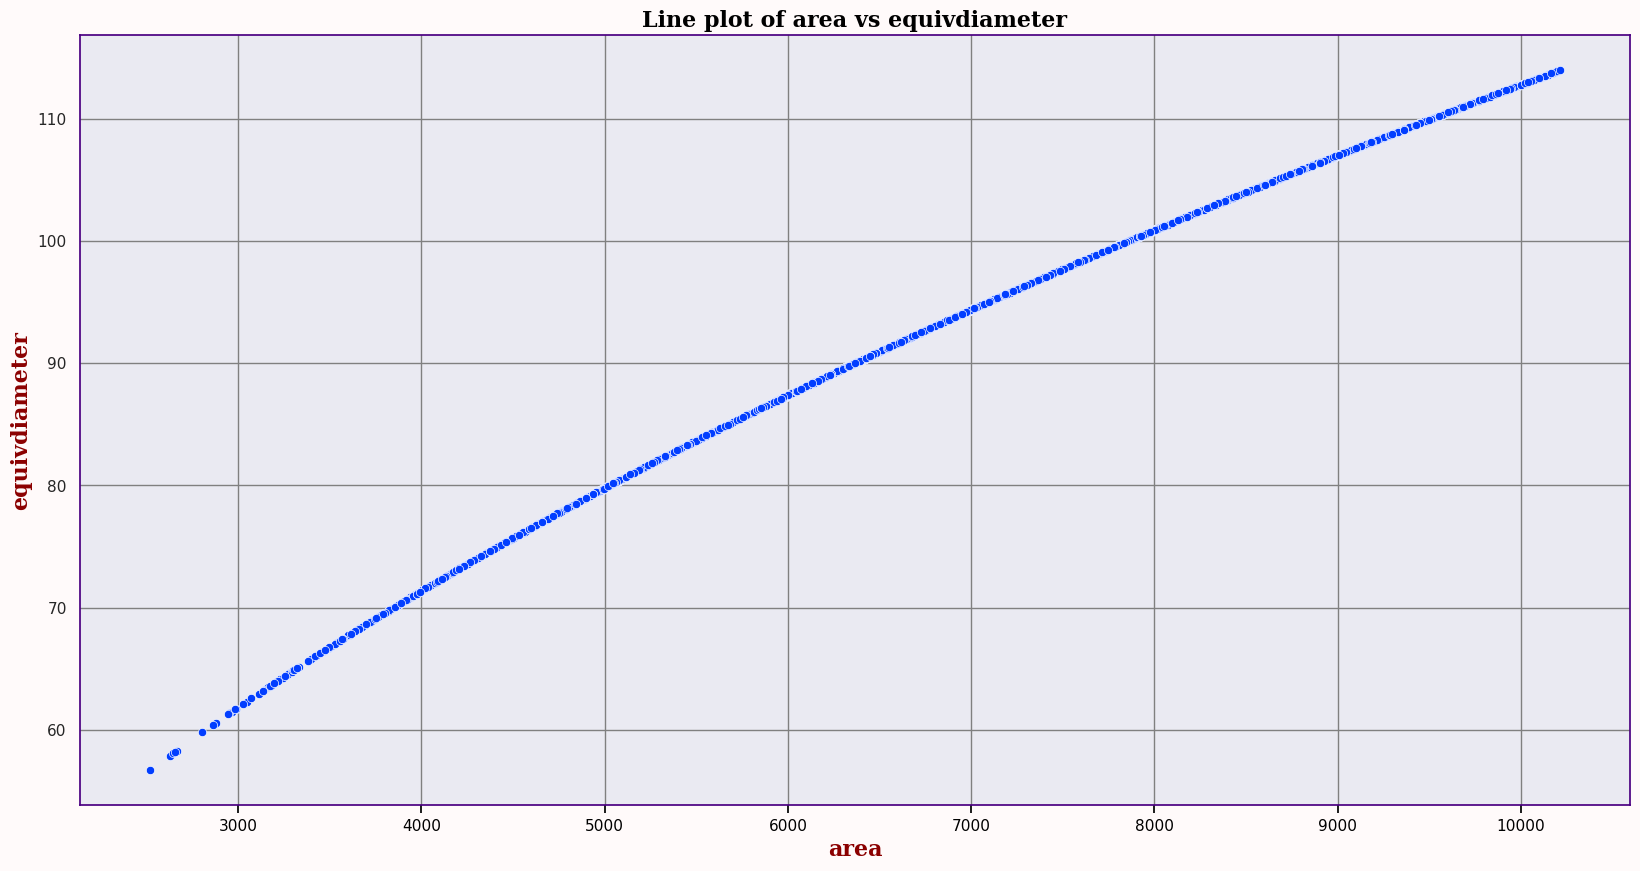

In [182]:
plotting_scatter(eda,'area','equivdiameter')

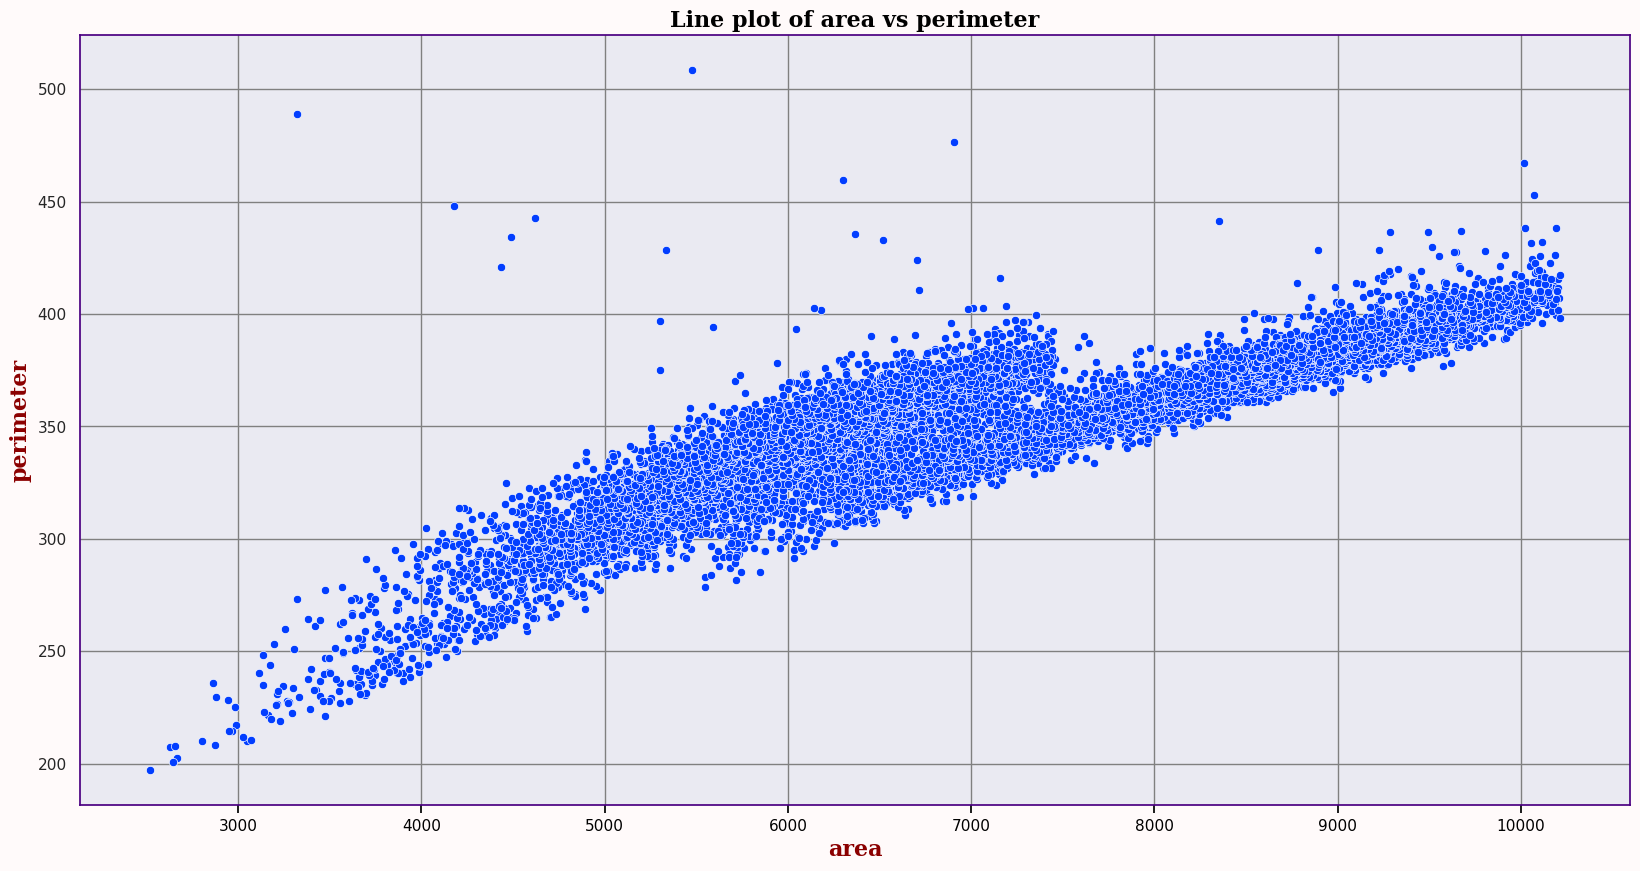

In [183]:
plotting_scatter(eda,'area','perimeter')

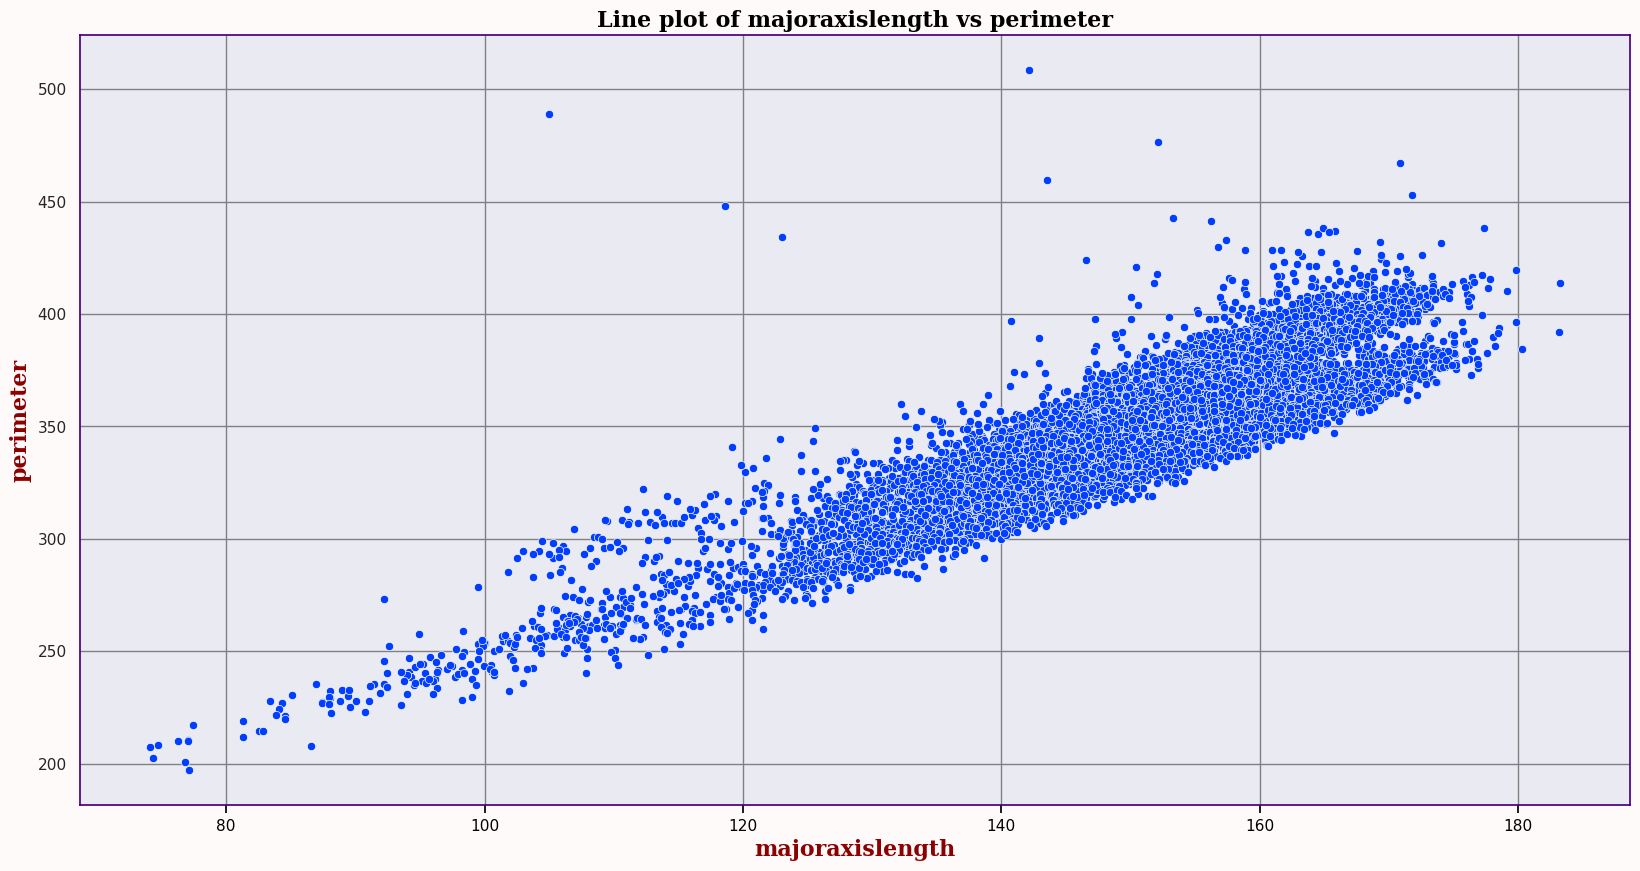

In [184]:
plotting_scatter(eda,'majoraxislength','perimeter')

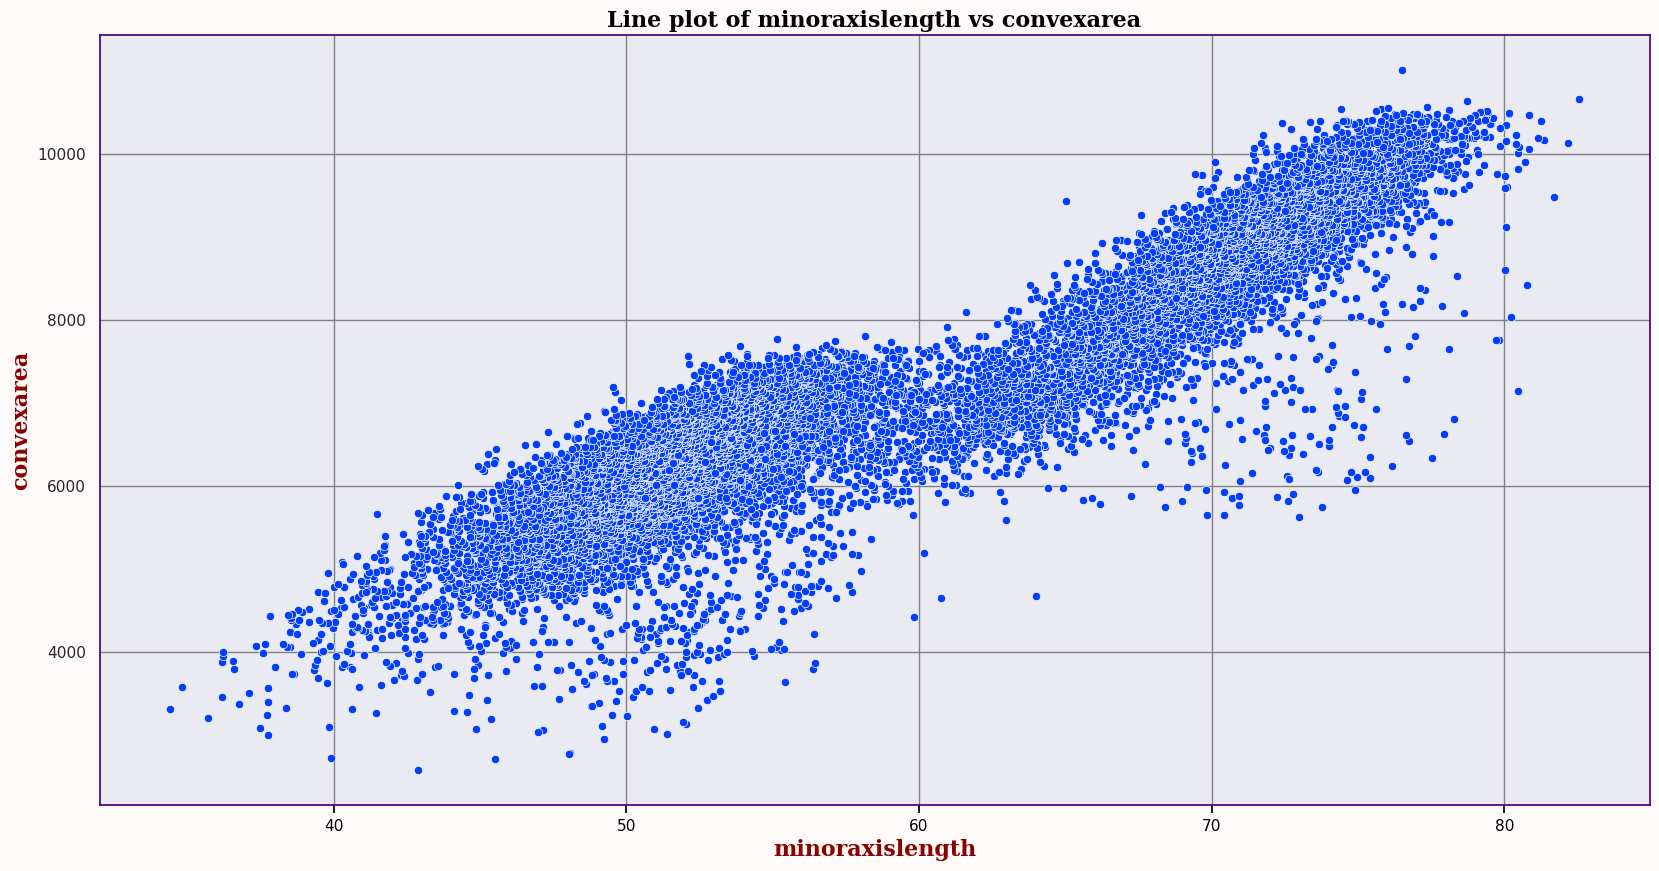

In [185]:
plotting_scatter(eda,'minoraxislength','convexarea')

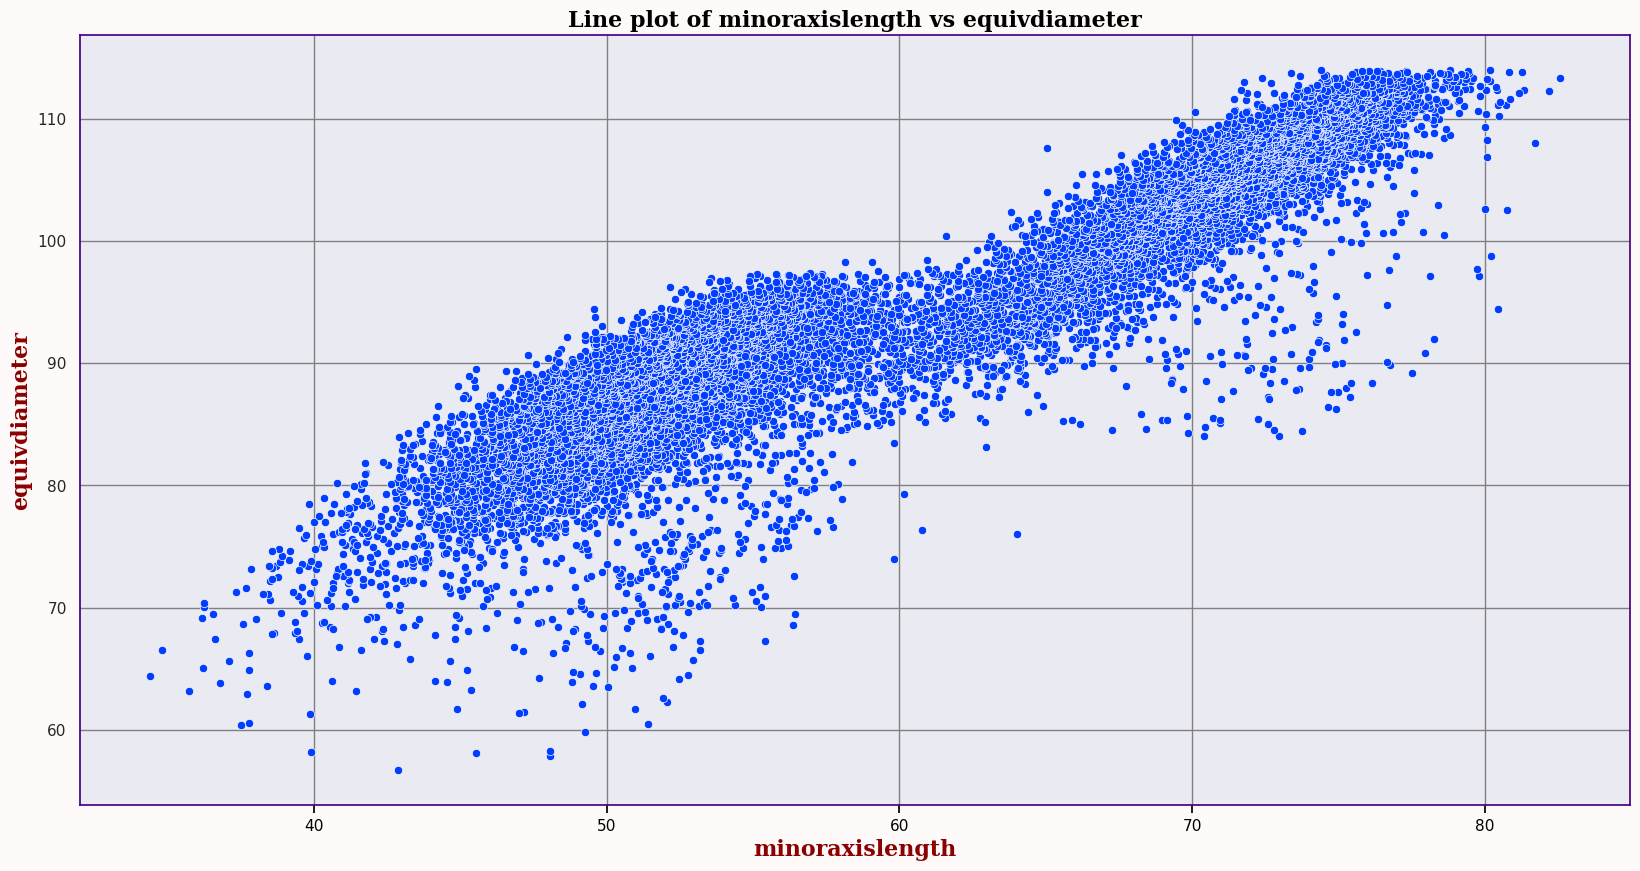

In [186]:
plotting_scatter(eda,'minoraxislength','equivdiameter')

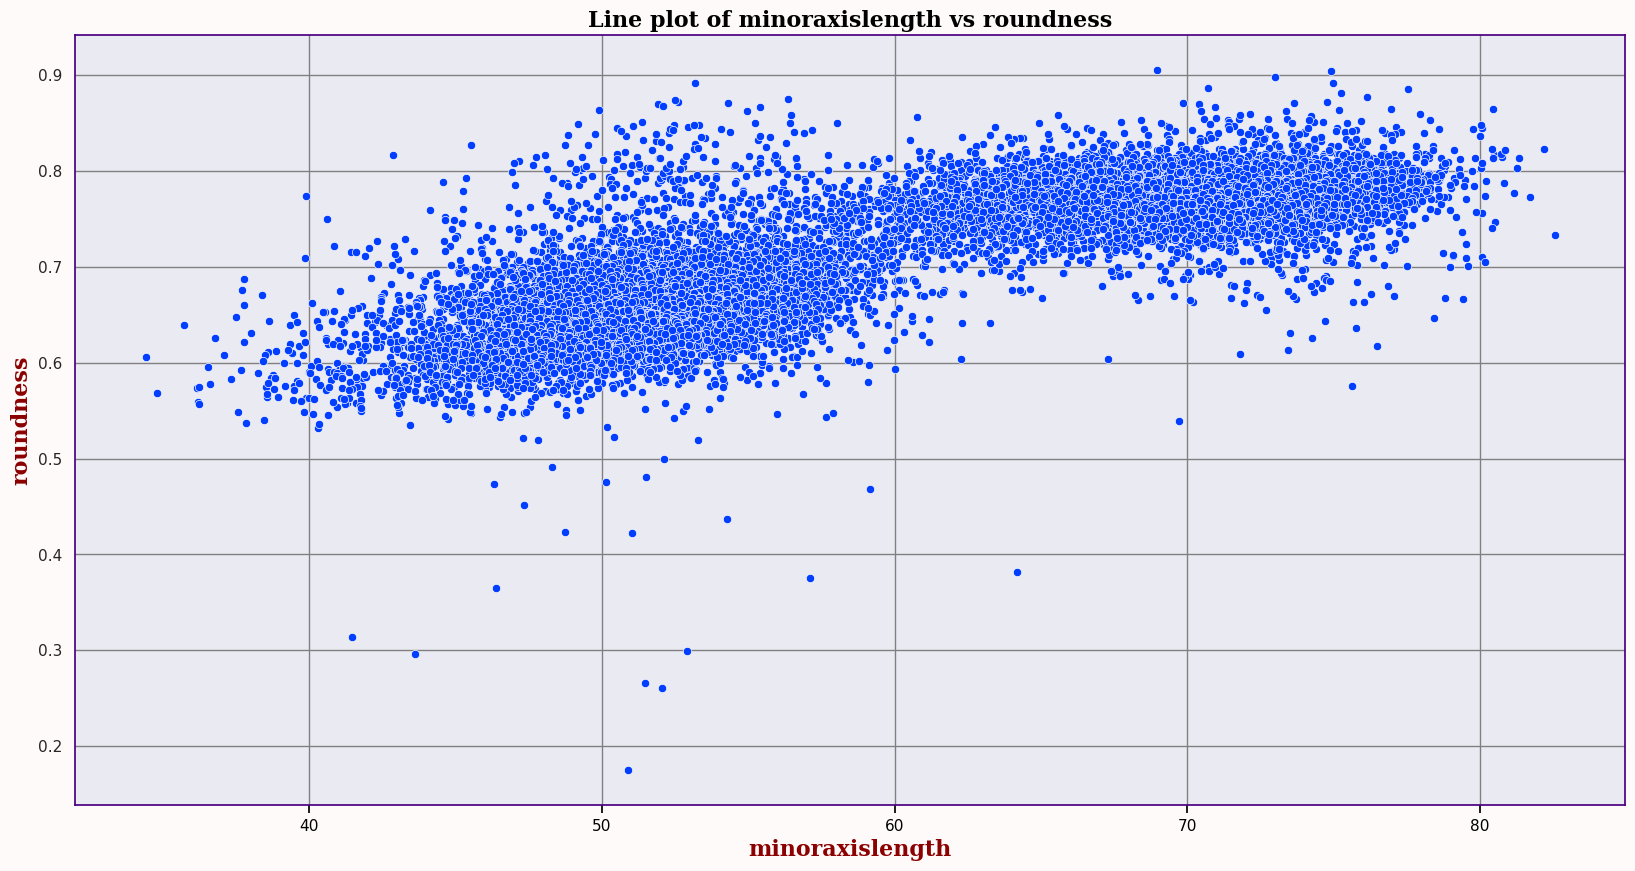

In [187]:
plotting_scatter(eda,'minoraxislength','roundness')

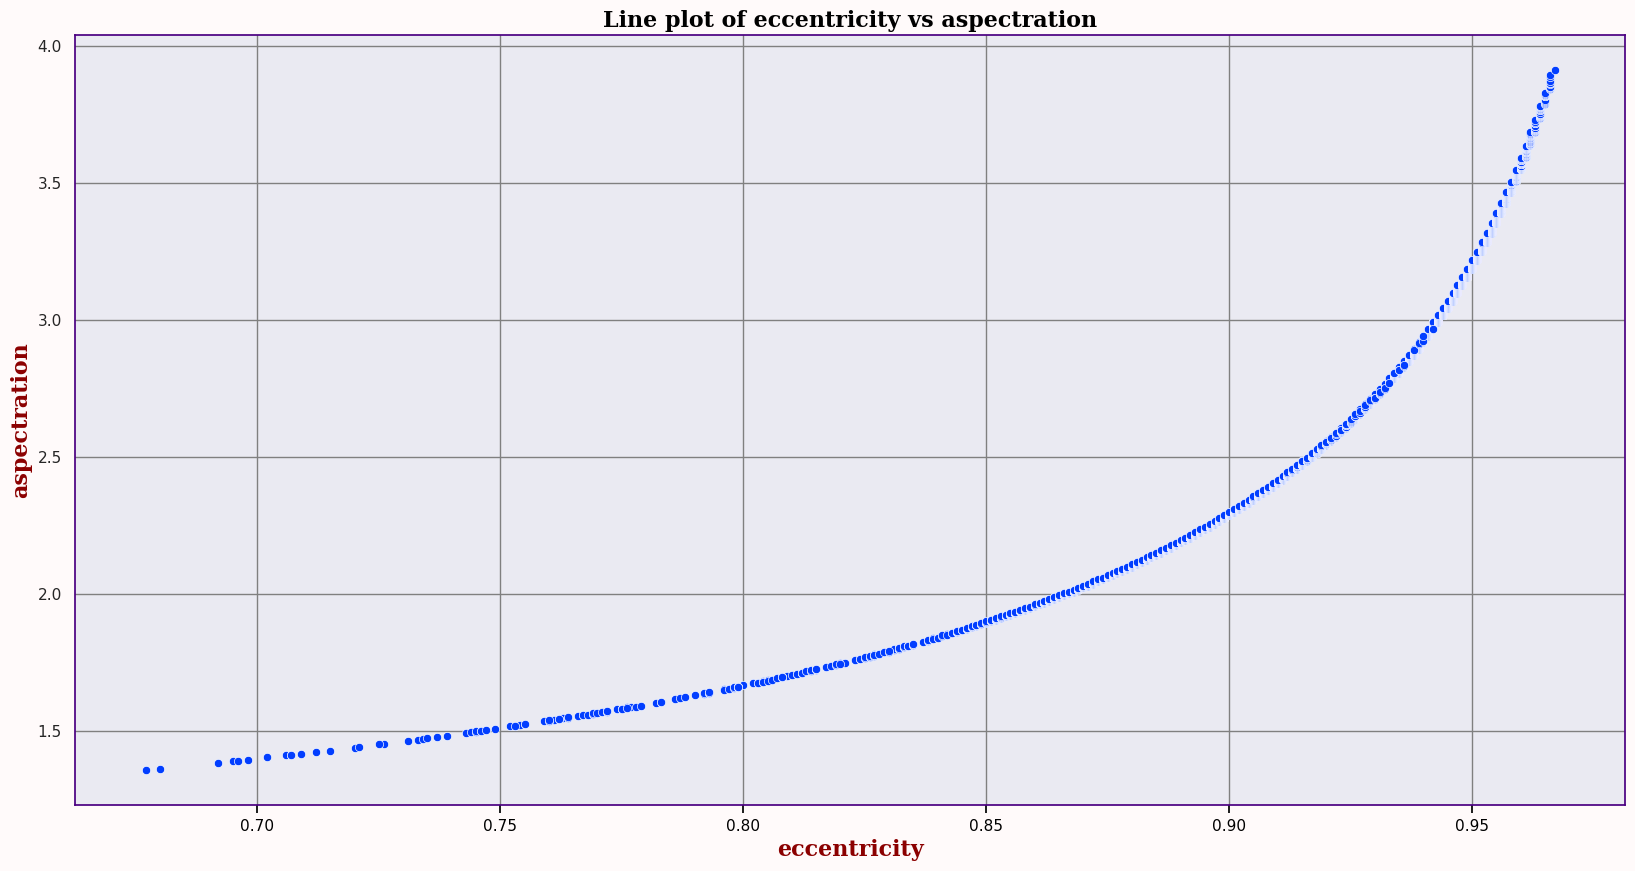

In [188]:
plotting_scatter(eda,'eccentricity','aspectration')

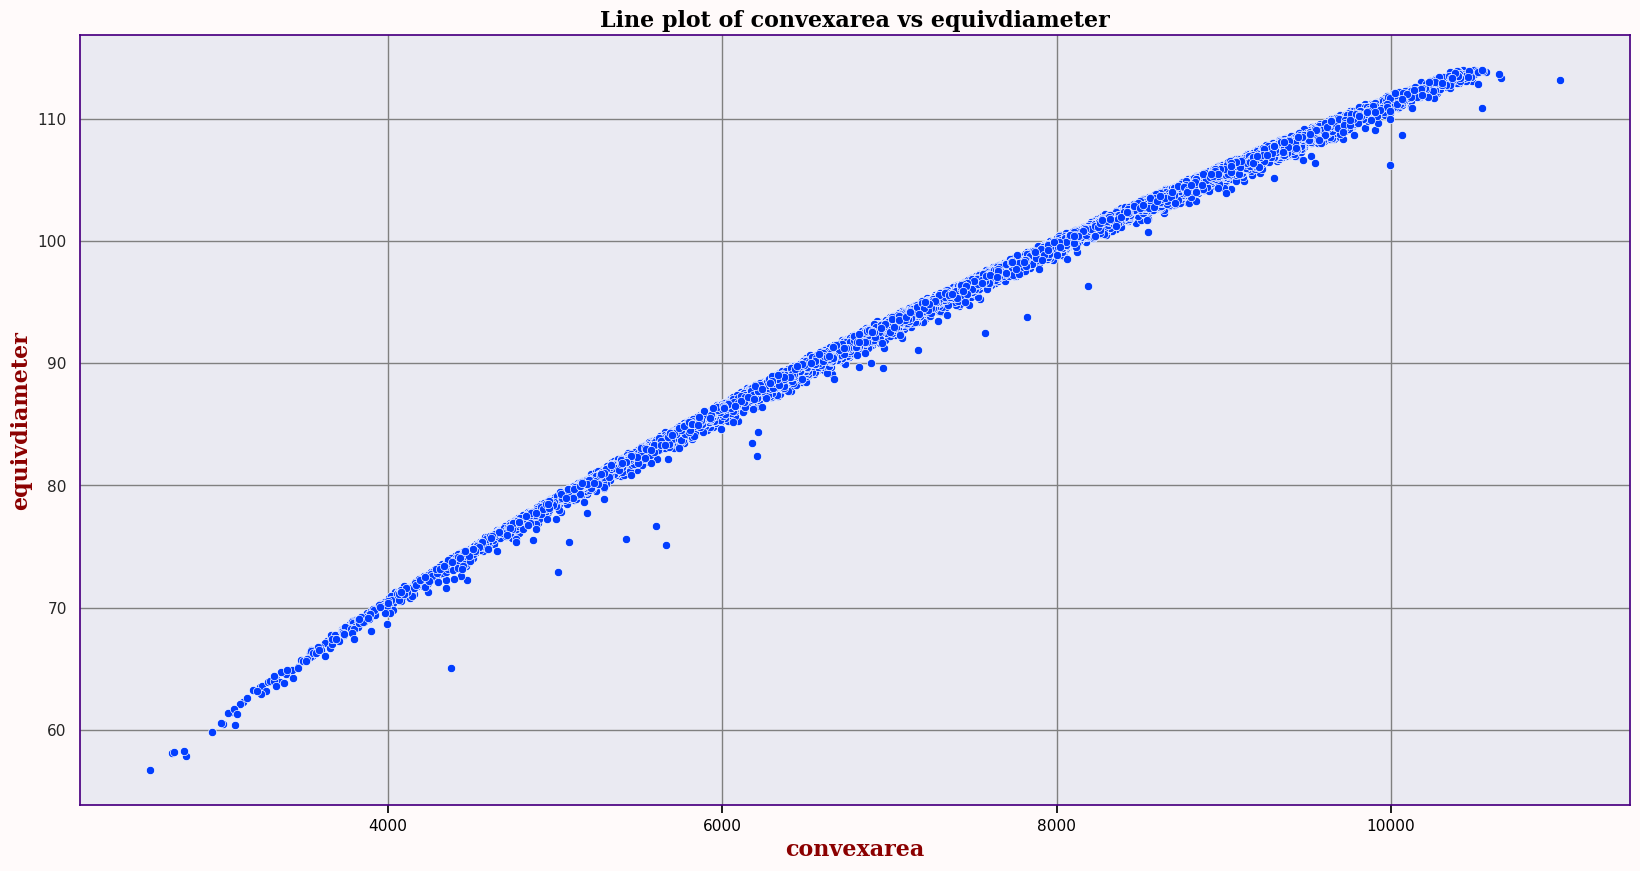

In [189]:
plotting_scatter(eda,'convexarea','equivdiameter')

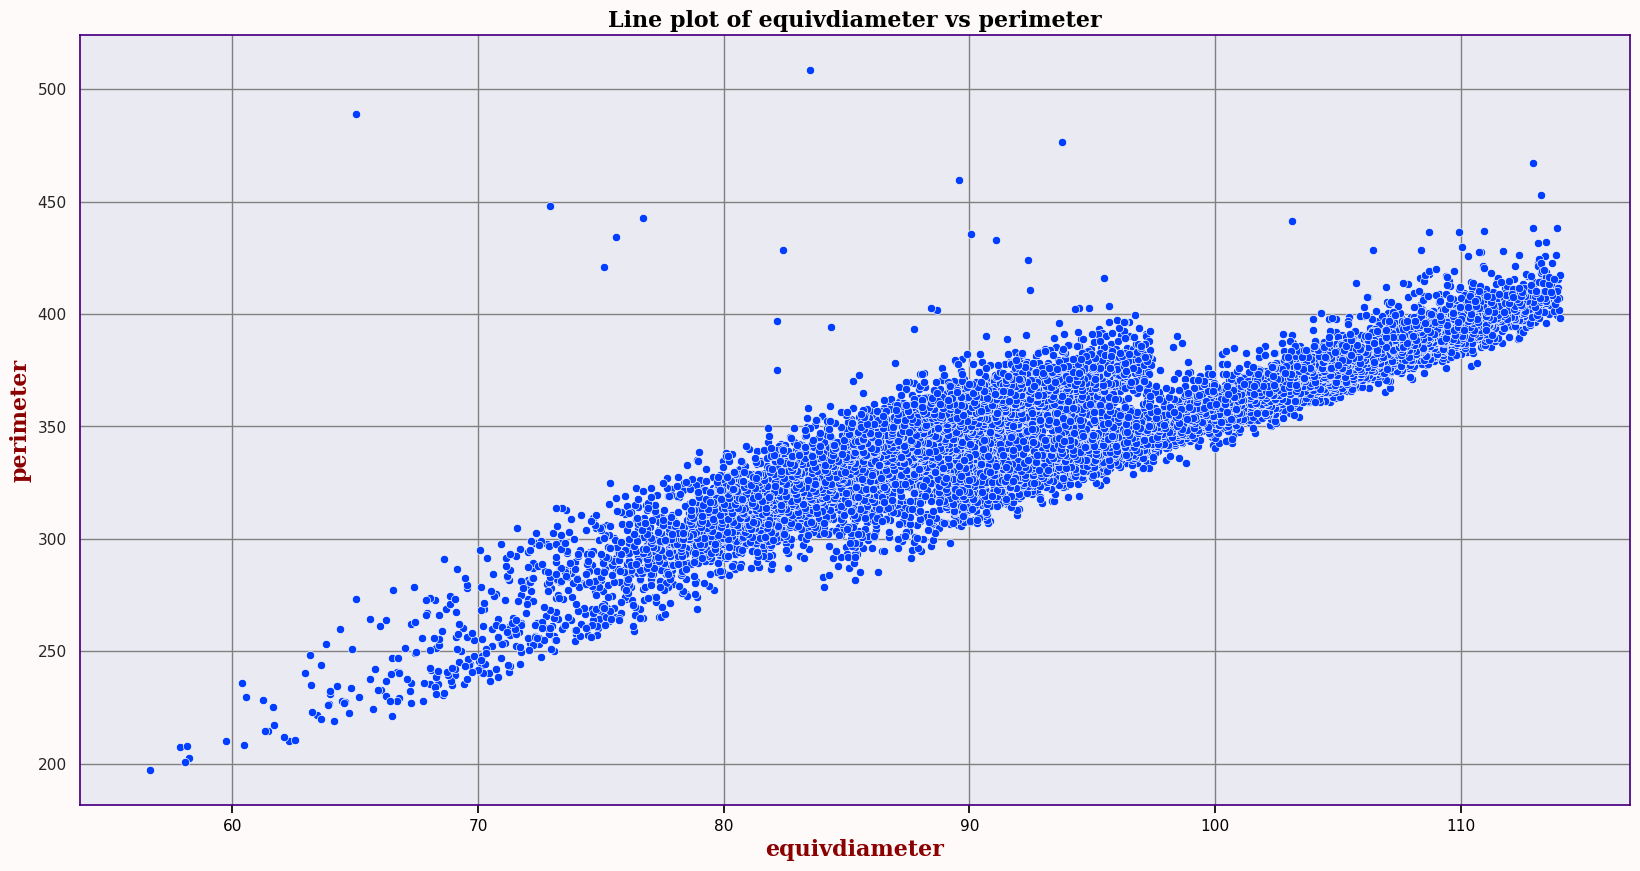

In [190]:
plotting_scatter(eda,'equivdiameter','perimeter')

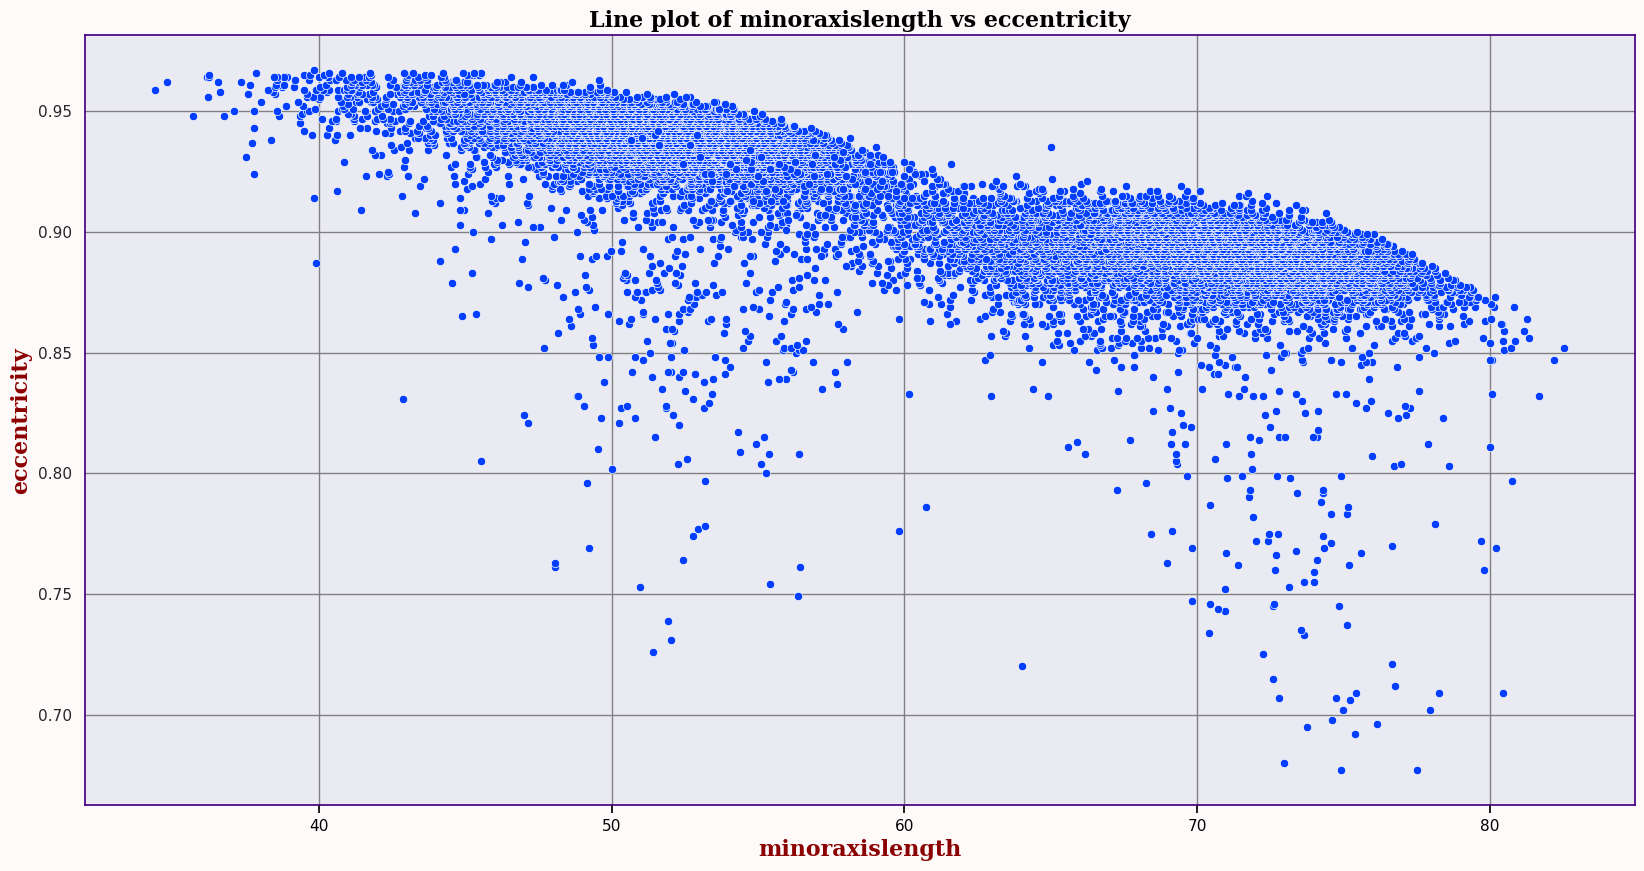

In [191]:
plotting_scatter(eda,'minoraxislength','eccentricity')

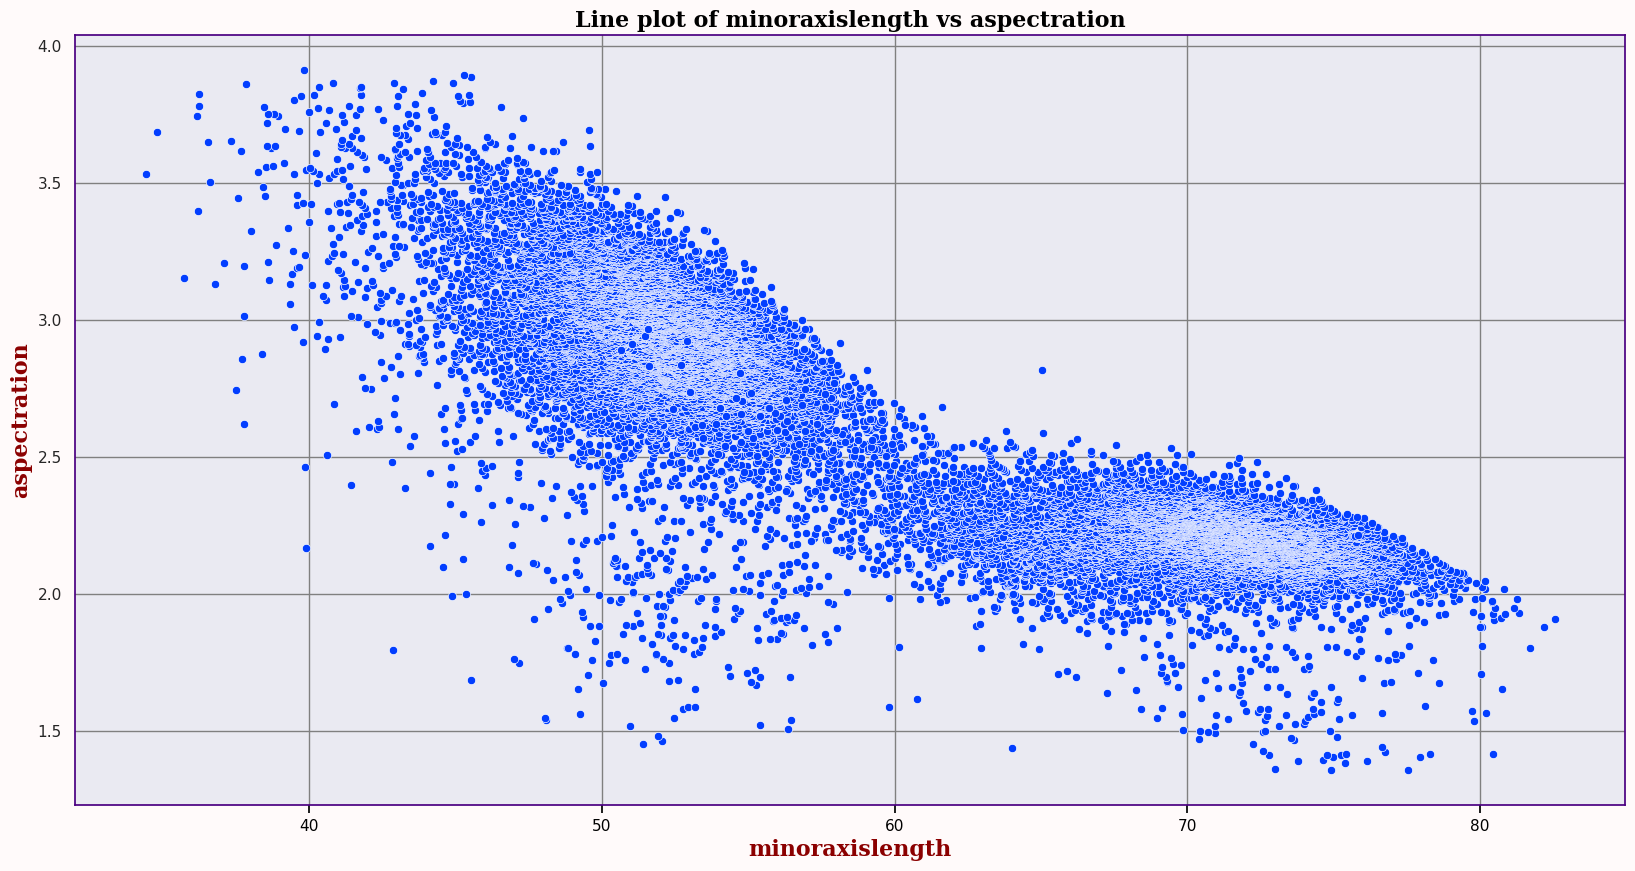

In [192]:
plotting_scatter(eda,'minoraxislength','aspectration')

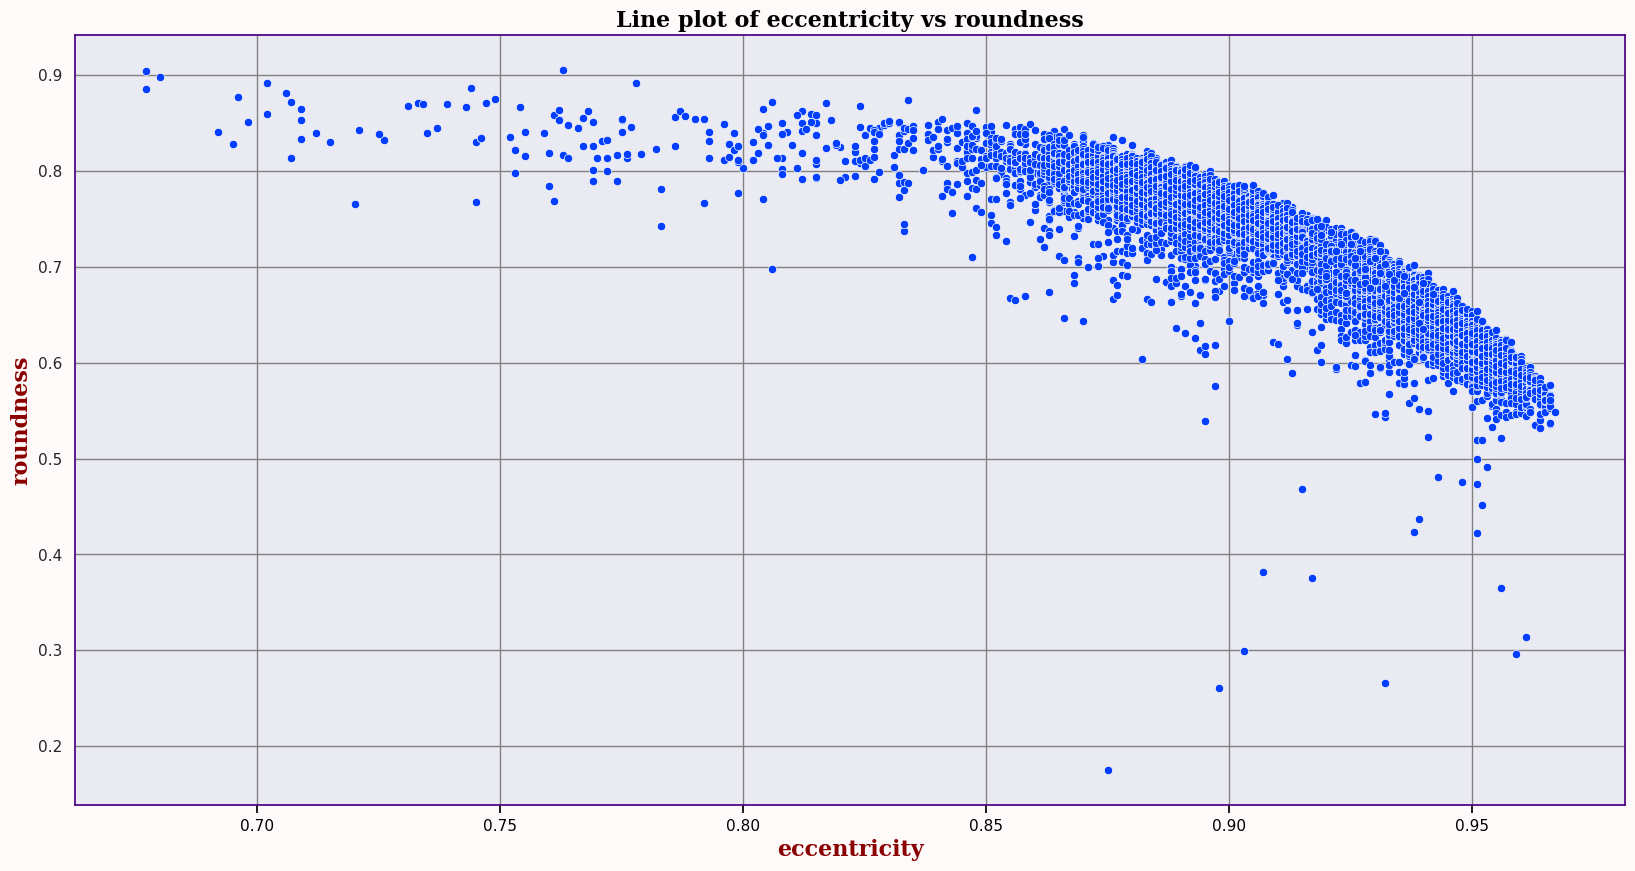

In [193]:
plotting_scatter(eda,'eccentricity','roundness')

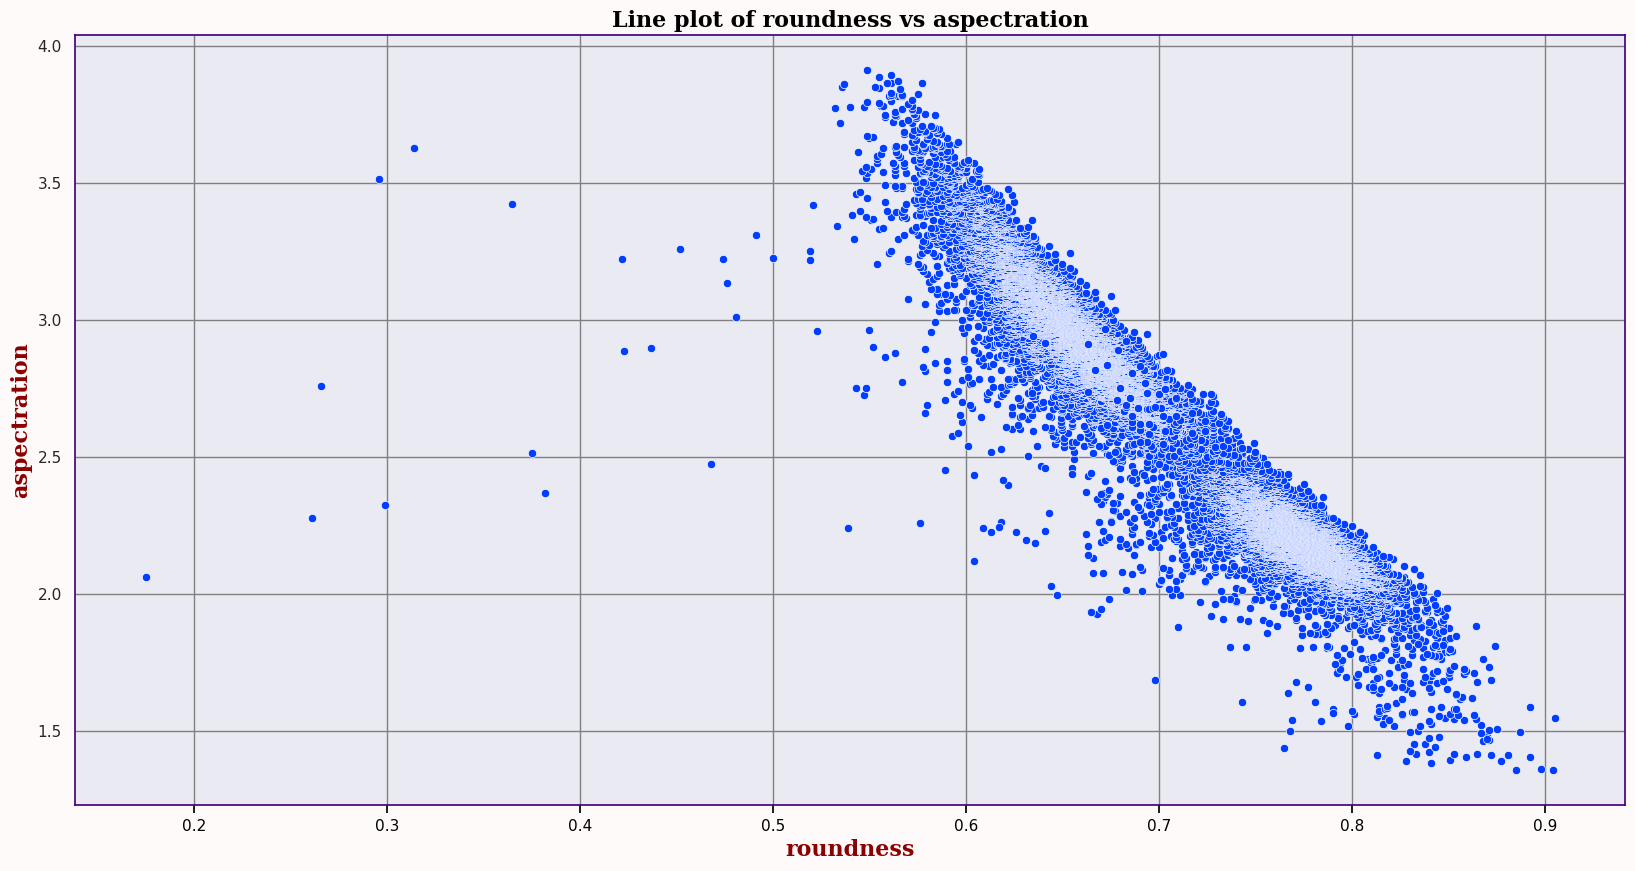

In [194]:
plotting_scatter(eda,'roundness','aspectration')

**Observations**

Based off the heat map, line and scatter plots, the following can be seen;
- For +ve correlated features, an increase in one feature leads to an increase to the other.
- For -ve correlated features, an increase in one feature leads to an decrease to the other.

Let's see a scatter plot of extent with any of the features, remember that this feature has no correlation with any of the other features.

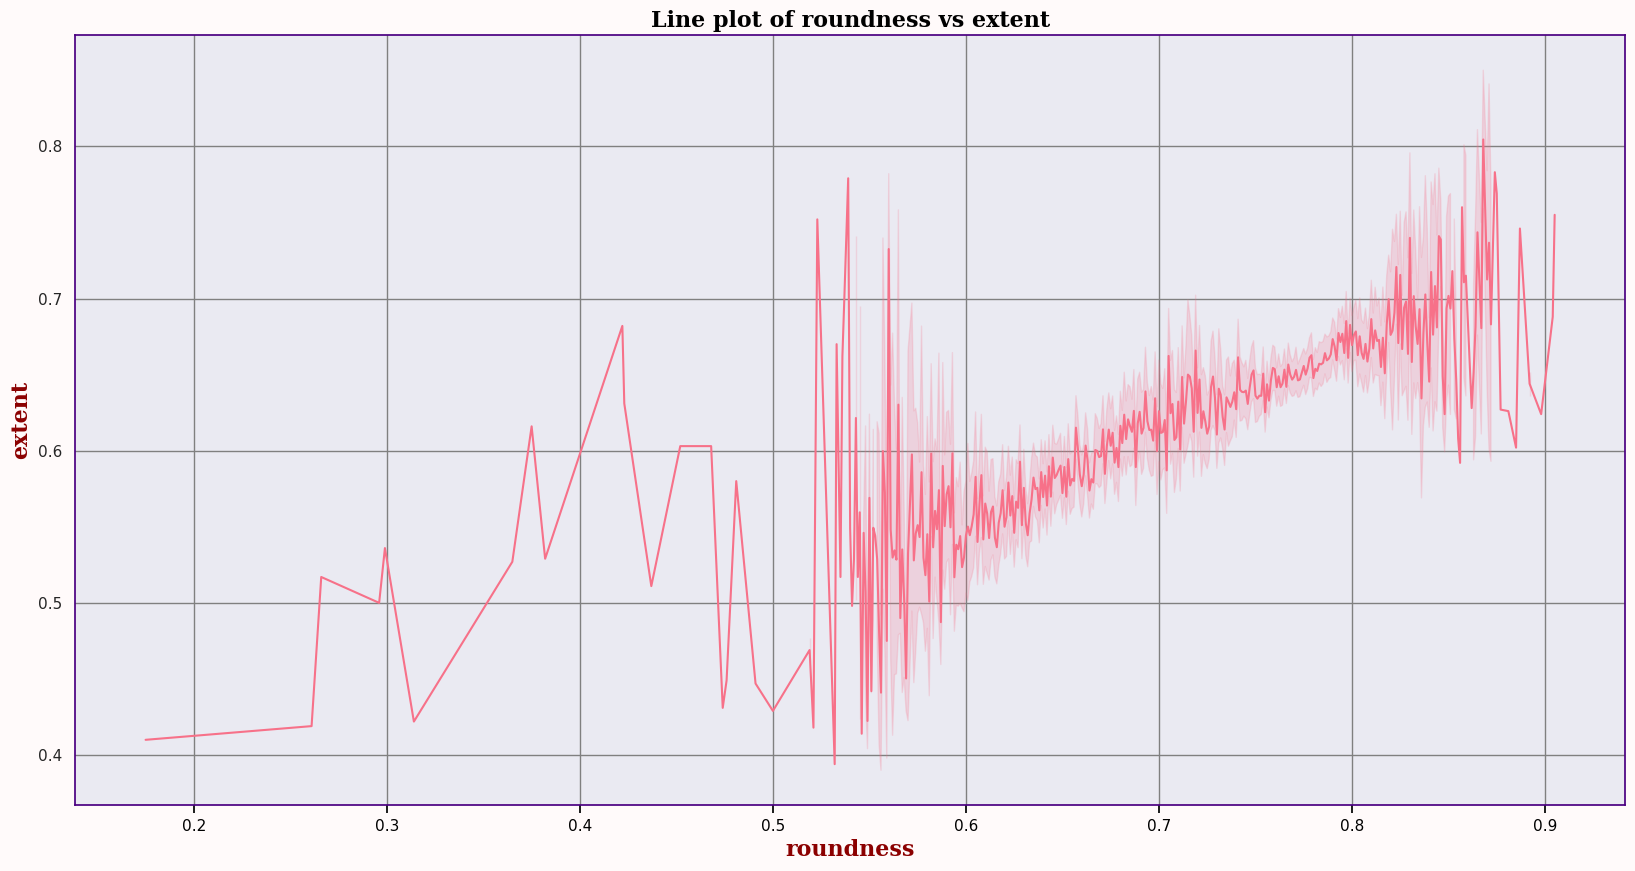

In [198]:
plotting_lines(eda,'roundness','extent')

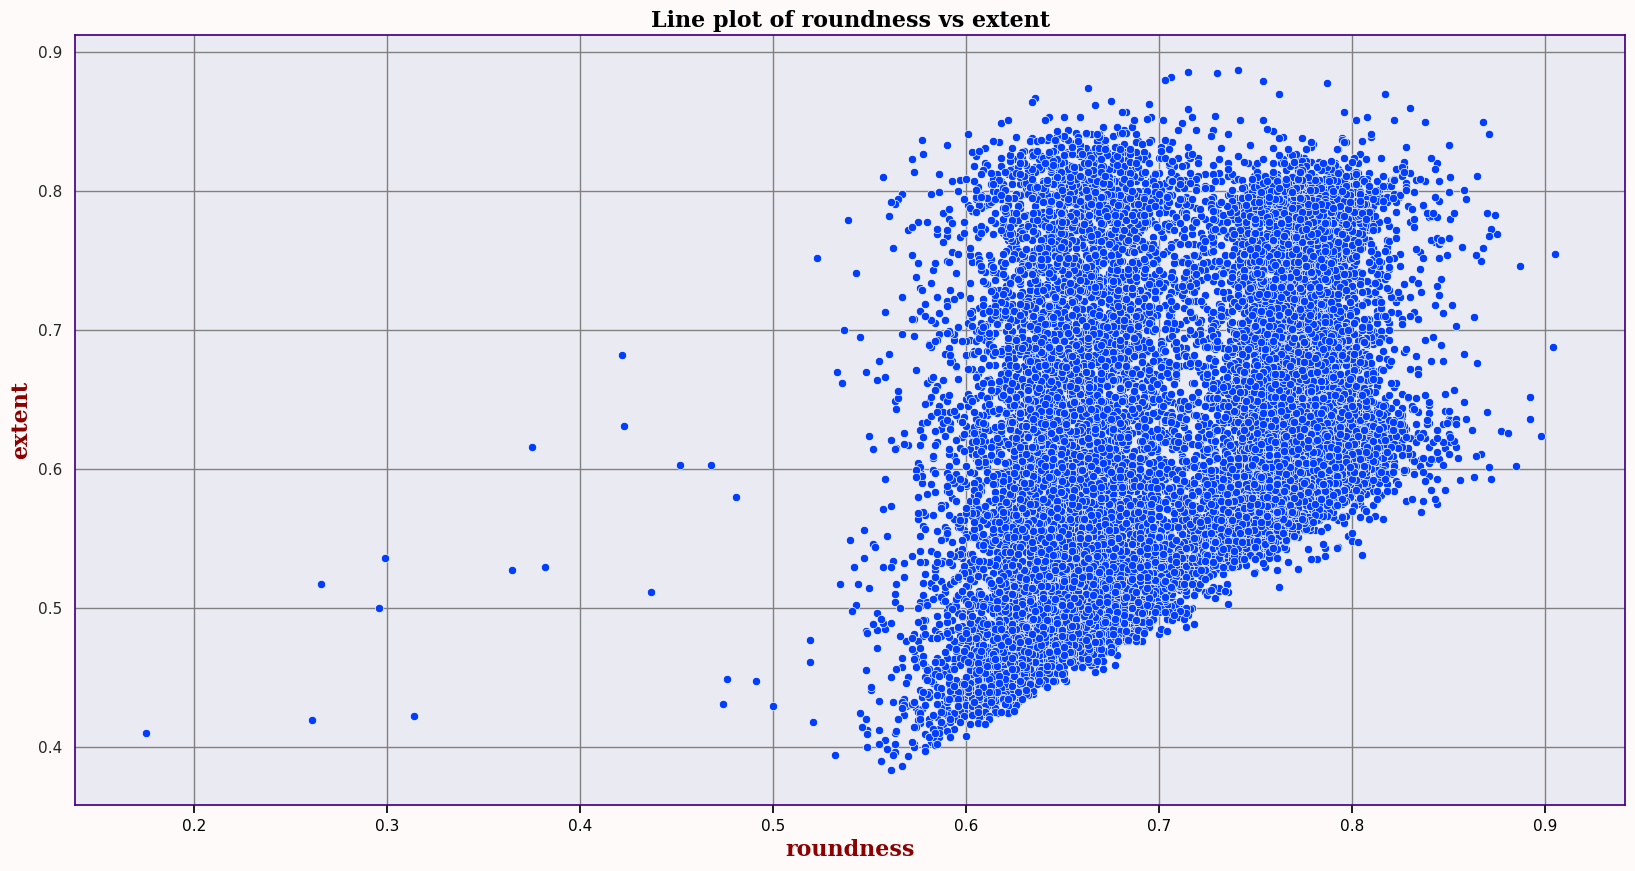

In [197]:
plotting_scatter(eda,'roundness','extent')

As seen from the heat map and confirmed from the scatter plot there is no meaningful correlation with extent.

### **End of Analysis**

In [ ]:
export = eda.copy()
export.to_csv('../my_data/eda.csv',index=False)